In [1]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
import seaborn as sns
import statistics as st

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [3]:
from imblearn.under_sampling import NearMiss
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [4]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

In [6]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import numpy

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
# read the data into a Pandas DataFrame
df = pd.read_csv('~/datasets/K9.data', sep=',', header=None, prefix= 'Feature', low_memory=False)

In [8]:
df.head(20)

Feature0 Feature1 Feature2 Feature3 Feature4 Feature5 Feature6 Feature7  \
0    -0.161   -0.014    0.002   -0.036   -0.033   -0.093    0.025    0.005   
1    -0.158   -0.002   -0.012   -0.025   -0.012   -0.106    0.013    0.005   
2         ?        ?        ?        ?        ?        ?        ?        ?   
3    -0.169   -0.025   -0.010   -0.041   -0.045   -0.069    0.038    0.014   
4    -0.183   -0.051   -0.023   -0.077   -0.092   -0.015    0.071    0.027   
5    -0.154    0.005   -0.011   -0.013   -0.002   -0.115    0.005    0.002   
6    -0.150    0.016   -0.014    0.000    0.016   -0.123   -0.004   -0.002   
7    -0.158    0.002   -0.019   -0.028   -0.008   -0.101    0.011    0.005   
8    -0.152    0.009   -0.015   -0.008    0.004   -0.120   -0.002   -0.002   
9    -0.172   -0.028    0.003   -0.045   -0.055   -0.078    0.039    0.011   
10   -0.164   -0.019   -0.011   -0.037   -0.031   -0.081    0.029    0.012   
11   -0.148    0.018   -0.012    0.004    0.021   -0.128   -0.007   -0.003   
12   -0.153    0.012   -0.017   -0.009    0.006   -0.116    0.000    0.001   
13   -0.161   -0.014    0.001   -0.033   -0.027   -0.093    0.023    0.007   
14   -0.153    0.010   -0.017   -0.012    0.004   -0.112    0.004    0.002   
15   -0.153    0.006   -0.011   -0.010   -0.000   -0.119    0.003   -0.000   
16        ?        ?        ?        ?        ?        ?        ?        ?   
17   -3.272   -0.168    0.113    0.064    0.057   -0.050    0.084    0.097   
18   -0.141    0.035   -0.015    0.023    0.059   -0.143   -0.018   -0.006   
19   -0.166   -0.019    0.000   -0.041   -0.038   -0.093    0.029    0.008   

   Feature8 Feature9  ... Feature5400 Feature5401 Feature5402 Feature5403  \
0     0.000   -0.015  ...       0.013       0.021        0.02       0.016   
1     0.000   -0.002  ...      -0.008       0.007       0.015      -0.008   
2         ?        ?  ...           ?           ?           ?           ?   
3     0.008   -0.014  ...        0.01       0.025       0.025       0.021   
4     0.020   -0.019  ...       0.012        0.05       0.038       0.051   
5    -0.003    0.002  ...       0.012       0.009       0.003      -0.001   
6    -0.005    0.010  ...      -0.033      -0.032       0.029      -0.052   
7     0.001    0.003  ...      -0.025      -0.003       0.017      -0.017   
8    -0.007    0.004  ...      -0.009      -0.007       0.009      -0.027   
9     0.006   -0.020  ...       0.031      -0.059        0.05        0.01   
10    0.007   -0.010  ...       0.006       0.019       0.022       0.011   
11   -0.006    0.010  ...      -0.013      -0.011       0.004      -0.035   
12   -0.004    0.008  ...      -0.014      -0.008       0.008      -0.028   
13    0.003   -0.013  ...       0.016       0.019       0.074      -0.032   
14   -0.002    0.007  ...      -0.027      -0.011       0.026      -0.025   
15   -0.005    0.004  ...      -0.008           0       0.011      -0.021   
16        ?        ?  ...      -0.014      -0.013       0.006      -0.035   
17    0.089   -0.078  ...      -0.019      -0.014       0.005      -0.037   
18   -0.010    0.018  ...      -0.023      -0.024      -0.002      -0.054   
19    0.003   -0.017  ...       0.022       0.016       0.023       0.016   

   Feature5404 Feature5405 Feature5406 Feature5407 Feature5408 Feature5409  
0       -0.011       0.003        0.01      -0.007    inactive         NaN  
1       -0.011      -0.004       0.013       0.005    inactive         NaN  
2            ?           ?           ?           ?    inactive         NaN  
3       -0.012       0.006       0.016      -0.018    inactive         NaN  
4       -0.015       0.017       0.027      -0.049    inactive         NaN  
5        0.002      -0.006       0.009       0.013    inactive         NaN  
6       -0.029      -0.006       0.004       0.023    inactive         NaN  
7       -0.009      -0.001       0.017       0.012    inactive         NaN  
8       -0.012      -0.009       0.008       0.021   

In [9]:
# see the dimensions
print(df.shape)

(31420, 5410)


1    31269
0      151
Name: Feature5408, dtype: int64


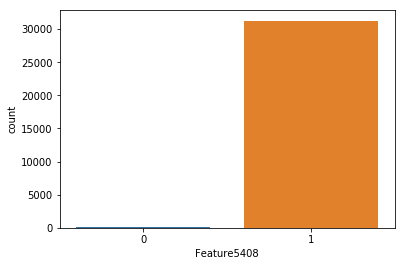

In [13]:
# see the class proportion
print(df['Feature5408'].value_counts())
sns.countplot(df['Feature5408'], label="count")

# DATA PREPROCESSING & EXPLORATION

## Data Pre-processing

In [10]:
# make the class binary
df['Feature5408'] = LabelEncoder().fit_transform(df['Feature5408'])

In [11]:
# rename the column of class for classification
df.rename(columns={'Feature5408':'class'}, inplace=True) 

### Missing Detection

In [12]:
#make all missing same type
df.replace('?', np.NaN, inplace=True)
df.replace('', np.NaN, inplace=True)
df.replace('NA', np.NaN, inplace=True)
df.replace('None', np.NaN, inplace=True)
df.replace('-', np.NaN, inplace=True)
df.replace('na', np.NaN, inplace=True)
df.replace('N/A', np.NaN, inplace=True)
df.replace('n/a', np.NaN, inplace=True)

In [16]:
#check amount of missing by column
df.isnull().sum()

Feature0         261
Feature1         261
Feature2         261
Feature3         261
Feature4         261
               ...  
Feature5405      137
Feature5406      137
Feature5407      137
class              0
Feature5409    31420
Length: 5410, dtype: int64

In [17]:
#percentage of missing by column
df.isnull().sum()/len(df)*100

Feature0         0.830681
Feature1         0.830681
Feature2         0.830681
Feature3         0.830681
Feature4         0.830681
                  ...    
Feature5405      0.436028
Feature5406      0.436028
Feature5407      0.436028
class            0.000000
Feature5409    100.000000
Length: 5410, dtype: float64

In [18]:
#check amount of missing by row
for i in range(len(df.index)) :
    if df.iloc[i].isnull().sum() != 0:
       print("NaN in row ",i , " : " ,  df.iloc[i].isnull().sum()/len(df.columns)*100)

NaN in row  0  :  0.018484288354898334
NaN in row  1  :  0.018484288354898334
NaN in row  2  :  99.9815157116451
NaN in row  3  :  0.018484288354898334
NaN in row  4  :  0.018484288354898334
NaN in row  5  :  0.018484288354898334
NaN in row  6  :  0.018484288354898334
NaN in row  7  :  0.018484288354898334
NaN in row  8  :  0.018484288354898334
NaN in row  9  :  0.018484288354898334
NaN in row  10  :  0.018484288354898334
NaN in row  11  :  0.018484288354898334
NaN in row  12  :  0.018484288354898334
NaN in row  13  :  0.018484288354898334
NaN in row  14  :  0.018484288354898334
NaN in row  15  :  0.018484288354898334
NaN in row  16  :  89.22365988909426
NaN in row  17  :  0.018484288354898334
NaN in row  18  :  0.018484288354898334
NaN in row  19  :  0.018484288354898334
NaN in row  20  :  0.018484288354898334
NaN in row  21  :  0.018484288354898334
NaN in row  22  :  0.018484288354898334
NaN in row  23  :  0.018484288354898334
NaN in row  24  :  0.018484288354898334
NaN in row  25  :

NaN in row  217  :  0.018484288354898334
NaN in row  218  :  0.018484288354898334
NaN in row  219  :  0.018484288354898334
NaN in row  220  :  0.018484288354898334
NaN in row  221  :  0.018484288354898334
NaN in row  222  :  0.018484288354898334
NaN in row  223  :  0.018484288354898334
NaN in row  224  :  0.018484288354898334
NaN in row  225  :  0.018484288354898334
NaN in row  226  :  0.018484288354898334
NaN in row  227  :  0.018484288354898334
NaN in row  228  :  0.018484288354898334
NaN in row  229  :  0.018484288354898334
NaN in row  230  :  0.018484288354898334
NaN in row  231  :  0.018484288354898334
NaN in row  232  :  0.018484288354898334
NaN in row  233  :  0.018484288354898334
NaN in row  234  :  0.018484288354898334
NaN in row  235  :  0.018484288354898334
NaN in row  236  :  0.018484288354898334
NaN in row  237  :  0.018484288354898334
NaN in row  238  :  0.018484288354898334
NaN in row  239  :  0.018484288354898334
NaN in row  240  :  0.018484288354898334
NaN in row  241 

NaN in row  425  :  0.018484288354898334
NaN in row  426  :  0.018484288354898334
NaN in row  427  :  0.018484288354898334
NaN in row  428  :  0.018484288354898334
NaN in row  429  :  0.018484288354898334
NaN in row  430  :  0.018484288354898334
NaN in row  431  :  0.018484288354898334
NaN in row  432  :  0.018484288354898334
NaN in row  433  :  0.018484288354898334
NaN in row  434  :  0.018484288354898334
NaN in row  435  :  0.018484288354898334
NaN in row  436  :  0.018484288354898334
NaN in row  437  :  0.018484288354898334
NaN in row  438  :  0.018484288354898334
NaN in row  439  :  0.018484288354898334
NaN in row  440  :  0.018484288354898334
NaN in row  441  :  0.018484288354898334
NaN in row  442  :  0.018484288354898334
NaN in row  443  :  0.018484288354898334
NaN in row  444  :  0.018484288354898334
NaN in row  445  :  0.018484288354898334
NaN in row  446  :  0.018484288354898334
NaN in row  447  :  0.018484288354898334
NaN in row  448  :  0.018484288354898334
NaN in row  449 

NaN in row  625  :  0.018484288354898334
NaN in row  626  :  0.018484288354898334
NaN in row  627  :  0.018484288354898334
NaN in row  628  :  0.018484288354898334
NaN in row  629  :  0.018484288354898334
NaN in row  630  :  0.018484288354898334
NaN in row  631  :  0.018484288354898334
NaN in row  632  :  0.018484288354898334
NaN in row  633  :  0.018484288354898334
NaN in row  634  :  0.018484288354898334
NaN in row  635  :  0.018484288354898334
NaN in row  636  :  0.018484288354898334
NaN in row  637  :  0.018484288354898334
NaN in row  638  :  0.018484288354898334
NaN in row  639  :  0.018484288354898334
NaN in row  640  :  0.018484288354898334
NaN in row  641  :  0.018484288354898334
NaN in row  642  :  0.018484288354898334
NaN in row  643  :  0.018484288354898334
NaN in row  644  :  0.018484288354898334
NaN in row  645  :  0.018484288354898334
NaN in row  646  :  0.018484288354898334
NaN in row  647  :  0.018484288354898334
NaN in row  648  :  0.018484288354898334
NaN in row  649 

NaN in row  832  :  0.018484288354898334
NaN in row  833  :  0.018484288354898334
NaN in row  834  :  0.018484288354898334
NaN in row  835  :  0.018484288354898334
NaN in row  836  :  0.018484288354898334
NaN in row  837  :  0.018484288354898334
NaN in row  838  :  0.018484288354898334
NaN in row  839  :  0.018484288354898334
NaN in row  840  :  0.018484288354898334
NaN in row  841  :  0.018484288354898334
NaN in row  842  :  0.018484288354898334
NaN in row  843  :  0.018484288354898334
NaN in row  844  :  0.018484288354898334
NaN in row  845  :  0.018484288354898334
NaN in row  846  :  0.018484288354898334
NaN in row  847  :  0.018484288354898334
NaN in row  848  :  0.018484288354898334
NaN in row  849  :  0.018484288354898334
NaN in row  850  :  0.018484288354898334
NaN in row  851  :  0.018484288354898334
NaN in row  852  :  0.018484288354898334
NaN in row  853  :  0.018484288354898334
NaN in row  854  :  0.018484288354898334
NaN in row  855  :  0.018484288354898334
NaN in row  856 

NaN in row  1047  :  0.018484288354898334
NaN in row  1048  :  0.018484288354898334
NaN in row  1049  :  0.018484288354898334
NaN in row  1050  :  0.018484288354898334
NaN in row  1051  :  0.018484288354898334
NaN in row  1052  :  0.018484288354898334
NaN in row  1053  :  0.018484288354898334
NaN in row  1054  :  0.018484288354898334
NaN in row  1055  :  0.018484288354898334
NaN in row  1056  :  0.018484288354898334
NaN in row  1057  :  0.018484288354898334
NaN in row  1058  :  0.018484288354898334
NaN in row  1059  :  0.018484288354898334
NaN in row  1060  :  0.018484288354898334
NaN in row  1061  :  0.018484288354898334
NaN in row  1062  :  0.018484288354898334
NaN in row  1063  :  0.018484288354898334
NaN in row  1064  :  0.018484288354898334
NaN in row  1065  :  0.018484288354898334
NaN in row  1066  :  0.018484288354898334
NaN in row  1067  :  0.018484288354898334
NaN in row  1068  :  0.018484288354898334
NaN in row  1069  :  0.018484288354898334
NaN in row  1070  :  0.01848428835

NaN in row  1257  :  0.018484288354898334
NaN in row  1258  :  0.018484288354898334
NaN in row  1259  :  0.018484288354898334
NaN in row  1260  :  0.018484288354898334
NaN in row  1261  :  0.018484288354898334
NaN in row  1262  :  0.018484288354898334
NaN in row  1263  :  0.018484288354898334
NaN in row  1264  :  0.018484288354898334
NaN in row  1265  :  0.018484288354898334
NaN in row  1266  :  0.018484288354898334
NaN in row  1267  :  0.018484288354898334
NaN in row  1268  :  0.018484288354898334
NaN in row  1269  :  0.018484288354898334
NaN in row  1270  :  0.018484288354898334
NaN in row  1271  :  0.018484288354898334
NaN in row  1272  :  0.018484288354898334
NaN in row  1273  :  0.018484288354898334
NaN in row  1274  :  0.018484288354898334
NaN in row  1275  :  0.018484288354898334
NaN in row  1276  :  0.018484288354898334
NaN in row  1277  :  0.018484288354898334
NaN in row  1278  :  0.018484288354898334
NaN in row  1279  :  0.018484288354898334
NaN in row  1280  :  0.01848428835

NaN in row  1462  :  0.018484288354898334
NaN in row  1463  :  0.018484288354898334
NaN in row  1464  :  0.018484288354898334
NaN in row  1465  :  0.018484288354898334
NaN in row  1466  :  0.018484288354898334
NaN in row  1467  :  0.018484288354898334
NaN in row  1468  :  0.018484288354898334
NaN in row  1469  :  0.018484288354898334
NaN in row  1470  :  0.018484288354898334
NaN in row  1471  :  0.018484288354898334
NaN in row  1472  :  0.018484288354898334
NaN in row  1473  :  0.018484288354898334
NaN in row  1474  :  0.018484288354898334
NaN in row  1475  :  0.018484288354898334
NaN in row  1476  :  0.018484288354898334
NaN in row  1477  :  0.018484288354898334
NaN in row  1478  :  0.018484288354898334
NaN in row  1479  :  0.018484288354898334
NaN in row  1480  :  0.018484288354898334
NaN in row  1481  :  0.018484288354898334
NaN in row  1482  :  0.018484288354898334
NaN in row  1483  :  0.018484288354898334
NaN in row  1484  :  0.018484288354898334
NaN in row  1485  :  0.01848428835

NaN in row  1659  :  0.018484288354898334
NaN in row  1660  :  0.018484288354898334
NaN in row  1661  :  0.018484288354898334
NaN in row  1662  :  0.018484288354898334
NaN in row  1663  :  0.018484288354898334
NaN in row  1664  :  0.018484288354898334
NaN in row  1665  :  0.018484288354898334
NaN in row  1666  :  0.018484288354898334
NaN in row  1667  :  0.018484288354898334
NaN in row  1668  :  0.018484288354898334
NaN in row  1669  :  0.018484288354898334
NaN in row  1670  :  0.018484288354898334
NaN in row  1671  :  0.018484288354898334
NaN in row  1672  :  0.018484288354898334
NaN in row  1673  :  0.018484288354898334
NaN in row  1674  :  0.018484288354898334
NaN in row  1675  :  0.018484288354898334
NaN in row  1676  :  0.018484288354898334
NaN in row  1677  :  0.018484288354898334
NaN in row  1678  :  0.018484288354898334
NaN in row  1679  :  0.018484288354898334
NaN in row  1680  :  0.018484288354898334
NaN in row  1681  :  0.018484288354898334
NaN in row  1682  :  0.01848428835

NaN in row  1859  :  0.018484288354898334
NaN in row  1860  :  0.018484288354898334
NaN in row  1861  :  0.018484288354898334
NaN in row  1862  :  0.018484288354898334
NaN in row  1863  :  0.018484288354898334
NaN in row  1864  :  0.018484288354898334
NaN in row  1865  :  0.018484288354898334
NaN in row  1866  :  0.018484288354898334
NaN in row  1867  :  0.018484288354898334
NaN in row  1868  :  0.018484288354898334
NaN in row  1869  :  0.018484288354898334
NaN in row  1870  :  0.018484288354898334
NaN in row  1871  :  0.018484288354898334
NaN in row  1872  :  0.018484288354898334
NaN in row  1873  :  0.018484288354898334
NaN in row  1874  :  0.018484288354898334
NaN in row  1875  :  0.018484288354898334
NaN in row  1876  :  0.018484288354898334
NaN in row  1877  :  0.018484288354898334
NaN in row  1878  :  0.018484288354898334
NaN in row  1879  :  0.018484288354898334
NaN in row  1880  :  0.018484288354898334
NaN in row  1881  :  0.018484288354898334
NaN in row  1882  :  0.01848428835

NaN in row  2055  :  0.018484288354898334
NaN in row  2056  :  0.018484288354898334
NaN in row  2057  :  0.018484288354898334
NaN in row  2058  :  0.018484288354898334
NaN in row  2059  :  0.018484288354898334
NaN in row  2060  :  0.018484288354898334
NaN in row  2061  :  0.018484288354898334
NaN in row  2062  :  0.018484288354898334
NaN in row  2063  :  0.018484288354898334
NaN in row  2064  :  0.018484288354898334
NaN in row  2065  :  0.018484288354898334
NaN in row  2066  :  0.018484288354898334
NaN in row  2067  :  89.22365988909426
NaN in row  2068  :  0.018484288354898334
NaN in row  2069  :  0.018484288354898334
NaN in row  2070  :  0.018484288354898334
NaN in row  2071  :  0.018484288354898334
NaN in row  2072  :  0.018484288354898334
NaN in row  2073  :  0.018484288354898334
NaN in row  2074  :  0.018484288354898334
NaN in row  2075  :  0.018484288354898334
NaN in row  2076  :  0.018484288354898334
NaN in row  2077  :  0.018484288354898334
NaN in row  2078  :  0.01848428835489

NaN in row  2259  :  0.018484288354898334
NaN in row  2260  :  0.018484288354898334
NaN in row  2261  :  0.018484288354898334
NaN in row  2262  :  0.018484288354898334
NaN in row  2263  :  0.018484288354898334
NaN in row  2264  :  0.018484288354898334
NaN in row  2265  :  0.018484288354898334
NaN in row  2266  :  0.018484288354898334
NaN in row  2267  :  0.018484288354898334
NaN in row  2268  :  0.018484288354898334
NaN in row  2269  :  0.018484288354898334
NaN in row  2270  :  0.018484288354898334
NaN in row  2271  :  0.018484288354898334
NaN in row  2272  :  0.018484288354898334
NaN in row  2273  :  0.018484288354898334
NaN in row  2274  :  0.018484288354898334
NaN in row  2275  :  0.018484288354898334
NaN in row  2276  :  0.018484288354898334
NaN in row  2277  :  0.018484288354898334
NaN in row  2278  :  0.018484288354898334
NaN in row  2279  :  0.018484288354898334
NaN in row  2280  :  0.018484288354898334
NaN in row  2281  :  0.018484288354898334
NaN in row  2282  :  0.01848428835

NaN in row  2466  :  0.018484288354898334
NaN in row  2467  :  0.018484288354898334
NaN in row  2468  :  0.018484288354898334
NaN in row  2469  :  0.018484288354898334
NaN in row  2470  :  0.018484288354898334
NaN in row  2471  :  0.018484288354898334
NaN in row  2472  :  0.018484288354898334
NaN in row  2473  :  0.018484288354898334
NaN in row  2474  :  0.018484288354898334
NaN in row  2475  :  0.018484288354898334
NaN in row  2476  :  0.018484288354898334
NaN in row  2477  :  0.018484288354898334
NaN in row  2478  :  0.018484288354898334
NaN in row  2479  :  0.018484288354898334
NaN in row  2480  :  0.018484288354898334
NaN in row  2481  :  0.018484288354898334
NaN in row  2482  :  0.018484288354898334
NaN in row  2483  :  0.018484288354898334
NaN in row  2484  :  0.018484288354898334
NaN in row  2485  :  0.018484288354898334
NaN in row  2486  :  0.018484288354898334
NaN in row  2487  :  0.018484288354898334
NaN in row  2488  :  0.018484288354898334
NaN in row  2489  :  0.01848428835

NaN in row  2666  :  0.018484288354898334
NaN in row  2667  :  0.018484288354898334
NaN in row  2668  :  89.22365988909426
NaN in row  2669  :  0.018484288354898334
NaN in row  2670  :  0.018484288354898334
NaN in row  2671  :  0.018484288354898334
NaN in row  2672  :  0.018484288354898334
NaN in row  2673  :  0.018484288354898334
NaN in row  2674  :  0.018484288354898334
NaN in row  2675  :  0.018484288354898334
NaN in row  2676  :  0.018484288354898334
NaN in row  2677  :  0.018484288354898334
NaN in row  2678  :  0.018484288354898334
NaN in row  2679  :  0.018484288354898334
NaN in row  2680  :  0.018484288354898334
NaN in row  2681  :  0.018484288354898334
NaN in row  2682  :  0.018484288354898334
NaN in row  2683  :  0.018484288354898334
NaN in row  2684  :  0.018484288354898334
NaN in row  2685  :  0.018484288354898334
NaN in row  2686  :  0.018484288354898334
NaN in row  2687  :  0.018484288354898334
NaN in row  2688  :  0.018484288354898334
NaN in row  2689  :  0.01848428835489

NaN in row  2864  :  0.018484288354898334
NaN in row  2865  :  0.018484288354898334
NaN in row  2866  :  0.018484288354898334
NaN in row  2867  :  0.018484288354898334
NaN in row  2868  :  0.018484288354898334
NaN in row  2869  :  0.018484288354898334
NaN in row  2870  :  0.018484288354898334
NaN in row  2871  :  0.018484288354898334
NaN in row  2872  :  0.018484288354898334
NaN in row  2873  :  0.018484288354898334
NaN in row  2874  :  0.018484288354898334
NaN in row  2875  :  0.018484288354898334
NaN in row  2876  :  0.018484288354898334
NaN in row  2877  :  0.018484288354898334
NaN in row  2878  :  0.018484288354898334
NaN in row  2879  :  0.018484288354898334
NaN in row  2880  :  0.018484288354898334
NaN in row  2881  :  0.018484288354898334
NaN in row  2882  :  0.018484288354898334
NaN in row  2883  :  0.018484288354898334
NaN in row  2884  :  0.018484288354898334
NaN in row  2885  :  0.018484288354898334
NaN in row  2886  :  0.018484288354898334
NaN in row  2887  :  0.01848428835

NaN in row  3060  :  0.018484288354898334
NaN in row  3061  :  0.018484288354898334
NaN in row  3062  :  0.018484288354898334
NaN in row  3063  :  0.018484288354898334
NaN in row  3064  :  0.018484288354898334
NaN in row  3065  :  0.018484288354898334
NaN in row  3066  :  0.018484288354898334
NaN in row  3067  :  0.018484288354898334
NaN in row  3068  :  0.018484288354898334
NaN in row  3069  :  0.018484288354898334
NaN in row  3070  :  0.018484288354898334
NaN in row  3071  :  0.018484288354898334
NaN in row  3072  :  0.018484288354898334
NaN in row  3073  :  0.018484288354898334
NaN in row  3074  :  0.018484288354898334
NaN in row  3075  :  0.018484288354898334
NaN in row  3076  :  0.018484288354898334
NaN in row  3077  :  0.018484288354898334
NaN in row  3078  :  0.018484288354898334
NaN in row  3079  :  0.018484288354898334
NaN in row  3080  :  0.018484288354898334
NaN in row  3081  :  0.018484288354898334
NaN in row  3082  :  0.018484288354898334
NaN in row  3083  :  0.01848428835

NaN in row  3268  :  0.018484288354898334
NaN in row  3269  :  0.018484288354898334
NaN in row  3270  :  0.018484288354898334
NaN in row  3271  :  0.018484288354898334
NaN in row  3272  :  0.018484288354898334
NaN in row  3273  :  0.018484288354898334
NaN in row  3274  :  0.018484288354898334
NaN in row  3275  :  0.018484288354898334
NaN in row  3276  :  0.018484288354898334
NaN in row  3277  :  0.018484288354898334
NaN in row  3278  :  0.018484288354898334
NaN in row  3279  :  0.018484288354898334
NaN in row  3280  :  0.018484288354898334
NaN in row  3281  :  0.018484288354898334
NaN in row  3282  :  0.018484288354898334
NaN in row  3283  :  0.018484288354898334
NaN in row  3284  :  0.018484288354898334
NaN in row  3285  :  0.018484288354898334
NaN in row  3286  :  0.018484288354898334
NaN in row  3287  :  0.018484288354898334
NaN in row  3288  :  0.018484288354898334
NaN in row  3289  :  0.018484288354898334
NaN in row  3290  :  0.018484288354898334
NaN in row  3291  :  0.01848428835

NaN in row  3468  :  0.018484288354898334
NaN in row  3469  :  0.018484288354898334
NaN in row  3470  :  0.018484288354898334
NaN in row  3471  :  0.018484288354898334
NaN in row  3472  :  0.018484288354898334
NaN in row  3473  :  0.018484288354898334
NaN in row  3474  :  0.018484288354898334
NaN in row  3475  :  0.018484288354898334
NaN in row  3476  :  0.018484288354898334
NaN in row  3477  :  0.018484288354898334
NaN in row  3478  :  0.018484288354898334
NaN in row  3479  :  0.018484288354898334
NaN in row  3480  :  0.018484288354898334
NaN in row  3481  :  0.018484288354898334
NaN in row  3482  :  0.018484288354898334
NaN in row  3483  :  0.018484288354898334
NaN in row  3484  :  0.018484288354898334
NaN in row  3485  :  0.018484288354898334
NaN in row  3486  :  0.018484288354898334
NaN in row  3487  :  0.018484288354898334
NaN in row  3488  :  0.018484288354898334
NaN in row  3489  :  0.018484288354898334
NaN in row  3490  :  0.018484288354898334
NaN in row  3491  :  0.01848428835

NaN in row  3667  :  0.018484288354898334
NaN in row  3668  :  0.018484288354898334
NaN in row  3669  :  0.018484288354898334
NaN in row  3670  :  0.018484288354898334
NaN in row  3671  :  0.018484288354898334
NaN in row  3672  :  0.018484288354898334
NaN in row  3673  :  0.018484288354898334
NaN in row  3674  :  0.018484288354898334
NaN in row  3675  :  0.018484288354898334
NaN in row  3676  :  0.018484288354898334
NaN in row  3677  :  0.018484288354898334
NaN in row  3678  :  0.018484288354898334
NaN in row  3679  :  0.018484288354898334
NaN in row  3680  :  0.018484288354898334
NaN in row  3681  :  0.018484288354898334
NaN in row  3682  :  0.018484288354898334
NaN in row  3683  :  0.018484288354898334
NaN in row  3684  :  0.018484288354898334
NaN in row  3685  :  0.018484288354898334
NaN in row  3686  :  0.018484288354898334
NaN in row  3687  :  0.018484288354898334
NaN in row  3688  :  0.018484288354898334
NaN in row  3689  :  0.018484288354898334
NaN in row  3690  :  0.01848428835

NaN in row  3876  :  0.018484288354898334
NaN in row  3877  :  0.018484288354898334
NaN in row  3878  :  0.018484288354898334
NaN in row  3879  :  0.018484288354898334
NaN in row  3880  :  0.018484288354898334
NaN in row  3881  :  0.018484288354898334
NaN in row  3882  :  0.018484288354898334
NaN in row  3883  :  0.018484288354898334
NaN in row  3884  :  0.018484288354898334
NaN in row  3885  :  0.018484288354898334
NaN in row  3886  :  0.018484288354898334
NaN in row  3887  :  0.018484288354898334
NaN in row  3888  :  0.018484288354898334
NaN in row  3889  :  0.018484288354898334
NaN in row  3890  :  0.018484288354898334
NaN in row  3891  :  0.018484288354898334
NaN in row  3892  :  0.018484288354898334
NaN in row  3893  :  0.018484288354898334
NaN in row  3894  :  0.018484288354898334
NaN in row  3895  :  0.018484288354898334
NaN in row  3896  :  0.018484288354898334
NaN in row  3897  :  0.018484288354898334
NaN in row  3898  :  0.018484288354898334
NaN in row  3899  :  0.01848428835

NaN in row  4080  :  0.018484288354898334
NaN in row  4081  :  0.018484288354898334
NaN in row  4082  :  0.018484288354898334
NaN in row  4083  :  0.018484288354898334
NaN in row  4084  :  0.018484288354898334
NaN in row  4085  :  0.018484288354898334
NaN in row  4086  :  0.018484288354898334
NaN in row  4087  :  0.018484288354898334
NaN in row  4088  :  0.018484288354898334
NaN in row  4089  :  0.018484288354898334
NaN in row  4090  :  0.018484288354898334
NaN in row  4091  :  0.018484288354898334
NaN in row  4092  :  0.018484288354898334
NaN in row  4093  :  0.018484288354898334
NaN in row  4094  :  0.018484288354898334
NaN in row  4095  :  0.018484288354898334
NaN in row  4096  :  0.018484288354898334
NaN in row  4097  :  0.018484288354898334
NaN in row  4098  :  0.018484288354898334
NaN in row  4099  :  0.018484288354898334
NaN in row  4100  :  0.018484288354898334
NaN in row  4101  :  0.018484288354898334
NaN in row  4102  :  0.018484288354898334
NaN in row  4103  :  0.01848428835

NaN in row  4279  :  0.018484288354898334
NaN in row  4280  :  0.018484288354898334
NaN in row  4281  :  0.018484288354898334
NaN in row  4282  :  0.018484288354898334
NaN in row  4283  :  0.018484288354898334
NaN in row  4284  :  0.018484288354898334
NaN in row  4285  :  0.018484288354898334
NaN in row  4286  :  0.018484288354898334
NaN in row  4287  :  0.018484288354898334
NaN in row  4288  :  0.018484288354898334
NaN in row  4289  :  0.018484288354898334
NaN in row  4290  :  0.018484288354898334
NaN in row  4291  :  0.018484288354898334
NaN in row  4292  :  0.018484288354898334
NaN in row  4293  :  0.018484288354898334
NaN in row  4294  :  0.018484288354898334
NaN in row  4295  :  0.018484288354898334
NaN in row  4296  :  0.018484288354898334
NaN in row  4297  :  0.018484288354898334
NaN in row  4298  :  0.018484288354898334
NaN in row  4299  :  0.018484288354898334
NaN in row  4300  :  0.018484288354898334
NaN in row  4301  :  0.018484288354898334
NaN in row  4302  :  0.01848428835

NaN in row  4482  :  0.018484288354898334
NaN in row  4483  :  0.018484288354898334
NaN in row  4484  :  0.018484288354898334
NaN in row  4485  :  0.018484288354898334
NaN in row  4486  :  0.018484288354898334
NaN in row  4487  :  0.018484288354898334
NaN in row  4488  :  0.018484288354898334
NaN in row  4489  :  0.018484288354898334
NaN in row  4490  :  0.018484288354898334
NaN in row  4491  :  0.018484288354898334
NaN in row  4492  :  0.018484288354898334
NaN in row  4493  :  0.018484288354898334
NaN in row  4494  :  0.018484288354898334
NaN in row  4495  :  0.018484288354898334
NaN in row  4496  :  0.018484288354898334
NaN in row  4497  :  0.018484288354898334
NaN in row  4498  :  0.018484288354898334
NaN in row  4499  :  0.018484288354898334
NaN in row  4500  :  0.018484288354898334
NaN in row  4501  :  0.018484288354898334
NaN in row  4502  :  0.018484288354898334
NaN in row  4503  :  0.018484288354898334
NaN in row  4504  :  0.018484288354898334
NaN in row  4505  :  0.01848428835

NaN in row  4688  :  0.018484288354898334
NaN in row  4689  :  0.018484288354898334
NaN in row  4690  :  0.018484288354898334
NaN in row  4691  :  0.018484288354898334
NaN in row  4692  :  0.018484288354898334
NaN in row  4693  :  0.018484288354898334
NaN in row  4694  :  0.018484288354898334
NaN in row  4695  :  0.018484288354898334
NaN in row  4696  :  0.018484288354898334
NaN in row  4697  :  0.018484288354898334
NaN in row  4698  :  0.018484288354898334
NaN in row  4699  :  0.018484288354898334
NaN in row  4700  :  0.018484288354898334
NaN in row  4701  :  0.018484288354898334
NaN in row  4702  :  0.018484288354898334
NaN in row  4703  :  0.018484288354898334
NaN in row  4704  :  0.018484288354898334
NaN in row  4705  :  0.018484288354898334
NaN in row  4706  :  0.018484288354898334
NaN in row  4707  :  0.018484288354898334
NaN in row  4708  :  0.018484288354898334
NaN in row  4709  :  0.018484288354898334
NaN in row  4710  :  0.018484288354898334
NaN in row  4711  :  0.01848428835

NaN in row  5086  :  0.018484288354898334
NaN in row  5087  :  0.018484288354898334
NaN in row  5088  :  0.018484288354898334
NaN in row  5089  :  0.018484288354898334
NaN in row  5090  :  0.018484288354898334
NaN in row  5091  :  0.018484288354898334
NaN in row  5092  :  0.018484288354898334
NaN in row  5093  :  0.018484288354898334
NaN in row  5094  :  0.018484288354898334
NaN in row  5095  :  0.018484288354898334
NaN in row  5096  :  0.018484288354898334
NaN in row  5097  :  0.018484288354898334
NaN in row  5098  :  0.018484288354898334
NaN in row  5099  :  0.018484288354898334
NaN in row  5100  :  0.018484288354898334
NaN in row  5101  :  0.018484288354898334
NaN in row  5102  :  0.018484288354898334
NaN in row  5103  :  0.018484288354898334
NaN in row  5104  :  0.018484288354898334
NaN in row  5105  :  0.018484288354898334
NaN in row  5106  :  0.018484288354898334
NaN in row  5107  :  0.018484288354898334
NaN in row  5108  :  0.018484288354898334
NaN in row  5109  :  0.01848428835

NaN in row  5288  :  0.018484288354898334
NaN in row  5289  :  0.018484288354898334
NaN in row  5290  :  0.018484288354898334
NaN in row  5291  :  0.018484288354898334
NaN in row  5292  :  0.018484288354898334
NaN in row  5293  :  0.018484288354898334
NaN in row  5294  :  0.018484288354898334
NaN in row  5295  :  0.018484288354898334
NaN in row  5296  :  0.018484288354898334
NaN in row  5297  :  0.018484288354898334
NaN in row  5298  :  0.018484288354898334
NaN in row  5299  :  0.018484288354898334
NaN in row  5300  :  0.018484288354898334
NaN in row  5301  :  0.018484288354898334
NaN in row  5302  :  0.018484288354898334
NaN in row  5303  :  0.018484288354898334
NaN in row  5304  :  0.018484288354898334
NaN in row  5305  :  0.018484288354898334
NaN in row  5306  :  0.018484288354898334
NaN in row  5307  :  0.018484288354898334
NaN in row  5308  :  0.018484288354898334
NaN in row  5309  :  0.018484288354898334
NaN in row  5310  :  0.018484288354898334
NaN in row  5311  :  0.01848428835

NaN in row  5491  :  0.018484288354898334
NaN in row  5492  :  0.018484288354898334
NaN in row  5493  :  0.018484288354898334
NaN in row  5494  :  0.018484288354898334
NaN in row  5495  :  0.018484288354898334
NaN in row  5496  :  0.018484288354898334
NaN in row  5497  :  0.018484288354898334
NaN in row  5498  :  0.018484288354898334
NaN in row  5499  :  0.018484288354898334
NaN in row  5500  :  0.018484288354898334
NaN in row  5501  :  0.018484288354898334
NaN in row  5502  :  0.018484288354898334
NaN in row  5503  :  0.018484288354898334
NaN in row  5504  :  0.018484288354898334
NaN in row  5505  :  0.018484288354898334
NaN in row  5506  :  0.018484288354898334
NaN in row  5507  :  0.018484288354898334
NaN in row  5508  :  0.018484288354898334
NaN in row  5509  :  0.018484288354898334
NaN in row  5510  :  0.018484288354898334
NaN in row  5511  :  0.018484288354898334
NaN in row  5512  :  0.018484288354898334
NaN in row  5513  :  0.018484288354898334
NaN in row  5514  :  0.01848428835

NaN in row  5693  :  0.018484288354898334
NaN in row  5694  :  0.018484288354898334
NaN in row  5695  :  0.018484288354898334
NaN in row  5696  :  0.018484288354898334
NaN in row  5697  :  0.018484288354898334
NaN in row  5698  :  0.018484288354898334
NaN in row  5699  :  0.018484288354898334
NaN in row  5700  :  0.018484288354898334
NaN in row  5701  :  0.018484288354898334
NaN in row  5702  :  0.018484288354898334
NaN in row  5703  :  0.018484288354898334
NaN in row  5704  :  0.018484288354898334
NaN in row  5705  :  0.018484288354898334
NaN in row  5706  :  0.018484288354898334
NaN in row  5707  :  0.018484288354898334
NaN in row  5708  :  0.018484288354898334
NaN in row  5709  :  0.018484288354898334
NaN in row  5710  :  0.018484288354898334
NaN in row  5711  :  0.018484288354898334
NaN in row  5712  :  0.018484288354898334
NaN in row  5713  :  0.018484288354898334
NaN in row  5714  :  0.018484288354898334
NaN in row  5715  :  0.018484288354898334
NaN in row  5716  :  0.01848428835

NaN in row  5893  :  0.018484288354898334
NaN in row  5894  :  0.018484288354898334
NaN in row  5895  :  0.018484288354898334
NaN in row  5896  :  0.018484288354898334
NaN in row  5897  :  0.018484288354898334
NaN in row  5898  :  0.018484288354898334
NaN in row  5899  :  0.018484288354898334
NaN in row  5900  :  0.018484288354898334
NaN in row  5901  :  0.018484288354898334
NaN in row  5902  :  0.018484288354898334
NaN in row  5903  :  0.018484288354898334
NaN in row  5904  :  0.018484288354898334
NaN in row  5905  :  0.018484288354898334
NaN in row  5906  :  0.018484288354898334
NaN in row  5907  :  0.018484288354898334
NaN in row  5908  :  0.018484288354898334
NaN in row  5909  :  0.018484288354898334
NaN in row  5910  :  0.018484288354898334
NaN in row  5911  :  0.018484288354898334
NaN in row  5912  :  0.018484288354898334
NaN in row  5913  :  0.018484288354898334
NaN in row  5914  :  0.018484288354898334
NaN in row  5915  :  0.018484288354898334
NaN in row  5916  :  0.01848428835

NaN in row  6100  :  0.018484288354898334
NaN in row  6101  :  0.018484288354898334
NaN in row  6102  :  0.018484288354898334
NaN in row  6103  :  0.018484288354898334
NaN in row  6104  :  0.018484288354898334
NaN in row  6105  :  0.018484288354898334
NaN in row  6106  :  0.018484288354898334
NaN in row  6107  :  0.018484288354898334
NaN in row  6108  :  0.018484288354898334
NaN in row  6109  :  0.018484288354898334
NaN in row  6110  :  0.018484288354898334
NaN in row  6111  :  0.018484288354898334
NaN in row  6112  :  0.018484288354898334
NaN in row  6113  :  0.018484288354898334
NaN in row  6114  :  0.018484288354898334
NaN in row  6115  :  0.018484288354898334
NaN in row  6116  :  0.018484288354898334
NaN in row  6117  :  0.018484288354898334
NaN in row  6118  :  0.018484288354898334
NaN in row  6119  :  0.018484288354898334
NaN in row  6120  :  0.018484288354898334
NaN in row  6121  :  0.018484288354898334
NaN in row  6122  :  0.018484288354898334
NaN in row  6123  :  0.01848428835

NaN in row  6303  :  0.018484288354898334
NaN in row  6304  :  0.018484288354898334
NaN in row  6305  :  0.018484288354898334
NaN in row  6306  :  0.018484288354898334
NaN in row  6307  :  0.018484288354898334
NaN in row  6308  :  0.018484288354898334
NaN in row  6309  :  0.018484288354898334
NaN in row  6310  :  0.018484288354898334
NaN in row  6311  :  0.018484288354898334
NaN in row  6312  :  0.018484288354898334
NaN in row  6313  :  0.018484288354898334
NaN in row  6314  :  0.018484288354898334
NaN in row  6315  :  0.018484288354898334
NaN in row  6316  :  0.018484288354898334
NaN in row  6317  :  0.018484288354898334
NaN in row  6318  :  0.018484288354898334
NaN in row  6319  :  0.018484288354898334
NaN in row  6320  :  0.018484288354898334
NaN in row  6321  :  0.018484288354898334
NaN in row  6322  :  0.018484288354898334
NaN in row  6323  :  0.018484288354898334
NaN in row  6324  :  0.018484288354898334
NaN in row  6325  :  0.018484288354898334
NaN in row  6326  :  0.01848428835

NaN in row  6512  :  0.018484288354898334
NaN in row  6513  :  0.018484288354898334
NaN in row  6514  :  0.018484288354898334
NaN in row  6515  :  0.018484288354898334
NaN in row  6516  :  0.018484288354898334
NaN in row  6517  :  0.018484288354898334
NaN in row  6518  :  0.018484288354898334
NaN in row  6519  :  0.018484288354898334
NaN in row  6520  :  0.018484288354898334
NaN in row  6521  :  0.018484288354898334
NaN in row  6522  :  0.018484288354898334
NaN in row  6523  :  0.018484288354898334
NaN in row  6524  :  0.018484288354898334
NaN in row  6525  :  0.018484288354898334
NaN in row  6526  :  0.018484288354898334
NaN in row  6527  :  0.018484288354898334
NaN in row  6528  :  0.018484288354898334
NaN in row  6529  :  0.018484288354898334
NaN in row  6530  :  0.018484288354898334
NaN in row  6531  :  0.018484288354898334
NaN in row  6532  :  0.018484288354898334
NaN in row  6533  :  0.018484288354898334
NaN in row  6534  :  0.018484288354898334
NaN in row  6535  :  0.01848428835

NaN in row  6723  :  0.018484288354898334
NaN in row  6724  :  0.018484288354898334
NaN in row  6725  :  0.018484288354898334
NaN in row  6726  :  0.018484288354898334
NaN in row  6727  :  0.018484288354898334
NaN in row  6728  :  0.018484288354898334
NaN in row  6729  :  0.018484288354898334
NaN in row  6730  :  0.018484288354898334
NaN in row  6731  :  0.018484288354898334
NaN in row  6732  :  0.018484288354898334
NaN in row  6733  :  0.018484288354898334
NaN in row  6734  :  0.018484288354898334
NaN in row  6735  :  0.018484288354898334
NaN in row  6736  :  0.018484288354898334
NaN in row  6737  :  0.018484288354898334
NaN in row  6738  :  0.018484288354898334
NaN in row  6739  :  0.018484288354898334
NaN in row  6740  :  0.018484288354898334
NaN in row  6741  :  0.018484288354898334
NaN in row  6742  :  0.018484288354898334
NaN in row  6743  :  0.018484288354898334
NaN in row  6744  :  0.018484288354898334
NaN in row  6745  :  0.018484288354898334
NaN in row  6746  :  0.01848428835

NaN in row  6931  :  0.018484288354898334
NaN in row  6932  :  0.018484288354898334
NaN in row  6933  :  0.018484288354898334
NaN in row  6934  :  0.018484288354898334
NaN in row  6935  :  0.018484288354898334
NaN in row  6936  :  0.018484288354898334
NaN in row  6937  :  0.018484288354898334
NaN in row  6938  :  0.018484288354898334
NaN in row  6939  :  0.018484288354898334
NaN in row  6940  :  0.018484288354898334
NaN in row  6941  :  0.018484288354898334
NaN in row  6942  :  0.018484288354898334
NaN in row  6943  :  0.018484288354898334
NaN in row  6944  :  0.018484288354898334
NaN in row  6945  :  0.018484288354898334
NaN in row  6946  :  0.018484288354898334
NaN in row  6947  :  0.018484288354898334
NaN in row  6948  :  99.9815157116451
NaN in row  6949  :  0.018484288354898334
NaN in row  6950  :  0.018484288354898334
NaN in row  6951  :  0.018484288354898334
NaN in row  6952  :  0.018484288354898334
NaN in row  6953  :  0.018484288354898334
NaN in row  6954  :  0.018484288354898

NaN in row  7141  :  0.018484288354898334
NaN in row  7142  :  0.018484288354898334
NaN in row  7143  :  0.018484288354898334
NaN in row  7144  :  0.018484288354898334
NaN in row  7145  :  0.018484288354898334
NaN in row  7146  :  0.018484288354898334
NaN in row  7147  :  0.018484288354898334
NaN in row  7148  :  0.018484288354898334
NaN in row  7149  :  0.018484288354898334
NaN in row  7150  :  0.018484288354898334
NaN in row  7151  :  0.018484288354898334
NaN in row  7152  :  0.018484288354898334
NaN in row  7153  :  0.018484288354898334
NaN in row  7154  :  0.018484288354898334
NaN in row  7155  :  0.018484288354898334
NaN in row  7156  :  0.018484288354898334
NaN in row  7157  :  0.018484288354898334
NaN in row  7158  :  0.018484288354898334
NaN in row  7159  :  0.018484288354898334
NaN in row  7160  :  0.018484288354898334
NaN in row  7161  :  0.018484288354898334
NaN in row  7162  :  0.018484288354898334
NaN in row  7163  :  0.018484288354898334
NaN in row  7164  :  0.01848428835

NaN in row  7349  :  0.018484288354898334
NaN in row  7350  :  0.018484288354898334
NaN in row  7351  :  0.018484288354898334
NaN in row  7352  :  0.018484288354898334
NaN in row  7353  :  0.018484288354898334
NaN in row  7354  :  0.018484288354898334
NaN in row  7355  :  0.018484288354898334
NaN in row  7356  :  0.018484288354898334
NaN in row  7357  :  0.018484288354898334
NaN in row  7358  :  0.018484288354898334
NaN in row  7359  :  0.018484288354898334
NaN in row  7360  :  0.018484288354898334
NaN in row  7361  :  0.018484288354898334
NaN in row  7362  :  0.018484288354898334
NaN in row  7363  :  0.018484288354898334
NaN in row  7364  :  0.018484288354898334
NaN in row  7365  :  0.018484288354898334
NaN in row  7366  :  0.018484288354898334
NaN in row  7367  :  0.018484288354898334
NaN in row  7368  :  0.018484288354898334
NaN in row  7369  :  0.018484288354898334
NaN in row  7370  :  0.018484288354898334
NaN in row  7371  :  0.018484288354898334
NaN in row  7372  :  0.01848428835

NaN in row  7552  :  0.018484288354898334
NaN in row  7553  :  0.018484288354898334
NaN in row  7554  :  0.018484288354898334
NaN in row  7555  :  0.018484288354898334
NaN in row  7556  :  0.018484288354898334
NaN in row  7557  :  0.018484288354898334
NaN in row  7558  :  0.018484288354898334
NaN in row  7559  :  0.018484288354898334
NaN in row  7560  :  0.018484288354898334
NaN in row  7561  :  0.018484288354898334
NaN in row  7562  :  0.018484288354898334
NaN in row  7563  :  0.018484288354898334
NaN in row  7564  :  0.018484288354898334
NaN in row  7565  :  0.018484288354898334
NaN in row  7566  :  0.018484288354898334
NaN in row  7567  :  0.018484288354898334
NaN in row  7568  :  0.018484288354898334
NaN in row  7569  :  0.018484288354898334
NaN in row  7570  :  0.018484288354898334
NaN in row  7571  :  0.018484288354898334
NaN in row  7572  :  0.018484288354898334
NaN in row  7573  :  0.018484288354898334
NaN in row  7574  :  0.018484288354898334
NaN in row  7575  :  0.01848428835

NaN in row  7749  :  0.018484288354898334
NaN in row  7750  :  0.018484288354898334
NaN in row  7751  :  0.018484288354898334
NaN in row  7752  :  0.018484288354898334
NaN in row  7753  :  0.018484288354898334
NaN in row  7754  :  0.018484288354898334
NaN in row  7755  :  0.018484288354898334
NaN in row  7756  :  0.018484288354898334
NaN in row  7757  :  0.018484288354898334
NaN in row  7758  :  0.018484288354898334
NaN in row  7759  :  0.018484288354898334
NaN in row  7760  :  0.018484288354898334
NaN in row  7761  :  0.018484288354898334
NaN in row  7762  :  0.018484288354898334
NaN in row  7763  :  0.018484288354898334
NaN in row  7764  :  0.018484288354898334
NaN in row  7765  :  0.018484288354898334
NaN in row  7766  :  0.018484288354898334
NaN in row  7767  :  0.018484288354898334
NaN in row  7768  :  0.018484288354898334
NaN in row  7769  :  0.018484288354898334
NaN in row  7770  :  0.018484288354898334
NaN in row  7771  :  0.018484288354898334
NaN in row  7772  :  0.01848428835

NaN in row  7964  :  0.018484288354898334
NaN in row  7965  :  0.018484288354898334
NaN in row  7966  :  0.018484288354898334
NaN in row  7967  :  0.018484288354898334
NaN in row  7968  :  0.018484288354898334
NaN in row  7969  :  0.018484288354898334
NaN in row  7970  :  0.018484288354898334
NaN in row  7971  :  0.018484288354898334
NaN in row  7972  :  0.018484288354898334
NaN in row  7973  :  0.018484288354898334
NaN in row  7974  :  0.018484288354898334
NaN in row  7975  :  0.018484288354898334
NaN in row  7976  :  0.018484288354898334
NaN in row  7977  :  0.018484288354898334
NaN in row  7978  :  0.018484288354898334
NaN in row  7979  :  0.018484288354898334
NaN in row  7980  :  0.018484288354898334
NaN in row  7981  :  0.018484288354898334
NaN in row  7982  :  0.018484288354898334
NaN in row  7983  :  0.018484288354898334
NaN in row  7984  :  0.018484288354898334
NaN in row  7985  :  0.018484288354898334
NaN in row  7986  :  0.018484288354898334
NaN in row  7987  :  0.01848428835

NaN in row  8160  :  0.018484288354898334
NaN in row  8161  :  0.018484288354898334
NaN in row  8162  :  0.018484288354898334
NaN in row  8163  :  0.018484288354898334
NaN in row  8164  :  0.018484288354898334
NaN in row  8165  :  0.018484288354898334
NaN in row  8166  :  0.018484288354898334
NaN in row  8167  :  0.018484288354898334
NaN in row  8168  :  0.018484288354898334
NaN in row  8169  :  0.018484288354898334
NaN in row  8170  :  0.018484288354898334
NaN in row  8171  :  0.018484288354898334
NaN in row  8172  :  0.018484288354898334
NaN in row  8173  :  0.018484288354898334
NaN in row  8174  :  0.018484288354898334
NaN in row  8175  :  0.018484288354898334
NaN in row  8176  :  0.018484288354898334
NaN in row  8177  :  0.018484288354898334
NaN in row  8178  :  0.018484288354898334
NaN in row  8179  :  0.018484288354898334
NaN in row  8180  :  0.018484288354898334
NaN in row  8181  :  0.018484288354898334
NaN in row  8182  :  0.018484288354898334
NaN in row  8183  :  0.01848428835

NaN in row  8558  :  0.018484288354898334
NaN in row  8559  :  0.018484288354898334
NaN in row  8560  :  0.018484288354898334
NaN in row  8561  :  0.018484288354898334
NaN in row  8562  :  0.018484288354898334
NaN in row  8563  :  0.018484288354898334
NaN in row  8564  :  0.018484288354898334
NaN in row  8565  :  0.018484288354898334
NaN in row  8566  :  0.018484288354898334
NaN in row  8567  :  0.018484288354898334
NaN in row  8568  :  0.018484288354898334
NaN in row  8569  :  0.018484288354898334
NaN in row  8570  :  0.018484288354898334
NaN in row  8571  :  0.018484288354898334
NaN in row  8572  :  0.018484288354898334
NaN in row  8573  :  0.018484288354898334
NaN in row  8574  :  0.018484288354898334
NaN in row  8575  :  0.018484288354898334
NaN in row  8576  :  0.018484288354898334
NaN in row  8577  :  0.018484288354898334
NaN in row  8578  :  0.018484288354898334
NaN in row  8579  :  0.018484288354898334
NaN in row  8580  :  0.018484288354898334
NaN in row  8581  :  0.01848428835

NaN in row  8766  :  0.018484288354898334
NaN in row  8767  :  0.018484288354898334
NaN in row  8768  :  0.018484288354898334
NaN in row  8769  :  0.018484288354898334
NaN in row  8770  :  0.018484288354898334
NaN in row  8771  :  0.018484288354898334
NaN in row  8772  :  0.018484288354898334
NaN in row  8773  :  0.018484288354898334
NaN in row  8774  :  0.018484288354898334
NaN in row  8775  :  0.018484288354898334
NaN in row  8776  :  0.018484288354898334
NaN in row  8777  :  0.018484288354898334
NaN in row  8778  :  0.018484288354898334
NaN in row  8779  :  0.018484288354898334
NaN in row  8780  :  0.018484288354898334
NaN in row  8781  :  0.018484288354898334
NaN in row  8782  :  0.018484288354898334
NaN in row  8783  :  0.018484288354898334
NaN in row  8784  :  0.018484288354898334
NaN in row  8785  :  0.018484288354898334
NaN in row  8786  :  0.018484288354898334
NaN in row  8787  :  0.018484288354898334
NaN in row  8788  :  0.018484288354898334
NaN in row  8789  :  0.01848428835

NaN in row  8968  :  0.018484288354898334
NaN in row  8969  :  0.018484288354898334
NaN in row  8970  :  0.018484288354898334
NaN in row  8971  :  0.018484288354898334
NaN in row  8972  :  0.018484288354898334
NaN in row  8973  :  0.018484288354898334
NaN in row  8974  :  0.018484288354898334
NaN in row  8975  :  0.018484288354898334
NaN in row  8976  :  0.018484288354898334
NaN in row  8977  :  0.018484288354898334
NaN in row  8978  :  0.018484288354898334
NaN in row  8979  :  0.018484288354898334
NaN in row  8980  :  0.018484288354898334
NaN in row  8981  :  0.018484288354898334
NaN in row  8982  :  0.018484288354898334
NaN in row  8983  :  0.018484288354898334
NaN in row  8984  :  0.018484288354898334
NaN in row  8985  :  0.018484288354898334
NaN in row  8986  :  0.018484288354898334
NaN in row  8987  :  0.018484288354898334
NaN in row  8988  :  0.018484288354898334
NaN in row  8989  :  0.018484288354898334
NaN in row  8990  :  0.018484288354898334
NaN in row  8991  :  0.01848428835

NaN in row  9169  :  0.018484288354898334
NaN in row  9170  :  0.018484288354898334
NaN in row  9171  :  0.018484288354898334
NaN in row  9172  :  0.018484288354898334
NaN in row  9173  :  0.018484288354898334
NaN in row  9174  :  0.018484288354898334
NaN in row  9175  :  0.018484288354898334
NaN in row  9176  :  0.018484288354898334
NaN in row  9177  :  0.018484288354898334
NaN in row  9178  :  0.018484288354898334
NaN in row  9179  :  0.018484288354898334
NaN in row  9180  :  0.018484288354898334
NaN in row  9181  :  0.018484288354898334
NaN in row  9182  :  0.018484288354898334
NaN in row  9183  :  0.018484288354898334
NaN in row  9184  :  0.018484288354898334
NaN in row  9185  :  0.018484288354898334
NaN in row  9186  :  0.018484288354898334
NaN in row  9187  :  0.018484288354898334
NaN in row  9188  :  0.018484288354898334
NaN in row  9189  :  0.018484288354898334
NaN in row  9190  :  0.018484288354898334
NaN in row  9191  :  0.018484288354898334
NaN in row  9192  :  0.01848428835

NaN in row  9368  :  0.018484288354898334
NaN in row  9369  :  0.018484288354898334
NaN in row  9370  :  0.018484288354898334
NaN in row  9371  :  0.018484288354898334
NaN in row  9372  :  89.22365988909426
NaN in row  9373  :  0.018484288354898334
NaN in row  9374  :  0.018484288354898334
NaN in row  9375  :  0.018484288354898334
NaN in row  9376  :  89.22365988909426
NaN in row  9377  :  0.018484288354898334
NaN in row  9378  :  0.018484288354898334
NaN in row  9379  :  0.018484288354898334
NaN in row  9380  :  89.22365988909426
NaN in row  9381  :  0.018484288354898334
NaN in row  9382  :  0.018484288354898334
NaN in row  9383  :  0.018484288354898334
NaN in row  9384  :  0.018484288354898334
NaN in row  9385  :  0.018484288354898334
NaN in row  9386  :  0.018484288354898334
NaN in row  9387  :  0.018484288354898334
NaN in row  9388  :  0.018484288354898334
NaN in row  9389  :  0.018484288354898334
NaN in row  9390  :  0.018484288354898334
NaN in row  9391  :  0.018484288354898334
N

NaN in row  9574  :  0.018484288354898334
NaN in row  9575  :  0.018484288354898334
NaN in row  9576  :  0.018484288354898334
NaN in row  9577  :  0.018484288354898334
NaN in row  9578  :  0.018484288354898334
NaN in row  9579  :  0.018484288354898334
NaN in row  9580  :  0.018484288354898334
NaN in row  9581  :  0.018484288354898334
NaN in row  9582  :  0.018484288354898334
NaN in row  9583  :  0.018484288354898334
NaN in row  9584  :  0.018484288354898334
NaN in row  9585  :  0.018484288354898334
NaN in row  9586  :  0.018484288354898334
NaN in row  9587  :  0.018484288354898334
NaN in row  9588  :  0.018484288354898334
NaN in row  9589  :  0.018484288354898334
NaN in row  9590  :  0.018484288354898334
NaN in row  9591  :  0.018484288354898334
NaN in row  9592  :  0.018484288354898334
NaN in row  9593  :  0.018484288354898334
NaN in row  9594  :  0.018484288354898334
NaN in row  9595  :  0.018484288354898334
NaN in row  9596  :  0.018484288354898334
NaN in row  9597  :  0.01848428835

NaN in row  9784  :  0.018484288354898334
NaN in row  9785  :  0.018484288354898334
NaN in row  9786  :  0.018484288354898334
NaN in row  9787  :  0.018484288354898334
NaN in row  9788  :  0.018484288354898334
NaN in row  9789  :  0.018484288354898334
NaN in row  9790  :  0.018484288354898334
NaN in row  9791  :  0.018484288354898334
NaN in row  9792  :  0.018484288354898334
NaN in row  9793  :  0.018484288354898334
NaN in row  9794  :  0.018484288354898334
NaN in row  9795  :  0.018484288354898334
NaN in row  9796  :  0.018484288354898334
NaN in row  9797  :  0.018484288354898334
NaN in row  9798  :  0.018484288354898334
NaN in row  9799  :  0.018484288354898334
NaN in row  9800  :  0.018484288354898334
NaN in row  9801  :  0.018484288354898334
NaN in row  9802  :  0.018484288354898334
NaN in row  9803  :  0.018484288354898334
NaN in row  9804  :  0.018484288354898334
NaN in row  9805  :  0.018484288354898334
NaN in row  9806  :  0.018484288354898334
NaN in row  9807  :  0.01848428835

NaN in row  9983  :  0.018484288354898334
NaN in row  9984  :  0.018484288354898334
NaN in row  9985  :  0.018484288354898334
NaN in row  9986  :  0.018484288354898334
NaN in row  9987  :  0.018484288354898334
NaN in row  9988  :  0.018484288354898334
NaN in row  9989  :  0.018484288354898334
NaN in row  9990  :  0.018484288354898334
NaN in row  9991  :  0.018484288354898334
NaN in row  9992  :  0.018484288354898334
NaN in row  9993  :  0.018484288354898334
NaN in row  9994  :  0.018484288354898334
NaN in row  9995  :  0.018484288354898334
NaN in row  9996  :  0.018484288354898334
NaN in row  9997  :  0.018484288354898334
NaN in row  9998  :  0.018484288354898334
NaN in row  9999  :  0.018484288354898334
NaN in row  10000  :  0.018484288354898334
NaN in row  10001  :  0.018484288354898334
NaN in row  10002  :  0.018484288354898334
NaN in row  10003  :  0.018484288354898334
NaN in row  10004  :  0.018484288354898334
NaN in row  10005  :  0.018484288354898334
NaN in row  10006  :  0.0184

NaN in row  10174  :  0.018484288354898334
NaN in row  10175  :  0.018484288354898334
NaN in row  10176  :  0.018484288354898334
NaN in row  10177  :  0.018484288354898334
NaN in row  10178  :  0.018484288354898334
NaN in row  10179  :  0.018484288354898334
NaN in row  10180  :  0.018484288354898334
NaN in row  10181  :  0.018484288354898334
NaN in row  10182  :  0.018484288354898334
NaN in row  10183  :  0.018484288354898334
NaN in row  10184  :  0.018484288354898334
NaN in row  10185  :  0.018484288354898334
NaN in row  10186  :  0.018484288354898334
NaN in row  10187  :  0.018484288354898334
NaN in row  10188  :  0.018484288354898334
NaN in row  10189  :  89.22365988909426
NaN in row  10190  :  89.22365988909426
NaN in row  10191  :  0.018484288354898334
NaN in row  10192  :  0.018484288354898334
NaN in row  10193  :  0.018484288354898334
NaN in row  10194  :  0.018484288354898334
NaN in row  10195  :  0.018484288354898334
NaN in row  10196  :  0.018484288354898334
NaN in row  10197

NaN in row  10369  :  0.018484288354898334
NaN in row  10370  :  0.018484288354898334
NaN in row  10371  :  0.018484288354898334
NaN in row  10372  :  0.018484288354898334
NaN in row  10373  :  0.018484288354898334
NaN in row  10374  :  0.018484288354898334
NaN in row  10375  :  0.018484288354898334
NaN in row  10376  :  0.018484288354898334
NaN in row  10377  :  0.018484288354898334
NaN in row  10378  :  0.018484288354898334
NaN in row  10379  :  0.018484288354898334
NaN in row  10380  :  0.018484288354898334
NaN in row  10381  :  0.018484288354898334
NaN in row  10382  :  0.018484288354898334
NaN in row  10383  :  0.018484288354898334
NaN in row  10384  :  0.018484288354898334
NaN in row  10385  :  0.018484288354898334
NaN in row  10386  :  0.018484288354898334
NaN in row  10387  :  0.018484288354898334
NaN in row  10388  :  0.018484288354898334
NaN in row  10389  :  0.018484288354898334
NaN in row  10390  :  0.018484288354898334
NaN in row  10391  :  0.018484288354898334
NaN in row 

NaN in row  10568  :  0.018484288354898334
NaN in row  10569  :  0.018484288354898334
NaN in row  10570  :  0.018484288354898334
NaN in row  10571  :  0.018484288354898334
NaN in row  10572  :  0.018484288354898334
NaN in row  10573  :  0.018484288354898334
NaN in row  10574  :  0.018484288354898334
NaN in row  10575  :  0.018484288354898334
NaN in row  10576  :  0.018484288354898334
NaN in row  10577  :  0.018484288354898334
NaN in row  10578  :  0.018484288354898334
NaN in row  10579  :  0.018484288354898334
NaN in row  10580  :  0.018484288354898334
NaN in row  10581  :  0.018484288354898334
NaN in row  10582  :  0.018484288354898334
NaN in row  10583  :  0.018484288354898334
NaN in row  10584  :  0.018484288354898334
NaN in row  10585  :  0.018484288354898334
NaN in row  10586  :  0.018484288354898334
NaN in row  10587  :  0.018484288354898334
NaN in row  10588  :  0.018484288354898334
NaN in row  10589  :  0.018484288354898334
NaN in row  10590  :  0.018484288354898334
NaN in row 

NaN in row  10762  :  0.018484288354898334
NaN in row  10763  :  0.018484288354898334
NaN in row  10764  :  0.018484288354898334
NaN in row  10765  :  0.018484288354898334
NaN in row  10766  :  0.018484288354898334
NaN in row  10767  :  0.018484288354898334
NaN in row  10768  :  0.018484288354898334
NaN in row  10769  :  0.018484288354898334
NaN in row  10770  :  0.018484288354898334
NaN in row  10771  :  0.018484288354898334
NaN in row  10772  :  0.018484288354898334
NaN in row  10773  :  0.018484288354898334
NaN in row  10774  :  0.018484288354898334
NaN in row  10775  :  0.018484288354898334
NaN in row  10776  :  0.018484288354898334
NaN in row  10777  :  0.018484288354898334
NaN in row  10778  :  0.018484288354898334
NaN in row  10779  :  0.018484288354898334
NaN in row  10780  :  0.018484288354898334
NaN in row  10781  :  0.018484288354898334
NaN in row  10782  :  0.018484288354898334
NaN in row  10783  :  0.018484288354898334
NaN in row  10784  :  0.018484288354898334
NaN in row 

NaN in row  10954  :  0.018484288354898334
NaN in row  10955  :  0.018484288354898334
NaN in row  10956  :  0.018484288354898334
NaN in row  10957  :  0.018484288354898334
NaN in row  10958  :  0.018484288354898334
NaN in row  10959  :  0.018484288354898334
NaN in row  10960  :  0.018484288354898334
NaN in row  10961  :  0.018484288354898334
NaN in row  10962  :  0.018484288354898334
NaN in row  10963  :  0.018484288354898334
NaN in row  10964  :  0.018484288354898334
NaN in row  10965  :  0.018484288354898334
NaN in row  10966  :  0.018484288354898334
NaN in row  10967  :  0.018484288354898334
NaN in row  10968  :  0.018484288354898334
NaN in row  10969  :  0.018484288354898334
NaN in row  10970  :  0.018484288354898334
NaN in row  10971  :  0.018484288354898334
NaN in row  10972  :  0.018484288354898334
NaN in row  10973  :  0.018484288354898334
NaN in row  10974  :  0.018484288354898334
NaN in row  10975  :  0.018484288354898334
NaN in row  10976  :  0.018484288354898334
NaN in row 

NaN in row  11146  :  0.018484288354898334
NaN in row  11147  :  0.018484288354898334
NaN in row  11148  :  0.018484288354898334
NaN in row  11149  :  0.018484288354898334
NaN in row  11150  :  0.018484288354898334
NaN in row  11151  :  0.018484288354898334
NaN in row  11152  :  0.018484288354898334
NaN in row  11153  :  0.018484288354898334
NaN in row  11154  :  0.018484288354898334
NaN in row  11155  :  0.018484288354898334
NaN in row  11156  :  0.018484288354898334
NaN in row  11157  :  0.018484288354898334
NaN in row  11158  :  0.018484288354898334
NaN in row  11159  :  0.018484288354898334
NaN in row  11160  :  0.018484288354898334
NaN in row  11161  :  0.018484288354898334
NaN in row  11162  :  0.018484288354898334
NaN in row  11163  :  0.018484288354898334
NaN in row  11164  :  0.018484288354898334
NaN in row  11165  :  0.018484288354898334
NaN in row  11166  :  0.018484288354898334
NaN in row  11167  :  0.018484288354898334
NaN in row  11168  :  0.018484288354898334
NaN in row 

NaN in row  11352  :  0.018484288354898334
NaN in row  11353  :  0.018484288354898334
NaN in row  11354  :  0.018484288354898334
NaN in row  11355  :  0.018484288354898334
NaN in row  11356  :  0.018484288354898334
NaN in row  11357  :  0.018484288354898334
NaN in row  11358  :  0.018484288354898334
NaN in row  11359  :  0.018484288354898334
NaN in row  11360  :  0.018484288354898334
NaN in row  11361  :  0.018484288354898334
NaN in row  11362  :  0.018484288354898334
NaN in row  11363  :  0.018484288354898334
NaN in row  11364  :  0.018484288354898334
NaN in row  11365  :  0.018484288354898334
NaN in row  11366  :  0.018484288354898334
NaN in row  11367  :  0.018484288354898334
NaN in row  11368  :  0.018484288354898334
NaN in row  11369  :  0.018484288354898334
NaN in row  11370  :  0.018484288354898334
NaN in row  11371  :  0.018484288354898334
NaN in row  11372  :  0.018484288354898334
NaN in row  11373  :  0.018484288354898334
NaN in row  11374  :  0.018484288354898334
NaN in row 

NaN in row  11553  :  0.018484288354898334
NaN in row  11554  :  0.018484288354898334
NaN in row  11555  :  0.018484288354898334
NaN in row  11556  :  0.018484288354898334
NaN in row  11557  :  0.018484288354898334
NaN in row  11558  :  0.018484288354898334
NaN in row  11559  :  0.018484288354898334
NaN in row  11560  :  0.018484288354898334
NaN in row  11561  :  0.018484288354898334
NaN in row  11562  :  0.018484288354898334
NaN in row  11563  :  0.018484288354898334
NaN in row  11564  :  0.018484288354898334
NaN in row  11565  :  0.018484288354898334
NaN in row  11566  :  0.018484288354898334
NaN in row  11567  :  0.018484288354898334
NaN in row  11568  :  0.018484288354898334
NaN in row  11569  :  0.018484288354898334
NaN in row  11570  :  0.018484288354898334
NaN in row  11571  :  0.018484288354898334
NaN in row  11572  :  0.018484288354898334
NaN in row  11573  :  0.018484288354898334
NaN in row  11574  :  0.018484288354898334
NaN in row  11575  :  0.018484288354898334
NaN in row 

NaN in row  11755  :  0.018484288354898334
NaN in row  11756  :  0.018484288354898334
NaN in row  11757  :  0.018484288354898334
NaN in row  11758  :  0.018484288354898334
NaN in row  11759  :  0.018484288354898334
NaN in row  11760  :  0.018484288354898334
NaN in row  11761  :  0.018484288354898334
NaN in row  11762  :  0.018484288354898334
NaN in row  11763  :  0.018484288354898334
NaN in row  11764  :  0.018484288354898334
NaN in row  11765  :  0.018484288354898334
NaN in row  11766  :  0.018484288354898334
NaN in row  11767  :  0.018484288354898334
NaN in row  11768  :  0.018484288354898334
NaN in row  11769  :  0.018484288354898334
NaN in row  11770  :  0.018484288354898334
NaN in row  11771  :  0.018484288354898334
NaN in row  11772  :  0.018484288354898334
NaN in row  11773  :  0.018484288354898334
NaN in row  11774  :  0.018484288354898334
NaN in row  11775  :  0.018484288354898334
NaN in row  11776  :  0.018484288354898334
NaN in row  11777  :  0.018484288354898334
NaN in row 

NaN in row  11947  :  0.018484288354898334
NaN in row  11948  :  0.018484288354898334
NaN in row  11949  :  0.018484288354898334
NaN in row  11950  :  0.018484288354898334
NaN in row  11951  :  0.018484288354898334
NaN in row  11952  :  0.018484288354898334
NaN in row  11953  :  0.018484288354898334
NaN in row  11954  :  0.018484288354898334
NaN in row  11955  :  0.018484288354898334
NaN in row  11956  :  0.018484288354898334
NaN in row  11957  :  0.018484288354898334
NaN in row  11958  :  0.018484288354898334
NaN in row  11959  :  0.018484288354898334
NaN in row  11960  :  0.018484288354898334
NaN in row  11961  :  0.018484288354898334
NaN in row  11962  :  0.018484288354898334
NaN in row  11963  :  0.018484288354898334
NaN in row  11964  :  0.018484288354898334
NaN in row  11965  :  0.018484288354898334
NaN in row  11966  :  0.018484288354898334
NaN in row  11967  :  0.018484288354898334
NaN in row  11968  :  0.018484288354898334
NaN in row  11969  :  0.018484288354898334
NaN in row 

NaN in row  12163  :  0.018484288354898334
NaN in row  12164  :  0.018484288354898334
NaN in row  12165  :  0.018484288354898334
NaN in row  12166  :  0.018484288354898334
NaN in row  12167  :  0.018484288354898334
NaN in row  12168  :  0.018484288354898334
NaN in row  12169  :  0.018484288354898334
NaN in row  12170  :  0.018484288354898334
NaN in row  12171  :  0.018484288354898334
NaN in row  12172  :  0.018484288354898334
NaN in row  12173  :  0.018484288354898334
NaN in row  12174  :  0.018484288354898334
NaN in row  12175  :  0.018484288354898334
NaN in row  12176  :  0.018484288354898334
NaN in row  12177  :  0.018484288354898334
NaN in row  12178  :  0.018484288354898334
NaN in row  12179  :  0.018484288354898334
NaN in row  12180  :  0.018484288354898334
NaN in row  12181  :  0.018484288354898334
NaN in row  12182  :  0.018484288354898334
NaN in row  12183  :  0.018484288354898334
NaN in row  12184  :  0.018484288354898334
NaN in row  12185  :  0.018484288354898334
NaN in row 

NaN in row  12355  :  0.018484288354898334
NaN in row  12356  :  0.018484288354898334
NaN in row  12357  :  0.018484288354898334
NaN in row  12358  :  0.018484288354898334
NaN in row  12359  :  0.018484288354898334
NaN in row  12360  :  0.018484288354898334
NaN in row  12361  :  0.018484288354898334
NaN in row  12362  :  0.018484288354898334
NaN in row  12363  :  0.018484288354898334
NaN in row  12364  :  0.018484288354898334
NaN in row  12365  :  0.018484288354898334
NaN in row  12366  :  0.018484288354898334
NaN in row  12367  :  0.018484288354898334
NaN in row  12368  :  0.018484288354898334
NaN in row  12369  :  0.018484288354898334
NaN in row  12370  :  0.018484288354898334
NaN in row  12371  :  0.018484288354898334
NaN in row  12372  :  0.018484288354898334
NaN in row  12373  :  0.018484288354898334
NaN in row  12374  :  0.018484288354898334
NaN in row  12375  :  0.018484288354898334
NaN in row  12376  :  0.018484288354898334
NaN in row  12377  :  0.018484288354898334
NaN in row 

NaN in row  12546  :  0.018484288354898334
NaN in row  12547  :  0.018484288354898334
NaN in row  12548  :  0.018484288354898334
NaN in row  12549  :  0.018484288354898334
NaN in row  12550  :  0.018484288354898334
NaN in row  12551  :  0.018484288354898334
NaN in row  12552  :  0.018484288354898334
NaN in row  12553  :  0.018484288354898334
NaN in row  12554  :  0.018484288354898334
NaN in row  12555  :  0.018484288354898334
NaN in row  12556  :  0.018484288354898334
NaN in row  12557  :  0.018484288354898334
NaN in row  12558  :  0.018484288354898334
NaN in row  12559  :  0.018484288354898334
NaN in row  12560  :  0.018484288354898334
NaN in row  12561  :  0.018484288354898334
NaN in row  12562  :  0.018484288354898334
NaN in row  12563  :  0.018484288354898334
NaN in row  12564  :  0.018484288354898334
NaN in row  12565  :  0.018484288354898334
NaN in row  12566  :  0.018484288354898334
NaN in row  12567  :  0.018484288354898334
NaN in row  12568  :  0.018484288354898334
NaN in row 

NaN in row  12751  :  0.018484288354898334
NaN in row  12752  :  0.018484288354898334
NaN in row  12753  :  0.018484288354898334
NaN in row  12754  :  0.018484288354898334
NaN in row  12755  :  0.018484288354898334
NaN in row  12756  :  0.018484288354898334
NaN in row  12757  :  0.018484288354898334
NaN in row  12758  :  0.018484288354898334
NaN in row  12759  :  0.018484288354898334
NaN in row  12760  :  0.018484288354898334
NaN in row  12761  :  0.018484288354898334
NaN in row  12762  :  0.018484288354898334
NaN in row  12763  :  0.018484288354898334
NaN in row  12764  :  0.018484288354898334
NaN in row  12765  :  0.018484288354898334
NaN in row  12766  :  0.018484288354898334
NaN in row  12767  :  0.018484288354898334
NaN in row  12768  :  0.018484288354898334
NaN in row  12769  :  0.018484288354898334
NaN in row  12770  :  0.018484288354898334
NaN in row  12771  :  0.018484288354898334
NaN in row  12772  :  0.018484288354898334
NaN in row  12773  :  0.018484288354898334
NaN in row 

NaN in row  12950  :  0.018484288354898334
NaN in row  12951  :  0.018484288354898334
NaN in row  12952  :  0.018484288354898334
NaN in row  12953  :  0.018484288354898334
NaN in row  12954  :  0.018484288354898334
NaN in row  12955  :  0.018484288354898334
NaN in row  12956  :  0.018484288354898334
NaN in row  12957  :  0.018484288354898334
NaN in row  12958  :  0.018484288354898334
NaN in row  12959  :  0.018484288354898334
NaN in row  12960  :  0.018484288354898334
NaN in row  12961  :  0.018484288354898334
NaN in row  12962  :  0.018484288354898334
NaN in row  12963  :  0.018484288354898334
NaN in row  12964  :  0.018484288354898334
NaN in row  12965  :  0.018484288354898334
NaN in row  12966  :  0.018484288354898334
NaN in row  12967  :  0.018484288354898334
NaN in row  12968  :  0.018484288354898334
NaN in row  12969  :  0.018484288354898334
NaN in row  12970  :  0.018484288354898334
NaN in row  12971  :  0.018484288354898334
NaN in row  12972  :  0.018484288354898334
NaN in row 

NaN in row  13157  :  0.018484288354898334
NaN in row  13158  :  0.018484288354898334
NaN in row  13159  :  0.018484288354898334
NaN in row  13160  :  0.018484288354898334
NaN in row  13161  :  0.018484288354898334
NaN in row  13162  :  0.018484288354898334
NaN in row  13163  :  0.018484288354898334
NaN in row  13164  :  0.018484288354898334
NaN in row  13165  :  0.018484288354898334
NaN in row  13166  :  0.018484288354898334
NaN in row  13167  :  0.018484288354898334
NaN in row  13168  :  0.018484288354898334
NaN in row  13169  :  0.018484288354898334
NaN in row  13170  :  0.018484288354898334
NaN in row  13171  :  0.018484288354898334
NaN in row  13172  :  0.018484288354898334
NaN in row  13173  :  0.018484288354898334
NaN in row  13174  :  0.018484288354898334
NaN in row  13175  :  0.018484288354898334
NaN in row  13176  :  0.018484288354898334
NaN in row  13177  :  0.018484288354898334
NaN in row  13178  :  0.018484288354898334
NaN in row  13179  :  0.018484288354898334
NaN in row 

NaN in row  13358  :  0.018484288354898334
NaN in row  13359  :  0.018484288354898334
NaN in row  13360  :  0.018484288354898334
NaN in row  13361  :  0.018484288354898334
NaN in row  13362  :  0.018484288354898334
NaN in row  13363  :  0.018484288354898334
NaN in row  13364  :  0.018484288354898334
NaN in row  13365  :  0.018484288354898334
NaN in row  13366  :  0.018484288354898334
NaN in row  13367  :  0.018484288354898334
NaN in row  13368  :  0.018484288354898334
NaN in row  13369  :  0.018484288354898334
NaN in row  13370  :  0.018484288354898334
NaN in row  13371  :  0.018484288354898334
NaN in row  13372  :  0.018484288354898334
NaN in row  13373  :  0.018484288354898334
NaN in row  13374  :  0.018484288354898334
NaN in row  13375  :  0.018484288354898334
NaN in row  13376  :  0.018484288354898334
NaN in row  13377  :  0.018484288354898334
NaN in row  13378  :  0.018484288354898334
NaN in row  13379  :  0.018484288354898334
NaN in row  13380  :  0.018484288354898334
NaN in row 

NaN in row  13550  :  0.018484288354898334
NaN in row  13551  :  0.018484288354898334
NaN in row  13552  :  0.018484288354898334
NaN in row  13553  :  0.018484288354898334
NaN in row  13554  :  0.018484288354898334
NaN in row  13555  :  0.018484288354898334
NaN in row  13556  :  0.018484288354898334
NaN in row  13557  :  0.018484288354898334
NaN in row  13558  :  0.018484288354898334
NaN in row  13559  :  0.018484288354898334
NaN in row  13560  :  0.018484288354898334
NaN in row  13561  :  0.018484288354898334
NaN in row  13562  :  0.018484288354898334
NaN in row  13563  :  0.018484288354898334
NaN in row  13564  :  0.018484288354898334
NaN in row  13565  :  0.018484288354898334
NaN in row  13566  :  0.018484288354898334
NaN in row  13567  :  0.018484288354898334
NaN in row  13568  :  0.018484288354898334
NaN in row  13569  :  0.018484288354898334
NaN in row  13570  :  0.018484288354898334
NaN in row  13571  :  0.018484288354898334
NaN in row  13572  :  0.018484288354898334
NaN in row 

NaN in row  13749  :  0.018484288354898334
NaN in row  13750  :  0.018484288354898334
NaN in row  13751  :  0.018484288354898334
NaN in row  13752  :  0.018484288354898334
NaN in row  13753  :  0.018484288354898334
NaN in row  13754  :  0.018484288354898334
NaN in row  13755  :  0.018484288354898334
NaN in row  13756  :  0.018484288354898334
NaN in row  13757  :  0.018484288354898334
NaN in row  13758  :  0.018484288354898334
NaN in row  13759  :  0.018484288354898334
NaN in row  13760  :  0.018484288354898334
NaN in row  13761  :  0.018484288354898334
NaN in row  13762  :  0.018484288354898334
NaN in row  13763  :  0.018484288354898334
NaN in row  13764  :  0.018484288354898334
NaN in row  13765  :  0.018484288354898334
NaN in row  13766  :  0.018484288354898334
NaN in row  13767  :  0.018484288354898334
NaN in row  13768  :  0.018484288354898334
NaN in row  13769  :  0.018484288354898334
NaN in row  13770  :  0.018484288354898334
NaN in row  13771  :  0.018484288354898334
NaN in row 

NaN in row  13941  :  0.018484288354898334
NaN in row  13942  :  0.018484288354898334
NaN in row  13943  :  0.018484288354898334
NaN in row  13944  :  0.018484288354898334
NaN in row  13945  :  0.018484288354898334
NaN in row  13946  :  0.018484288354898334
NaN in row  13947  :  0.018484288354898334
NaN in row  13948  :  0.018484288354898334
NaN in row  13949  :  0.018484288354898334
NaN in row  13950  :  0.018484288354898334
NaN in row  13951  :  0.018484288354898334
NaN in row  13952  :  0.018484288354898334
NaN in row  13953  :  0.018484288354898334
NaN in row  13954  :  0.018484288354898334
NaN in row  13955  :  0.018484288354898334
NaN in row  13956  :  0.018484288354898334
NaN in row  13957  :  0.018484288354898334
NaN in row  13958  :  0.018484288354898334
NaN in row  13959  :  0.018484288354898334
NaN in row  13960  :  0.018484288354898334
NaN in row  13961  :  0.018484288354898334
NaN in row  13962  :  0.018484288354898334
NaN in row  13963  :  0.018484288354898334
NaN in row 

NaN in row  14142  :  0.018484288354898334
NaN in row  14143  :  0.018484288354898334
NaN in row  14144  :  0.018484288354898334
NaN in row  14145  :  0.018484288354898334
NaN in row  14146  :  0.018484288354898334
NaN in row  14147  :  0.018484288354898334
NaN in row  14148  :  0.018484288354898334
NaN in row  14149  :  0.018484288354898334
NaN in row  14150  :  0.018484288354898334
NaN in row  14151  :  0.018484288354898334
NaN in row  14152  :  0.018484288354898334
NaN in row  14153  :  0.018484288354898334
NaN in row  14154  :  0.018484288354898334
NaN in row  14155  :  0.018484288354898334
NaN in row  14156  :  0.018484288354898334
NaN in row  14157  :  0.018484288354898334
NaN in row  14158  :  0.018484288354898334
NaN in row  14159  :  0.018484288354898334
NaN in row  14160  :  0.018484288354898334
NaN in row  14161  :  0.018484288354898334
NaN in row  14162  :  0.018484288354898334
NaN in row  14163  :  0.018484288354898334
NaN in row  14164  :  0.018484288354898334
NaN in row 

NaN in row  14333  :  0.018484288354898334
NaN in row  14334  :  0.018484288354898334
NaN in row  14335  :  0.018484288354898334
NaN in row  14336  :  0.018484288354898334
NaN in row  14337  :  0.018484288354898334
NaN in row  14338  :  0.018484288354898334
NaN in row  14339  :  0.018484288354898334
NaN in row  14340  :  0.018484288354898334
NaN in row  14341  :  0.018484288354898334
NaN in row  14342  :  0.018484288354898334
NaN in row  14343  :  0.018484288354898334
NaN in row  14344  :  0.018484288354898334
NaN in row  14345  :  0.018484288354898334
NaN in row  14346  :  0.018484288354898334
NaN in row  14347  :  0.018484288354898334
NaN in row  14348  :  0.018484288354898334
NaN in row  14349  :  0.018484288354898334
NaN in row  14350  :  0.018484288354898334
NaN in row  14351  :  0.018484288354898334
NaN in row  14352  :  0.018484288354898334
NaN in row  14353  :  0.018484288354898334
NaN in row  14354  :  0.018484288354898334
NaN in row  14355  :  0.018484288354898334
NaN in row 

NaN in row  14524  :  0.018484288354898334
NaN in row  14525  :  0.018484288354898334
NaN in row  14526  :  0.018484288354898334
NaN in row  14527  :  0.018484288354898334
NaN in row  14528  :  0.018484288354898334
NaN in row  14529  :  0.018484288354898334
NaN in row  14530  :  0.018484288354898334
NaN in row  14531  :  0.018484288354898334
NaN in row  14532  :  0.018484288354898334
NaN in row  14533  :  0.018484288354898334
NaN in row  14534  :  0.018484288354898334
NaN in row  14535  :  0.018484288354898334
NaN in row  14536  :  0.018484288354898334
NaN in row  14537  :  0.018484288354898334
NaN in row  14538  :  0.018484288354898334
NaN in row  14539  :  0.018484288354898334
NaN in row  14540  :  0.018484288354898334
NaN in row  14541  :  0.018484288354898334
NaN in row  14542  :  0.018484288354898334
NaN in row  14543  :  0.018484288354898334
NaN in row  14544  :  0.018484288354898334
NaN in row  14545  :  0.018484288354898334
NaN in row  14546  :  0.018484288354898334
NaN in row 

NaN in row  14726  :  0.018484288354898334
NaN in row  14727  :  0.018484288354898334
NaN in row  14728  :  0.018484288354898334
NaN in row  14729  :  0.018484288354898334
NaN in row  14730  :  0.018484288354898334
NaN in row  14731  :  0.018484288354898334
NaN in row  14732  :  0.018484288354898334
NaN in row  14733  :  0.018484288354898334
NaN in row  14734  :  0.018484288354898334
NaN in row  14735  :  0.018484288354898334
NaN in row  14736  :  0.018484288354898334
NaN in row  14737  :  0.018484288354898334
NaN in row  14738  :  0.018484288354898334
NaN in row  14739  :  0.018484288354898334
NaN in row  14740  :  0.018484288354898334
NaN in row  14741  :  0.018484288354898334
NaN in row  14742  :  0.018484288354898334
NaN in row  14743  :  0.018484288354898334
NaN in row  14744  :  0.018484288354898334
NaN in row  14745  :  0.018484288354898334
NaN in row  14746  :  0.018484288354898334
NaN in row  14747  :  0.018484288354898334
NaN in row  14748  :  0.018484288354898334
NaN in row 

NaN in row  14928  :  0.018484288354898334
NaN in row  14929  :  0.018484288354898334
NaN in row  14930  :  0.018484288354898334
NaN in row  14931  :  0.018484288354898334
NaN in row  14932  :  0.018484288354898334
NaN in row  14933  :  0.018484288354898334
NaN in row  14934  :  0.018484288354898334
NaN in row  14935  :  0.018484288354898334
NaN in row  14936  :  0.018484288354898334
NaN in row  14937  :  0.018484288354898334
NaN in row  14938  :  0.018484288354898334
NaN in row  14939  :  0.018484288354898334
NaN in row  14940  :  0.018484288354898334
NaN in row  14941  :  0.018484288354898334
NaN in row  14942  :  0.018484288354898334
NaN in row  14943  :  0.018484288354898334
NaN in row  14944  :  0.018484288354898334
NaN in row  14945  :  0.018484288354898334
NaN in row  14946  :  0.018484288354898334
NaN in row  14947  :  0.018484288354898334
NaN in row  14948  :  0.018484288354898334
NaN in row  14949  :  0.018484288354898334
NaN in row  14950  :  0.018484288354898334
NaN in row 

NaN in row  15121  :  0.018484288354898334
NaN in row  15122  :  0.018484288354898334
NaN in row  15123  :  0.018484288354898334
NaN in row  15124  :  0.018484288354898334
NaN in row  15125  :  0.018484288354898334
NaN in row  15126  :  0.018484288354898334
NaN in row  15127  :  0.018484288354898334
NaN in row  15128  :  0.018484288354898334
NaN in row  15129  :  0.018484288354898334
NaN in row  15130  :  0.018484288354898334
NaN in row  15131  :  0.018484288354898334
NaN in row  15132  :  0.018484288354898334
NaN in row  15133  :  0.018484288354898334
NaN in row  15134  :  0.018484288354898334
NaN in row  15135  :  0.018484288354898334
NaN in row  15136  :  0.018484288354898334
NaN in row  15137  :  0.018484288354898334
NaN in row  15138  :  0.018484288354898334
NaN in row  15139  :  0.018484288354898334
NaN in row  15140  :  0.018484288354898334
NaN in row  15141  :  0.018484288354898334
NaN in row  15142  :  0.018484288354898334
NaN in row  15143  :  0.018484288354898334
NaN in row 

NaN in row  15324  :  0.018484288354898334
NaN in row  15325  :  0.018484288354898334
NaN in row  15326  :  0.018484288354898334
NaN in row  15327  :  0.018484288354898334
NaN in row  15328  :  0.018484288354898334
NaN in row  15329  :  0.018484288354898334
NaN in row  15330  :  0.018484288354898334
NaN in row  15331  :  0.018484288354898334
NaN in row  15332  :  0.018484288354898334
NaN in row  15333  :  0.018484288354898334
NaN in row  15334  :  0.018484288354898334
NaN in row  15335  :  0.018484288354898334
NaN in row  15336  :  0.018484288354898334
NaN in row  15337  :  0.018484288354898334
NaN in row  15338  :  0.018484288354898334
NaN in row  15339  :  0.018484288354898334
NaN in row  15340  :  0.018484288354898334
NaN in row  15341  :  0.018484288354898334
NaN in row  15342  :  0.018484288354898334
NaN in row  15343  :  0.018484288354898334
NaN in row  15344  :  0.018484288354898334
NaN in row  15345  :  0.018484288354898334
NaN in row  15346  :  0.018484288354898334
NaN in row 

NaN in row  15527  :  0.018484288354898334
NaN in row  15528  :  0.018484288354898334
NaN in row  15529  :  0.018484288354898334
NaN in row  15530  :  0.018484288354898334
NaN in row  15531  :  0.018484288354898334
NaN in row  15532  :  0.018484288354898334
NaN in row  15533  :  0.018484288354898334
NaN in row  15534  :  0.018484288354898334
NaN in row  15535  :  0.018484288354898334
NaN in row  15536  :  0.018484288354898334
NaN in row  15537  :  0.018484288354898334
NaN in row  15538  :  0.018484288354898334
NaN in row  15539  :  0.018484288354898334
NaN in row  15540  :  0.018484288354898334
NaN in row  15541  :  0.018484288354898334
NaN in row  15542  :  0.018484288354898334
NaN in row  15543  :  0.018484288354898334
NaN in row  15544  :  0.018484288354898334
NaN in row  15545  :  0.018484288354898334
NaN in row  15546  :  0.018484288354898334
NaN in row  15547  :  0.018484288354898334
NaN in row  15548  :  0.018484288354898334
NaN in row  15549  :  0.018484288354898334
NaN in row 

NaN in row  15728  :  0.018484288354898334
NaN in row  15729  :  0.018484288354898334
NaN in row  15730  :  0.018484288354898334
NaN in row  15731  :  0.018484288354898334
NaN in row  15732  :  0.018484288354898334
NaN in row  15733  :  0.018484288354898334
NaN in row  15734  :  0.018484288354898334
NaN in row  15735  :  0.018484288354898334
NaN in row  15736  :  0.018484288354898334
NaN in row  15737  :  0.018484288354898334
NaN in row  15738  :  0.018484288354898334
NaN in row  15739  :  0.018484288354898334
NaN in row  15740  :  0.018484288354898334
NaN in row  15741  :  0.018484288354898334
NaN in row  15742  :  0.018484288354898334
NaN in row  15743  :  0.018484288354898334
NaN in row  15744  :  0.018484288354898334
NaN in row  15745  :  0.018484288354898334
NaN in row  15746  :  0.018484288354898334
NaN in row  15747  :  0.018484288354898334
NaN in row  15748  :  0.018484288354898334
NaN in row  15749  :  0.018484288354898334
NaN in row  15750  :  0.018484288354898334
NaN in row 

NaN in row  15937  :  0.018484288354898334
NaN in row  15938  :  0.018484288354898334
NaN in row  15939  :  0.018484288354898334
NaN in row  15940  :  0.018484288354898334
NaN in row  15941  :  0.018484288354898334
NaN in row  15942  :  0.018484288354898334
NaN in row  15943  :  0.018484288354898334
NaN in row  15944  :  0.018484288354898334
NaN in row  15945  :  0.018484288354898334
NaN in row  15946  :  0.018484288354898334
NaN in row  15947  :  0.018484288354898334
NaN in row  15948  :  0.018484288354898334
NaN in row  15949  :  0.018484288354898334
NaN in row  15950  :  0.018484288354898334
NaN in row  15951  :  0.018484288354898334
NaN in row  15952  :  0.018484288354898334
NaN in row  15953  :  0.018484288354898334
NaN in row  15954  :  0.018484288354898334
NaN in row  15955  :  0.018484288354898334
NaN in row  15956  :  0.018484288354898334
NaN in row  15957  :  0.018484288354898334
NaN in row  15958  :  0.018484288354898334
NaN in row  15959  :  0.018484288354898334
NaN in row 

NaN in row  16140  :  0.018484288354898334
NaN in row  16141  :  0.018484288354898334
NaN in row  16142  :  0.018484288354898334
NaN in row  16143  :  0.018484288354898334
NaN in row  16144  :  0.018484288354898334
NaN in row  16145  :  0.018484288354898334
NaN in row  16146  :  0.018484288354898334
NaN in row  16147  :  0.018484288354898334
NaN in row  16148  :  0.018484288354898334
NaN in row  16149  :  0.018484288354898334
NaN in row  16150  :  0.018484288354898334
NaN in row  16151  :  0.018484288354898334
NaN in row  16152  :  0.018484288354898334
NaN in row  16153  :  0.018484288354898334
NaN in row  16154  :  0.018484288354898334
NaN in row  16155  :  0.018484288354898334
NaN in row  16156  :  0.018484288354898334
NaN in row  16157  :  0.018484288354898334
NaN in row  16158  :  0.018484288354898334
NaN in row  16159  :  0.018484288354898334
NaN in row  16160  :  0.018484288354898334
NaN in row  16161  :  0.018484288354898334
NaN in row  16162  :  0.018484288354898334
NaN in row 

NaN in row  16341  :  0.018484288354898334
NaN in row  16342  :  0.018484288354898334
NaN in row  16343  :  0.018484288354898334
NaN in row  16344  :  0.018484288354898334
NaN in row  16345  :  0.018484288354898334
NaN in row  16346  :  0.018484288354898334
NaN in row  16347  :  0.018484288354898334
NaN in row  16348  :  0.018484288354898334
NaN in row  16349  :  0.018484288354898334
NaN in row  16350  :  0.018484288354898334
NaN in row  16351  :  0.018484288354898334
NaN in row  16352  :  0.018484288354898334
NaN in row  16353  :  0.018484288354898334
NaN in row  16354  :  0.018484288354898334
NaN in row  16355  :  0.018484288354898334
NaN in row  16356  :  0.018484288354898334
NaN in row  16357  :  0.018484288354898334
NaN in row  16358  :  0.018484288354898334
NaN in row  16359  :  0.018484288354898334
NaN in row  16360  :  0.018484288354898334
NaN in row  16361  :  0.018484288354898334
NaN in row  16362  :  0.018484288354898334
NaN in row  16363  :  0.018484288354898334
NaN in row 

NaN in row  16539  :  0.018484288354898334
NaN in row  16540  :  0.018484288354898334
NaN in row  16541  :  0.018484288354898334
NaN in row  16542  :  0.018484288354898334
NaN in row  16543  :  0.018484288354898334
NaN in row  16544  :  0.018484288354898334
NaN in row  16545  :  0.018484288354898334
NaN in row  16546  :  0.018484288354898334
NaN in row  16547  :  0.018484288354898334
NaN in row  16548  :  0.018484288354898334
NaN in row  16549  :  0.018484288354898334
NaN in row  16550  :  0.018484288354898334
NaN in row  16551  :  0.018484288354898334
NaN in row  16552  :  0.018484288354898334
NaN in row  16553  :  0.018484288354898334
NaN in row  16554  :  0.018484288354898334
NaN in row  16555  :  0.018484288354898334
NaN in row  16556  :  0.018484288354898334
NaN in row  16557  :  0.018484288354898334
NaN in row  16558  :  0.018484288354898334
NaN in row  16559  :  0.018484288354898334
NaN in row  16560  :  0.018484288354898334
NaN in row  16561  :  0.018484288354898334
NaN in row 

NaN in row  16741  :  0.018484288354898334
NaN in row  16742  :  0.018484288354898334
NaN in row  16743  :  0.018484288354898334
NaN in row  16744  :  0.018484288354898334
NaN in row  16745  :  0.018484288354898334
NaN in row  16746  :  0.018484288354898334
NaN in row  16747  :  0.018484288354898334
NaN in row  16748  :  0.018484288354898334
NaN in row  16749  :  0.018484288354898334
NaN in row  16750  :  0.018484288354898334
NaN in row  16751  :  0.018484288354898334
NaN in row  16752  :  0.018484288354898334
NaN in row  16753  :  0.018484288354898334
NaN in row  16754  :  0.018484288354898334
NaN in row  16755  :  0.018484288354898334
NaN in row  16756  :  0.018484288354898334
NaN in row  16757  :  0.018484288354898334
NaN in row  16758  :  0.018484288354898334
NaN in row  16759  :  0.018484288354898334
NaN in row  16760  :  0.018484288354898334
NaN in row  16761  :  0.018484288354898334
NaN in row  16762  :  0.018484288354898334
NaN in row  16763  :  0.018484288354898334
NaN in row 

NaN in row  16944  :  0.018484288354898334
NaN in row  16945  :  0.018484288354898334
NaN in row  16946  :  0.018484288354898334
NaN in row  16947  :  0.018484288354898334
NaN in row  16948  :  0.018484288354898334
NaN in row  16949  :  0.018484288354898334
NaN in row  16950  :  0.018484288354898334
NaN in row  16951  :  0.018484288354898334
NaN in row  16952  :  0.018484288354898334
NaN in row  16953  :  0.018484288354898334
NaN in row  16954  :  0.018484288354898334
NaN in row  16955  :  0.018484288354898334
NaN in row  16956  :  0.018484288354898334
NaN in row  16957  :  0.018484288354898334
NaN in row  16958  :  0.018484288354898334
NaN in row  16959  :  0.018484288354898334
NaN in row  16960  :  99.9815157116451
NaN in row  16961  :  0.018484288354898334
NaN in row  16962  :  0.018484288354898334
NaN in row  16963  :  0.018484288354898334
NaN in row  16964  :  0.018484288354898334
NaN in row  16965  :  0.018484288354898334
NaN in row  16966  :  0.018484288354898334
NaN in row  169

NaN in row  17137  :  0.018484288354898334
NaN in row  17138  :  0.018484288354898334
NaN in row  17139  :  0.018484288354898334
NaN in row  17140  :  0.018484288354898334
NaN in row  17141  :  0.018484288354898334
NaN in row  17142  :  0.018484288354898334
NaN in row  17143  :  0.018484288354898334
NaN in row  17144  :  0.018484288354898334
NaN in row  17145  :  0.018484288354898334
NaN in row  17146  :  0.018484288354898334
NaN in row  17147  :  0.018484288354898334
NaN in row  17148  :  0.018484288354898334
NaN in row  17149  :  0.018484288354898334
NaN in row  17150  :  0.018484288354898334
NaN in row  17151  :  0.018484288354898334
NaN in row  17152  :  0.018484288354898334
NaN in row  17153  :  0.018484288354898334
NaN in row  17154  :  0.018484288354898334
NaN in row  17155  :  0.018484288354898334
NaN in row  17156  :  0.018484288354898334
NaN in row  17157  :  0.018484288354898334
NaN in row  17158  :  0.018484288354898334
NaN in row  17159  :  0.018484288354898334
NaN in row 

NaN in row  17342  :  0.018484288354898334
NaN in row  17343  :  0.018484288354898334
NaN in row  17344  :  0.018484288354898334
NaN in row  17345  :  0.018484288354898334
NaN in row  17346  :  0.018484288354898334
NaN in row  17347  :  0.018484288354898334
NaN in row  17348  :  0.018484288354898334
NaN in row  17349  :  0.018484288354898334
NaN in row  17350  :  0.018484288354898334
NaN in row  17351  :  0.018484288354898334
NaN in row  17352  :  0.018484288354898334
NaN in row  17353  :  0.018484288354898334
NaN in row  17354  :  0.018484288354898334
NaN in row  17355  :  0.018484288354898334
NaN in row  17356  :  0.018484288354898334
NaN in row  17357  :  0.018484288354898334
NaN in row  17358  :  0.018484288354898334
NaN in row  17359  :  0.018484288354898334
NaN in row  17360  :  0.018484288354898334
NaN in row  17361  :  0.018484288354898334
NaN in row  17362  :  0.018484288354898334
NaN in row  17363  :  0.018484288354898334
NaN in row  17364  :  0.018484288354898334
NaN in row 

NaN in row  17540  :  0.018484288354898334
NaN in row  17541  :  0.018484288354898334
NaN in row  17542  :  0.018484288354898334
NaN in row  17543  :  0.018484288354898334
NaN in row  17544  :  0.018484288354898334
NaN in row  17545  :  0.018484288354898334
NaN in row  17546  :  0.018484288354898334
NaN in row  17547  :  0.018484288354898334
NaN in row  17548  :  0.018484288354898334
NaN in row  17549  :  0.018484288354898334
NaN in row  17550  :  0.018484288354898334
NaN in row  17551  :  0.018484288354898334
NaN in row  17552  :  0.018484288354898334
NaN in row  17553  :  0.018484288354898334
NaN in row  17554  :  0.018484288354898334
NaN in row  17555  :  0.018484288354898334
NaN in row  17556  :  0.018484288354898334
NaN in row  17557  :  0.018484288354898334
NaN in row  17558  :  0.018484288354898334
NaN in row  17559  :  0.018484288354898334
NaN in row  17560  :  0.018484288354898334
NaN in row  17561  :  0.018484288354898334
NaN in row  17562  :  0.018484288354898334
NaN in row 

NaN in row  17745  :  0.018484288354898334
NaN in row  17746  :  0.018484288354898334
NaN in row  17747  :  0.018484288354898334
NaN in row  17748  :  0.018484288354898334
NaN in row  17749  :  0.018484288354898334
NaN in row  17750  :  0.018484288354898334
NaN in row  17751  :  0.018484288354898334
NaN in row  17752  :  0.018484288354898334
NaN in row  17753  :  0.018484288354898334
NaN in row  17754  :  0.018484288354898334
NaN in row  17755  :  0.018484288354898334
NaN in row  17756  :  0.018484288354898334
NaN in row  17757  :  0.018484288354898334
NaN in row  17758  :  0.018484288354898334
NaN in row  17759  :  0.018484288354898334
NaN in row  17760  :  0.018484288354898334
NaN in row  17761  :  0.018484288354898334
NaN in row  17762  :  0.018484288354898334
NaN in row  17763  :  0.018484288354898334
NaN in row  17764  :  0.018484288354898334
NaN in row  17765  :  0.018484288354898334
NaN in row  17766  :  0.018484288354898334
NaN in row  17767  :  0.018484288354898334
NaN in row 

NaN in row  17947  :  0.018484288354898334
NaN in row  17948  :  0.018484288354898334
NaN in row  17949  :  0.018484288354898334
NaN in row  17950  :  0.018484288354898334
NaN in row  17951  :  0.018484288354898334
NaN in row  17952  :  0.018484288354898334
NaN in row  17953  :  0.018484288354898334
NaN in row  17954  :  0.018484288354898334
NaN in row  17955  :  0.018484288354898334
NaN in row  17956  :  0.018484288354898334
NaN in row  17957  :  0.018484288354898334
NaN in row  17958  :  0.018484288354898334
NaN in row  17959  :  0.018484288354898334
NaN in row  17960  :  0.018484288354898334
NaN in row  17961  :  0.018484288354898334
NaN in row  17962  :  0.018484288354898334
NaN in row  17963  :  0.018484288354898334
NaN in row  17964  :  0.018484288354898334
NaN in row  17965  :  0.018484288354898334
NaN in row  17966  :  0.018484288354898334
NaN in row  17967  :  0.018484288354898334
NaN in row  17968  :  0.018484288354898334
NaN in row  17969  :  0.018484288354898334
NaN in row 

NaN in row  18139  :  0.018484288354898334
NaN in row  18140  :  0.018484288354898334
NaN in row  18141  :  0.018484288354898334
NaN in row  18142  :  0.018484288354898334
NaN in row  18143  :  0.018484288354898334
NaN in row  18144  :  0.018484288354898334
NaN in row  18145  :  0.018484288354898334
NaN in row  18146  :  0.018484288354898334
NaN in row  18147  :  0.018484288354898334
NaN in row  18148  :  0.018484288354898334
NaN in row  18149  :  0.018484288354898334
NaN in row  18150  :  0.018484288354898334
NaN in row  18151  :  0.018484288354898334
NaN in row  18152  :  0.018484288354898334
NaN in row  18153  :  0.018484288354898334
NaN in row  18154  :  0.018484288354898334
NaN in row  18155  :  0.018484288354898334
NaN in row  18156  :  0.018484288354898334
NaN in row  18157  :  0.018484288354898334
NaN in row  18158  :  0.018484288354898334
NaN in row  18159  :  0.018484288354898334
NaN in row  18160  :  0.018484288354898334
NaN in row  18161  :  0.018484288354898334
NaN in row 

NaN in row  18342  :  0.018484288354898334
NaN in row  18343  :  0.018484288354898334
NaN in row  18344  :  0.018484288354898334
NaN in row  18345  :  0.018484288354898334
NaN in row  18346  :  0.018484288354898334
NaN in row  18347  :  0.018484288354898334
NaN in row  18348  :  0.018484288354898334
NaN in row  18349  :  0.018484288354898334
NaN in row  18350  :  0.018484288354898334
NaN in row  18351  :  0.018484288354898334
NaN in row  18352  :  0.018484288354898334
NaN in row  18353  :  0.018484288354898334
NaN in row  18354  :  0.018484288354898334
NaN in row  18355  :  0.018484288354898334
NaN in row  18356  :  0.018484288354898334
NaN in row  18357  :  0.018484288354898334
NaN in row  18358  :  0.018484288354898334
NaN in row  18359  :  0.018484288354898334
NaN in row  18360  :  0.018484288354898334
NaN in row  18361  :  0.018484288354898334
NaN in row  18362  :  0.018484288354898334
NaN in row  18363  :  0.018484288354898334
NaN in row  18364  :  0.018484288354898334
NaN in row 

NaN in row  18533  :  0.018484288354898334
NaN in row  18534  :  0.018484288354898334
NaN in row  18535  :  0.018484288354898334
NaN in row  18536  :  0.018484288354898334
NaN in row  18537  :  0.018484288354898334
NaN in row  18538  :  0.018484288354898334
NaN in row  18539  :  0.018484288354898334
NaN in row  18540  :  0.018484288354898334
NaN in row  18541  :  0.018484288354898334
NaN in row  18542  :  0.018484288354898334
NaN in row  18543  :  0.018484288354898334
NaN in row  18544  :  0.018484288354898334
NaN in row  18545  :  0.018484288354898334
NaN in row  18546  :  0.018484288354898334
NaN in row  18547  :  0.018484288354898334
NaN in row  18548  :  0.018484288354898334
NaN in row  18549  :  0.018484288354898334
NaN in row  18550  :  0.018484288354898334
NaN in row  18551  :  0.018484288354898334
NaN in row  18552  :  0.018484288354898334
NaN in row  18553  :  0.018484288354898334
NaN in row  18554  :  0.018484288354898334
NaN in row  18555  :  0.018484288354898334
NaN in row 

NaN in row  18742  :  0.018484288354898334
NaN in row  18743  :  0.018484288354898334
NaN in row  18744  :  0.018484288354898334
NaN in row  18745  :  0.018484288354898334
NaN in row  18746  :  0.018484288354898334
NaN in row  18747  :  0.018484288354898334
NaN in row  18748  :  0.018484288354898334
NaN in row  18749  :  0.018484288354898334
NaN in row  18750  :  0.018484288354898334
NaN in row  18751  :  0.018484288354898334
NaN in row  18752  :  0.018484288354898334
NaN in row  18753  :  0.018484288354898334
NaN in row  18754  :  0.018484288354898334
NaN in row  18755  :  0.018484288354898334
NaN in row  18756  :  0.018484288354898334
NaN in row  18757  :  0.018484288354898334
NaN in row  18758  :  0.018484288354898334
NaN in row  18759  :  0.018484288354898334
NaN in row  18760  :  0.018484288354898334
NaN in row  18761  :  0.018484288354898334
NaN in row  18762  :  0.018484288354898334
NaN in row  18763  :  0.018484288354898334
NaN in row  18764  :  0.018484288354898334
NaN in row 

NaN in row  18950  :  0.018484288354898334
NaN in row  18951  :  0.018484288354898334
NaN in row  18952  :  0.018484288354898334
NaN in row  18953  :  0.018484288354898334
NaN in row  18954  :  0.018484288354898334
NaN in row  18955  :  0.018484288354898334
NaN in row  18956  :  0.018484288354898334
NaN in row  18957  :  0.018484288354898334
NaN in row  18958  :  0.018484288354898334
NaN in row  18959  :  0.018484288354898334
NaN in row  18960  :  0.018484288354898334
NaN in row  18961  :  0.018484288354898334
NaN in row  18962  :  0.018484288354898334
NaN in row  18963  :  0.018484288354898334
NaN in row  18964  :  0.018484288354898334
NaN in row  18965  :  0.018484288354898334
NaN in row  18966  :  0.018484288354898334
NaN in row  18967  :  0.018484288354898334
NaN in row  18968  :  0.018484288354898334
NaN in row  18969  :  0.018484288354898334
NaN in row  18970  :  0.018484288354898334
NaN in row  18971  :  0.018484288354898334
NaN in row  18972  :  0.018484288354898334
NaN in row 

NaN in row  19143  :  0.018484288354898334
NaN in row  19144  :  0.018484288354898334
NaN in row  19145  :  0.018484288354898334
NaN in row  19146  :  0.018484288354898334
NaN in row  19147  :  0.018484288354898334
NaN in row  19148  :  0.018484288354898334
NaN in row  19149  :  0.018484288354898334
NaN in row  19150  :  0.018484288354898334
NaN in row  19151  :  0.018484288354898334
NaN in row  19152  :  0.018484288354898334
NaN in row  19153  :  0.018484288354898334
NaN in row  19154  :  0.018484288354898334
NaN in row  19155  :  0.018484288354898334
NaN in row  19156  :  0.018484288354898334
NaN in row  19157  :  0.018484288354898334
NaN in row  19158  :  0.018484288354898334
NaN in row  19159  :  0.018484288354898334
NaN in row  19160  :  0.018484288354898334
NaN in row  19161  :  0.018484288354898334
NaN in row  19162  :  0.018484288354898334
NaN in row  19163  :  0.018484288354898334
NaN in row  19164  :  0.018484288354898334
NaN in row  19165  :  0.018484288354898334
NaN in row 

NaN in row  19337  :  0.018484288354898334
NaN in row  19338  :  0.018484288354898334
NaN in row  19339  :  0.018484288354898334
NaN in row  19340  :  0.018484288354898334
NaN in row  19341  :  0.018484288354898334
NaN in row  19342  :  0.018484288354898334
NaN in row  19343  :  0.018484288354898334
NaN in row  19344  :  0.018484288354898334
NaN in row  19345  :  0.018484288354898334
NaN in row  19346  :  0.018484288354898334
NaN in row  19347  :  0.018484288354898334
NaN in row  19348  :  0.018484288354898334
NaN in row  19349  :  0.018484288354898334
NaN in row  19350  :  0.018484288354898334
NaN in row  19351  :  0.018484288354898334
NaN in row  19352  :  0.018484288354898334
NaN in row  19353  :  0.018484288354898334
NaN in row  19354  :  0.018484288354898334
NaN in row  19355  :  0.018484288354898334
NaN in row  19356  :  0.018484288354898334
NaN in row  19357  :  0.018484288354898334
NaN in row  19358  :  0.018484288354898334
NaN in row  19359  :  0.018484288354898334
NaN in row 

NaN in row  19547  :  0.018484288354898334
NaN in row  19548  :  0.018484288354898334
NaN in row  19549  :  0.018484288354898334
NaN in row  19550  :  0.018484288354898334
NaN in row  19551  :  0.018484288354898334
NaN in row  19552  :  0.018484288354898334
NaN in row  19553  :  0.018484288354898334
NaN in row  19554  :  0.018484288354898334
NaN in row  19555  :  0.018484288354898334
NaN in row  19556  :  0.018484288354898334
NaN in row  19557  :  0.018484288354898334
NaN in row  19558  :  0.018484288354898334
NaN in row  19559  :  0.018484288354898334
NaN in row  19560  :  0.018484288354898334
NaN in row  19561  :  0.018484288354898334
NaN in row  19562  :  0.018484288354898334
NaN in row  19563  :  0.018484288354898334
NaN in row  19564  :  0.018484288354898334
NaN in row  19565  :  0.018484288354898334
NaN in row  19566  :  0.018484288354898334
NaN in row  19567  :  0.018484288354898334
NaN in row  19568  :  0.018484288354898334
NaN in row  19569  :  99.9815157116451
NaN in row  195

NaN in row  19739  :  0.018484288354898334
NaN in row  19740  :  0.018484288354898334
NaN in row  19741  :  0.018484288354898334
NaN in row  19742  :  0.018484288354898334
NaN in row  19743  :  0.018484288354898334
NaN in row  19744  :  0.018484288354898334
NaN in row  19745  :  0.018484288354898334
NaN in row  19746  :  0.018484288354898334
NaN in row  19747  :  0.018484288354898334
NaN in row  19748  :  0.018484288354898334
NaN in row  19749  :  0.018484288354898334
NaN in row  19750  :  0.018484288354898334
NaN in row  19751  :  0.018484288354898334
NaN in row  19752  :  0.018484288354898334
NaN in row  19753  :  0.018484288354898334
NaN in row  19754  :  0.018484288354898334
NaN in row  19755  :  0.018484288354898334
NaN in row  19756  :  0.018484288354898334
NaN in row  19757  :  0.018484288354898334
NaN in row  19758  :  0.018484288354898334
NaN in row  19759  :  0.018484288354898334
NaN in row  19760  :  0.018484288354898334
NaN in row  19761  :  0.018484288354898334
NaN in row 

NaN in row  19939  :  0.018484288354898334
NaN in row  19940  :  0.018484288354898334
NaN in row  19941  :  0.018484288354898334
NaN in row  19942  :  0.018484288354898334
NaN in row  19943  :  0.018484288354898334
NaN in row  19944  :  0.018484288354898334
NaN in row  19945  :  0.018484288354898334
NaN in row  19946  :  0.018484288354898334
NaN in row  19947  :  0.018484288354898334
NaN in row  19948  :  0.018484288354898334
NaN in row  19949  :  0.018484288354898334
NaN in row  19950  :  0.018484288354898334
NaN in row  19951  :  0.018484288354898334
NaN in row  19952  :  0.018484288354898334
NaN in row  19953  :  0.018484288354898334
NaN in row  19954  :  0.018484288354898334
NaN in row  19955  :  0.018484288354898334
NaN in row  19956  :  0.018484288354898334
NaN in row  19957  :  0.018484288354898334
NaN in row  19958  :  0.018484288354898334
NaN in row  19959  :  0.018484288354898334
NaN in row  19960  :  0.018484288354898334
NaN in row  19961  :  0.018484288354898334
NaN in row 

NaN in row  20137  :  0.018484288354898334
NaN in row  20138  :  0.018484288354898334
NaN in row  20139  :  0.018484288354898334
NaN in row  20140  :  0.018484288354898334
NaN in row  20141  :  0.018484288354898334
NaN in row  20142  :  0.018484288354898334
NaN in row  20143  :  0.018484288354898334
NaN in row  20144  :  0.018484288354898334
NaN in row  20145  :  0.018484288354898334
NaN in row  20146  :  0.018484288354898334
NaN in row  20147  :  0.018484288354898334
NaN in row  20148  :  0.018484288354898334
NaN in row  20149  :  0.018484288354898334
NaN in row  20150  :  99.9815157116451
NaN in row  20151  :  0.018484288354898334
NaN in row  20152  :  0.018484288354898334
NaN in row  20153  :  0.018484288354898334
NaN in row  20154  :  0.018484288354898334
NaN in row  20155  :  0.018484288354898334
NaN in row  20156  :  0.018484288354898334
NaN in row  20157  :  0.018484288354898334
NaN in row  20158  :  0.018484288354898334
NaN in row  20159  :  0.018484288354898334
NaN in row  201

NaN in row  20330  :  0.018484288354898334
NaN in row  20331  :  0.018484288354898334
NaN in row  20332  :  0.018484288354898334
NaN in row  20333  :  0.018484288354898334
NaN in row  20334  :  0.018484288354898334
NaN in row  20335  :  0.018484288354898334
NaN in row  20336  :  0.018484288354898334
NaN in row  20337  :  0.018484288354898334
NaN in row  20338  :  0.018484288354898334
NaN in row  20339  :  0.018484288354898334
NaN in row  20340  :  0.018484288354898334
NaN in row  20341  :  0.018484288354898334
NaN in row  20342  :  0.018484288354898334
NaN in row  20343  :  0.018484288354898334
NaN in row  20344  :  0.018484288354898334
NaN in row  20345  :  0.018484288354898334
NaN in row  20346  :  0.018484288354898334
NaN in row  20347  :  0.018484288354898334
NaN in row  20348  :  0.018484288354898334
NaN in row  20349  :  0.018484288354898334
NaN in row  20350  :  0.018484288354898334
NaN in row  20351  :  0.018484288354898334
NaN in row  20352  :  0.018484288354898334
NaN in row 

NaN in row  20527  :  0.018484288354898334
NaN in row  20528  :  0.018484288354898334
NaN in row  20529  :  0.018484288354898334
NaN in row  20530  :  99.9815157116451
NaN in row  20531  :  0.018484288354898334
NaN in row  20532  :  0.018484288354898334
NaN in row  20533  :  0.018484288354898334
NaN in row  20534  :  0.018484288354898334
NaN in row  20535  :  0.018484288354898334
NaN in row  20536  :  0.018484288354898334
NaN in row  20537  :  0.018484288354898334
NaN in row  20538  :  0.018484288354898334
NaN in row  20539  :  0.018484288354898334
NaN in row  20540  :  0.018484288354898334
NaN in row  20541  :  0.018484288354898334
NaN in row  20542  :  0.018484288354898334
NaN in row  20543  :  0.018484288354898334
NaN in row  20544  :  0.018484288354898334
NaN in row  20545  :  0.018484288354898334
NaN in row  20546  :  0.018484288354898334
NaN in row  20547  :  0.018484288354898334
NaN in row  20548  :  0.018484288354898334
NaN in row  20549  :  0.018484288354898334
NaN in row  205

NaN in row  20732  :  0.018484288354898334
NaN in row  20733  :  0.018484288354898334
NaN in row  20734  :  0.018484288354898334
NaN in row  20735  :  0.018484288354898334
NaN in row  20736  :  0.018484288354898334
NaN in row  20737  :  0.018484288354898334
NaN in row  20738  :  0.018484288354898334
NaN in row  20739  :  0.018484288354898334
NaN in row  20740  :  0.018484288354898334
NaN in row  20741  :  0.018484288354898334
NaN in row  20742  :  0.018484288354898334
NaN in row  20743  :  0.018484288354898334
NaN in row  20744  :  0.018484288354898334
NaN in row  20745  :  0.018484288354898334
NaN in row  20746  :  0.018484288354898334
NaN in row  20747  :  0.018484288354898334
NaN in row  20748  :  0.018484288354898334
NaN in row  20749  :  0.018484288354898334
NaN in row  20750  :  0.018484288354898334
NaN in row  20751  :  0.018484288354898334
NaN in row  20752  :  0.018484288354898334
NaN in row  20753  :  0.018484288354898334
NaN in row  20754  :  0.018484288354898334
NaN in row 

NaN in row  20936  :  0.018484288354898334
NaN in row  20937  :  0.018484288354898334
NaN in row  20938  :  0.018484288354898334
NaN in row  20939  :  0.018484288354898334
NaN in row  20940  :  0.018484288354898334
NaN in row  20941  :  0.018484288354898334
NaN in row  20942  :  0.018484288354898334
NaN in row  20943  :  0.018484288354898334
NaN in row  20944  :  0.018484288354898334
NaN in row  20945  :  0.018484288354898334
NaN in row  20946  :  0.018484288354898334
NaN in row  20947  :  0.018484288354898334
NaN in row  20948  :  0.018484288354898334
NaN in row  20949  :  0.018484288354898334
NaN in row  20950  :  0.018484288354898334
NaN in row  20951  :  0.018484288354898334
NaN in row  20952  :  0.018484288354898334
NaN in row  20953  :  0.018484288354898334
NaN in row  20954  :  0.018484288354898334
NaN in row  20955  :  0.018484288354898334
NaN in row  20956  :  0.018484288354898334
NaN in row  20957  :  0.018484288354898334
NaN in row  20958  :  0.018484288354898334
NaN in row 

NaN in row  21140  :  0.018484288354898334
NaN in row  21141  :  0.018484288354898334
NaN in row  21142  :  0.018484288354898334
NaN in row  21143  :  0.018484288354898334
NaN in row  21144  :  0.018484288354898334
NaN in row  21145  :  0.018484288354898334
NaN in row  21146  :  0.018484288354898334
NaN in row  21147  :  0.018484288354898334
NaN in row  21148  :  0.018484288354898334
NaN in row  21149  :  0.018484288354898334
NaN in row  21150  :  0.018484288354898334
NaN in row  21151  :  0.018484288354898334
NaN in row  21152  :  0.018484288354898334
NaN in row  21153  :  0.018484288354898334
NaN in row  21154  :  99.9815157116451
NaN in row  21155  :  0.018484288354898334
NaN in row  21156  :  0.018484288354898334
NaN in row  21157  :  0.018484288354898334
NaN in row  21158  :  0.018484288354898334
NaN in row  21159  :  0.018484288354898334
NaN in row  21160  :  0.018484288354898334
NaN in row  21161  :  0.018484288354898334
NaN in row  21162  :  0.018484288354898334
NaN in row  211

NaN in row  21343  :  0.018484288354898334
NaN in row  21344  :  0.018484288354898334
NaN in row  21345  :  0.018484288354898334
NaN in row  21346  :  0.018484288354898334
NaN in row  21347  :  0.018484288354898334
NaN in row  21348  :  0.018484288354898334
NaN in row  21349  :  0.018484288354898334
NaN in row  21350  :  0.018484288354898334
NaN in row  21351  :  0.018484288354898334
NaN in row  21352  :  0.018484288354898334
NaN in row  21353  :  0.018484288354898334
NaN in row  21354  :  0.018484288354898334
NaN in row  21355  :  0.018484288354898334
NaN in row  21356  :  0.018484288354898334
NaN in row  21357  :  0.018484288354898334
NaN in row  21358  :  0.018484288354898334
NaN in row  21359  :  0.018484288354898334
NaN in row  21360  :  0.018484288354898334
NaN in row  21361  :  0.018484288354898334
NaN in row  21362  :  0.018484288354898334
NaN in row  21363  :  0.018484288354898334
NaN in row  21364  :  0.018484288354898334
NaN in row  21365  :  0.018484288354898334
NaN in row 

NaN in row  21539  :  0.018484288354898334
NaN in row  21540  :  0.018484288354898334
NaN in row  21541  :  0.018484288354898334
NaN in row  21542  :  0.018484288354898334
NaN in row  21543  :  0.018484288354898334
NaN in row  21544  :  0.018484288354898334
NaN in row  21545  :  0.018484288354898334
NaN in row  21546  :  0.018484288354898334
NaN in row  21547  :  0.018484288354898334
NaN in row  21548  :  0.018484288354898334
NaN in row  21549  :  0.018484288354898334
NaN in row  21550  :  0.018484288354898334
NaN in row  21551  :  0.018484288354898334
NaN in row  21552  :  0.018484288354898334
NaN in row  21553  :  0.018484288354898334
NaN in row  21554  :  0.018484288354898334
NaN in row  21555  :  0.018484288354898334
NaN in row  21556  :  0.018484288354898334
NaN in row  21557  :  0.018484288354898334
NaN in row  21558  :  0.018484288354898334
NaN in row  21559  :  0.018484288354898334
NaN in row  21560  :  0.018484288354898334
NaN in row  21561  :  0.018484288354898334
NaN in row 

NaN in row  21741  :  0.018484288354898334
NaN in row  21742  :  0.018484288354898334
NaN in row  21743  :  0.018484288354898334
NaN in row  21744  :  0.018484288354898334
NaN in row  21745  :  0.018484288354898334
NaN in row  21746  :  0.018484288354898334
NaN in row  21747  :  0.018484288354898334
NaN in row  21748  :  0.018484288354898334
NaN in row  21749  :  0.018484288354898334
NaN in row  21750  :  0.018484288354898334
NaN in row  21751  :  0.018484288354898334
NaN in row  21752  :  0.018484288354898334
NaN in row  21753  :  0.018484288354898334
NaN in row  21754  :  0.018484288354898334
NaN in row  21755  :  0.018484288354898334
NaN in row  21756  :  0.018484288354898334
NaN in row  21757  :  0.018484288354898334
NaN in row  21758  :  0.018484288354898334
NaN in row  21759  :  0.018484288354898334
NaN in row  21760  :  0.018484288354898334
NaN in row  21761  :  0.018484288354898334
NaN in row  21762  :  0.018484288354898334
NaN in row  21763  :  0.018484288354898334
NaN in row 

NaN in row  21946  :  0.018484288354898334
NaN in row  21947  :  0.018484288354898334
NaN in row  21948  :  0.018484288354898334
NaN in row  21949  :  0.018484288354898334
NaN in row  21950  :  0.018484288354898334
NaN in row  21951  :  0.018484288354898334
NaN in row  21952  :  0.018484288354898334
NaN in row  21953  :  0.018484288354898334
NaN in row  21954  :  0.018484288354898334
NaN in row  21955  :  0.018484288354898334
NaN in row  21956  :  0.018484288354898334
NaN in row  21957  :  99.9815157116451
NaN in row  21958  :  0.018484288354898334
NaN in row  21959  :  0.018484288354898334
NaN in row  21960  :  0.018484288354898334
NaN in row  21961  :  0.018484288354898334
NaN in row  21962  :  0.018484288354898334
NaN in row  21963  :  0.018484288354898334
NaN in row  21964  :  0.018484288354898334
NaN in row  21965  :  0.018484288354898334
NaN in row  21966  :  0.018484288354898334
NaN in row  21967  :  0.018484288354898334
NaN in row  21968  :  0.018484288354898334
NaN in row  219

NaN in row  22149  :  0.018484288354898334
NaN in row  22150  :  0.018484288354898334
NaN in row  22151  :  0.018484288354898334
NaN in row  22152  :  0.018484288354898334
NaN in row  22153  :  0.018484288354898334
NaN in row  22154  :  0.018484288354898334
NaN in row  22155  :  0.018484288354898334
NaN in row  22156  :  0.018484288354898334
NaN in row  22157  :  0.018484288354898334
NaN in row  22158  :  0.018484288354898334
NaN in row  22159  :  0.018484288354898334
NaN in row  22160  :  0.018484288354898334
NaN in row  22161  :  0.018484288354898334
NaN in row  22162  :  0.018484288354898334
NaN in row  22163  :  0.018484288354898334
NaN in row  22164  :  0.018484288354898334
NaN in row  22165  :  0.018484288354898334
NaN in row  22166  :  0.018484288354898334
NaN in row  22167  :  0.018484288354898334
NaN in row  22168  :  0.018484288354898334
NaN in row  22169  :  0.018484288354898334
NaN in row  22170  :  0.018484288354898334
NaN in row  22171  :  0.018484288354898334
NaN in row 

NaN in row  22350  :  0.018484288354898334
NaN in row  22351  :  0.018484288354898334
NaN in row  22352  :  0.018484288354898334
NaN in row  22353  :  0.018484288354898334
NaN in row  22354  :  0.018484288354898334
NaN in row  22355  :  0.018484288354898334
NaN in row  22356  :  0.018484288354898334
NaN in row  22357  :  0.018484288354898334
NaN in row  22358  :  0.018484288354898334
NaN in row  22359  :  0.018484288354898334
NaN in row  22360  :  0.018484288354898334
NaN in row  22361  :  0.018484288354898334
NaN in row  22362  :  0.018484288354898334
NaN in row  22363  :  0.018484288354898334
NaN in row  22364  :  0.018484288354898334
NaN in row  22365  :  0.018484288354898334
NaN in row  22366  :  0.018484288354898334
NaN in row  22367  :  0.018484288354898334
NaN in row  22368  :  0.018484288354898334
NaN in row  22369  :  0.018484288354898334
NaN in row  22370  :  0.018484288354898334
NaN in row  22371  :  0.018484288354898334
NaN in row  22372  :  0.018484288354898334
NaN in row 

NaN in row  22547  :  0.018484288354898334
NaN in row  22548  :  0.018484288354898334
NaN in row  22549  :  0.018484288354898334
NaN in row  22550  :  0.018484288354898334
NaN in row  22551  :  0.018484288354898334
NaN in row  22552  :  0.018484288354898334
NaN in row  22553  :  0.018484288354898334
NaN in row  22554  :  0.018484288354898334
NaN in row  22555  :  0.018484288354898334
NaN in row  22556  :  0.018484288354898334
NaN in row  22557  :  0.018484288354898334
NaN in row  22558  :  0.018484288354898334
NaN in row  22559  :  0.018484288354898334
NaN in row  22560  :  0.018484288354898334
NaN in row  22561  :  0.018484288354898334
NaN in row  22562  :  0.018484288354898334
NaN in row  22563  :  0.018484288354898334
NaN in row  22564  :  0.018484288354898334
NaN in row  22565  :  0.018484288354898334
NaN in row  22566  :  0.018484288354898334
NaN in row  22567  :  0.018484288354898334
NaN in row  22568  :  0.018484288354898334
NaN in row  22569  :  0.018484288354898334
NaN in row 

NaN in row  22742  :  0.018484288354898334
NaN in row  22743  :  0.018484288354898334
NaN in row  22744  :  0.018484288354898334
NaN in row  22745  :  0.018484288354898334
NaN in row  22746  :  0.018484288354898334
NaN in row  22747  :  0.018484288354898334
NaN in row  22748  :  0.018484288354898334
NaN in row  22749  :  0.018484288354898334
NaN in row  22750  :  99.9815157116451
NaN in row  22751  :  0.018484288354898334
NaN in row  22752  :  0.018484288354898334
NaN in row  22753  :  0.018484288354898334
NaN in row  22754  :  0.018484288354898334
NaN in row  22755  :  0.018484288354898334
NaN in row  22756  :  0.018484288354898334
NaN in row  22757  :  0.018484288354898334
NaN in row  22758  :  0.018484288354898334
NaN in row  22759  :  0.018484288354898334
NaN in row  22760  :  0.018484288354898334
NaN in row  22761  :  0.018484288354898334
NaN in row  22762  :  0.018484288354898334
NaN in row  22763  :  0.018484288354898334
NaN in row  22764  :  0.018484288354898334
NaN in row  227

NaN in row  22952  :  0.018484288354898334
NaN in row  22953  :  0.018484288354898334
NaN in row  22954  :  0.018484288354898334
NaN in row  22955  :  0.018484288354898334
NaN in row  22956  :  0.018484288354898334
NaN in row  22957  :  0.018484288354898334
NaN in row  22958  :  0.018484288354898334
NaN in row  22959  :  0.018484288354898334
NaN in row  22960  :  0.018484288354898334
NaN in row  22961  :  0.018484288354898334
NaN in row  22962  :  0.018484288354898334
NaN in row  22963  :  0.018484288354898334
NaN in row  22964  :  0.018484288354898334
NaN in row  22965  :  0.018484288354898334
NaN in row  22966  :  0.018484288354898334
NaN in row  22967  :  0.018484288354898334
NaN in row  22968  :  0.018484288354898334
NaN in row  22969  :  0.018484288354898334
NaN in row  22970  :  0.018484288354898334
NaN in row  22971  :  0.018484288354898334
NaN in row  22972  :  0.018484288354898334
NaN in row  22973  :  0.018484288354898334
NaN in row  22974  :  0.018484288354898334
NaN in row 

NaN in row  23151  :  0.018484288354898334
NaN in row  23152  :  0.018484288354898334
NaN in row  23153  :  0.018484288354898334
NaN in row  23154  :  0.018484288354898334
NaN in row  23155  :  0.018484288354898334
NaN in row  23156  :  0.018484288354898334
NaN in row  23157  :  0.018484288354898334
NaN in row  23158  :  0.018484288354898334
NaN in row  23159  :  0.018484288354898334
NaN in row  23160  :  0.018484288354898334
NaN in row  23161  :  0.018484288354898334
NaN in row  23162  :  0.018484288354898334
NaN in row  23163  :  0.018484288354898334
NaN in row  23164  :  0.018484288354898334
NaN in row  23165  :  0.018484288354898334
NaN in row  23166  :  0.018484288354898334
NaN in row  23167  :  0.018484288354898334
NaN in row  23168  :  0.018484288354898334
NaN in row  23169  :  0.018484288354898334
NaN in row  23170  :  0.018484288354898334
NaN in row  23171  :  0.018484288354898334
NaN in row  23172  :  0.018484288354898334
NaN in row  23173  :  0.018484288354898334
NaN in row 

NaN in row  23359  :  0.018484288354898334
NaN in row  23360  :  0.018484288354898334
NaN in row  23361  :  0.018484288354898334
NaN in row  23362  :  0.018484288354898334
NaN in row  23363  :  0.018484288354898334
NaN in row  23364  :  0.018484288354898334
NaN in row  23365  :  0.018484288354898334
NaN in row  23366  :  0.018484288354898334
NaN in row  23367  :  0.018484288354898334
NaN in row  23368  :  0.018484288354898334
NaN in row  23369  :  0.018484288354898334
NaN in row  23370  :  0.018484288354898334
NaN in row  23371  :  0.018484288354898334
NaN in row  23372  :  0.018484288354898334
NaN in row  23373  :  0.018484288354898334
NaN in row  23374  :  0.018484288354898334
NaN in row  23375  :  99.9815157116451
NaN in row  23376  :  0.018484288354898334
NaN in row  23377  :  0.018484288354898334
NaN in row  23378  :  0.018484288354898334
NaN in row  23379  :  0.018484288354898334
NaN in row  23380  :  0.018484288354898334
NaN in row  23381  :  0.018484288354898334
NaN in row  233

NaN in row  23553  :  0.018484288354898334
NaN in row  23554  :  0.018484288354898334
NaN in row  23555  :  0.018484288354898334
NaN in row  23556  :  0.018484288354898334
NaN in row  23557  :  0.018484288354898334
NaN in row  23558  :  0.018484288354898334
NaN in row  23559  :  0.018484288354898334
NaN in row  23560  :  0.018484288354898334
NaN in row  23561  :  0.018484288354898334
NaN in row  23562  :  0.018484288354898334
NaN in row  23563  :  0.018484288354898334
NaN in row  23564  :  0.018484288354898334
NaN in row  23565  :  0.018484288354898334
NaN in row  23566  :  0.018484288354898334
NaN in row  23567  :  0.018484288354898334
NaN in row  23568  :  0.018484288354898334
NaN in row  23569  :  0.018484288354898334
NaN in row  23570  :  0.018484288354898334
NaN in row  23571  :  0.018484288354898334
NaN in row  23572  :  0.018484288354898334
NaN in row  23573  :  0.018484288354898334
NaN in row  23574  :  0.018484288354898334
NaN in row  23575  :  0.018484288354898334
NaN in row 

NaN in row  23753  :  0.018484288354898334
NaN in row  23754  :  0.018484288354898334
NaN in row  23755  :  0.018484288354898334
NaN in row  23756  :  0.018484288354898334
NaN in row  23757  :  0.018484288354898334
NaN in row  23758  :  0.018484288354898334
NaN in row  23759  :  0.018484288354898334
NaN in row  23760  :  0.018484288354898334
NaN in row  23761  :  0.018484288354898334
NaN in row  23762  :  0.018484288354898334
NaN in row  23763  :  0.018484288354898334
NaN in row  23764  :  0.018484288354898334
NaN in row  23765  :  0.018484288354898334
NaN in row  23766  :  0.018484288354898334
NaN in row  23767  :  0.018484288354898334
NaN in row  23768  :  0.018484288354898334
NaN in row  23769  :  0.018484288354898334
NaN in row  23770  :  0.018484288354898334
NaN in row  23771  :  0.018484288354898334
NaN in row  23772  :  0.018484288354898334
NaN in row  23773  :  0.018484288354898334
NaN in row  23774  :  0.018484288354898334
NaN in row  23775  :  0.018484288354898334
NaN in row 

NaN in row  23953  :  0.018484288354898334
NaN in row  23954  :  0.018484288354898334
NaN in row  23955  :  0.018484288354898334
NaN in row  23956  :  0.018484288354898334
NaN in row  23957  :  0.018484288354898334
NaN in row  23958  :  0.018484288354898334
NaN in row  23959  :  0.018484288354898334
NaN in row  23960  :  0.018484288354898334
NaN in row  23961  :  0.018484288354898334
NaN in row  23962  :  0.018484288354898334
NaN in row  23963  :  0.018484288354898334
NaN in row  23964  :  0.018484288354898334
NaN in row  23965  :  0.018484288354898334
NaN in row  23966  :  0.018484288354898334
NaN in row  23967  :  0.018484288354898334
NaN in row  23968  :  0.018484288354898334
NaN in row  23969  :  0.018484288354898334
NaN in row  23970  :  0.018484288354898334
NaN in row  23971  :  0.018484288354898334
NaN in row  23972  :  0.018484288354898334
NaN in row  23973  :  0.018484288354898334
NaN in row  23974  :  0.018484288354898334
NaN in row  23975  :  0.018484288354898334
NaN in row 

NaN in row  24150  :  0.018484288354898334
NaN in row  24151  :  0.018484288354898334
NaN in row  24152  :  0.018484288354898334
NaN in row  24153  :  0.018484288354898334
NaN in row  24154  :  0.018484288354898334
NaN in row  24155  :  0.018484288354898334
NaN in row  24156  :  0.018484288354898334
NaN in row  24157  :  0.018484288354898334
NaN in row  24158  :  0.018484288354898334
NaN in row  24159  :  0.018484288354898334
NaN in row  24160  :  0.018484288354898334
NaN in row  24161  :  0.018484288354898334
NaN in row  24162  :  0.018484288354898334
NaN in row  24163  :  0.018484288354898334
NaN in row  24164  :  0.018484288354898334
NaN in row  24165  :  0.018484288354898334
NaN in row  24166  :  0.018484288354898334
NaN in row  24167  :  0.018484288354898334
NaN in row  24168  :  0.018484288354898334
NaN in row  24169  :  0.018484288354898334
NaN in row  24170  :  0.018484288354898334
NaN in row  24171  :  0.018484288354898334
NaN in row  24172  :  0.018484288354898334
NaN in row 

NaN in row  24355  :  0.018484288354898334
NaN in row  24356  :  0.018484288354898334
NaN in row  24357  :  0.018484288354898334
NaN in row  24358  :  0.018484288354898334
NaN in row  24359  :  0.018484288354898334
NaN in row  24360  :  0.018484288354898334
NaN in row  24361  :  0.018484288354898334
NaN in row  24362  :  0.018484288354898334
NaN in row  24363  :  0.018484288354898334
NaN in row  24364  :  0.018484288354898334
NaN in row  24365  :  0.018484288354898334
NaN in row  24366  :  0.018484288354898334
NaN in row  24367  :  0.018484288354898334
NaN in row  24368  :  0.018484288354898334
NaN in row  24369  :  0.018484288354898334
NaN in row  24370  :  0.018484288354898334
NaN in row  24371  :  0.018484288354898334
NaN in row  24372  :  0.018484288354898334
NaN in row  24373  :  0.018484288354898334
NaN in row  24374  :  0.018484288354898334
NaN in row  24375  :  0.018484288354898334
NaN in row  24376  :  0.018484288354898334
NaN in row  24377  :  0.018484288354898334
NaN in row 

NaN in row  24573  :  0.018484288354898334
NaN in row  24574  :  0.018484288354898334
NaN in row  24575  :  0.018484288354898334
NaN in row  24576  :  0.018484288354898334
NaN in row  24577  :  0.018484288354898334
NaN in row  24578  :  0.018484288354898334
NaN in row  24579  :  0.018484288354898334
NaN in row  24580  :  0.018484288354898334
NaN in row  24581  :  0.018484288354898334
NaN in row  24582  :  0.018484288354898334
NaN in row  24583  :  0.018484288354898334
NaN in row  24584  :  0.018484288354898334
NaN in row  24585  :  0.018484288354898334
NaN in row  24586  :  0.018484288354898334
NaN in row  24587  :  0.018484288354898334
NaN in row  24588  :  0.018484288354898334
NaN in row  24589  :  0.018484288354898334
NaN in row  24590  :  0.018484288354898334
NaN in row  24591  :  0.018484288354898334
NaN in row  24592  :  0.018484288354898334
NaN in row  24593  :  0.018484288354898334
NaN in row  24594  :  0.018484288354898334
NaN in row  24595  :  0.018484288354898334
NaN in row 

NaN in row  24766  :  0.018484288354898334
NaN in row  24767  :  0.018484288354898334
NaN in row  24768  :  0.018484288354898334
NaN in row  24769  :  0.018484288354898334
NaN in row  24770  :  0.018484288354898334
NaN in row  24771  :  0.018484288354898334
NaN in row  24772  :  0.018484288354898334
NaN in row  24773  :  0.018484288354898334
NaN in row  24774  :  0.018484288354898334
NaN in row  24775  :  0.018484288354898334
NaN in row  24776  :  0.018484288354898334
NaN in row  24777  :  0.018484288354898334
NaN in row  24778  :  0.018484288354898334
NaN in row  24779  :  0.018484288354898334
NaN in row  24780  :  0.018484288354898334
NaN in row  24781  :  0.018484288354898334
NaN in row  24782  :  0.018484288354898334
NaN in row  24783  :  0.018484288354898334
NaN in row  24784  :  0.018484288354898334
NaN in row  24785  :  0.018484288354898334
NaN in row  24786  :  0.018484288354898334
NaN in row  24787  :  0.018484288354898334
NaN in row  24788  :  0.018484288354898334
NaN in row 

NaN in row  24957  :  0.018484288354898334
NaN in row  24958  :  0.018484288354898334
NaN in row  24959  :  0.018484288354898334
NaN in row  24960  :  0.018484288354898334
NaN in row  24961  :  0.018484288354898334
NaN in row  24962  :  0.018484288354898334
NaN in row  24963  :  0.018484288354898334
NaN in row  24964  :  99.9815157116451
NaN in row  24965  :  0.018484288354898334
NaN in row  24966  :  0.018484288354898334
NaN in row  24967  :  0.018484288354898334
NaN in row  24968  :  0.018484288354898334
NaN in row  24969  :  0.018484288354898334
NaN in row  24970  :  0.018484288354898334
NaN in row  24971  :  0.018484288354898334
NaN in row  24972  :  0.018484288354898334
NaN in row  24973  :  0.018484288354898334
NaN in row  24974  :  0.018484288354898334
NaN in row  24975  :  0.018484288354898334
NaN in row  24976  :  0.018484288354898334
NaN in row  24977  :  0.018484288354898334
NaN in row  24978  :  0.018484288354898334
NaN in row  24979  :  0.018484288354898334
NaN in row  249

NaN in row  25165  :  0.018484288354898334
NaN in row  25166  :  0.018484288354898334
NaN in row  25167  :  0.018484288354898334
NaN in row  25168  :  0.018484288354898334
NaN in row  25169  :  0.018484288354898334
NaN in row  25170  :  0.018484288354898334
NaN in row  25171  :  0.018484288354898334
NaN in row  25172  :  0.018484288354898334
NaN in row  25173  :  0.018484288354898334
NaN in row  25174  :  0.018484288354898334
NaN in row  25175  :  0.018484288354898334
NaN in row  25176  :  0.018484288354898334
NaN in row  25177  :  0.018484288354898334
NaN in row  25178  :  0.018484288354898334
NaN in row  25179  :  0.018484288354898334
NaN in row  25180  :  0.018484288354898334
NaN in row  25181  :  0.018484288354898334
NaN in row  25182  :  0.018484288354898334
NaN in row  25183  :  0.018484288354898334
NaN in row  25184  :  0.018484288354898334
NaN in row  25185  :  0.018484288354898334
NaN in row  25186  :  0.018484288354898334
NaN in row  25187  :  0.018484288354898334
NaN in row 

NaN in row  25369  :  0.018484288354898334
NaN in row  25370  :  0.018484288354898334
NaN in row  25371  :  0.018484288354898334
NaN in row  25372  :  0.018484288354898334
NaN in row  25373  :  0.018484288354898334
NaN in row  25374  :  0.018484288354898334
NaN in row  25375  :  0.018484288354898334
NaN in row  25376  :  0.018484288354898334
NaN in row  25377  :  0.018484288354898334
NaN in row  25378  :  0.018484288354898334
NaN in row  25379  :  0.018484288354898334
NaN in row  25380  :  0.018484288354898334
NaN in row  25381  :  0.018484288354898334
NaN in row  25382  :  0.018484288354898334
NaN in row  25383  :  0.018484288354898334
NaN in row  25384  :  0.018484288354898334
NaN in row  25385  :  0.018484288354898334
NaN in row  25386  :  0.018484288354898334
NaN in row  25387  :  0.018484288354898334
NaN in row  25388  :  0.018484288354898334
NaN in row  25389  :  0.018484288354898334
NaN in row  25390  :  0.018484288354898334
NaN in row  25391  :  0.018484288354898334
NaN in row 

NaN in row  25573  :  0.018484288354898334
NaN in row  25574  :  0.018484288354898334
NaN in row  25575  :  0.018484288354898334
NaN in row  25576  :  0.018484288354898334
NaN in row  25577  :  0.018484288354898334
NaN in row  25578  :  0.018484288354898334
NaN in row  25579  :  0.018484288354898334
NaN in row  25580  :  0.018484288354898334
NaN in row  25581  :  0.018484288354898334
NaN in row  25582  :  0.018484288354898334
NaN in row  25583  :  0.018484288354898334
NaN in row  25584  :  0.018484288354898334
NaN in row  25585  :  0.018484288354898334
NaN in row  25586  :  0.018484288354898334
NaN in row  25587  :  0.018484288354898334
NaN in row  25588  :  0.018484288354898334
NaN in row  25589  :  0.018484288354898334
NaN in row  25590  :  0.018484288354898334
NaN in row  25591  :  0.018484288354898334
NaN in row  25592  :  0.018484288354898334
NaN in row  25593  :  0.018484288354898334
NaN in row  25594  :  0.018484288354898334
NaN in row  25595  :  0.018484288354898334
NaN in row 

NaN in row  25779  :  0.018484288354898334
NaN in row  25780  :  0.018484288354898334
NaN in row  25781  :  0.018484288354898334
NaN in row  25782  :  0.018484288354898334
NaN in row  25783  :  0.018484288354898334
NaN in row  25784  :  0.018484288354898334
NaN in row  25785  :  0.018484288354898334
NaN in row  25786  :  0.018484288354898334
NaN in row  25787  :  0.018484288354898334
NaN in row  25788  :  0.018484288354898334
NaN in row  25789  :  0.018484288354898334
NaN in row  25790  :  0.018484288354898334
NaN in row  25791  :  0.018484288354898334
NaN in row  25792  :  0.018484288354898334
NaN in row  25793  :  0.018484288354898334
NaN in row  25794  :  0.018484288354898334
NaN in row  25795  :  0.018484288354898334
NaN in row  25796  :  0.018484288354898334
NaN in row  25797  :  0.018484288354898334
NaN in row  25798  :  0.018484288354898334
NaN in row  25799  :  0.018484288354898334
NaN in row  25800  :  0.018484288354898334
NaN in row  25801  :  0.018484288354898334
NaN in row 

NaN in row  25974  :  0.018484288354898334
NaN in row  25975  :  0.018484288354898334
NaN in row  25976  :  0.018484288354898334
NaN in row  25977  :  0.018484288354898334
NaN in row  25978  :  0.018484288354898334
NaN in row  25979  :  0.018484288354898334
NaN in row  25980  :  0.018484288354898334
NaN in row  25981  :  0.018484288354898334
NaN in row  25982  :  0.018484288354898334
NaN in row  25983  :  0.018484288354898334
NaN in row  25984  :  0.018484288354898334
NaN in row  25985  :  0.018484288354898334
NaN in row  25986  :  0.018484288354898334
NaN in row  25987  :  0.018484288354898334
NaN in row  25988  :  0.018484288354898334
NaN in row  25989  :  0.018484288354898334
NaN in row  25990  :  0.018484288354898334
NaN in row  25991  :  0.018484288354898334
NaN in row  25992  :  0.018484288354898334
NaN in row  25993  :  0.018484288354898334
NaN in row  25994  :  0.018484288354898334
NaN in row  25995  :  0.018484288354898334
NaN in row  25996  :  0.018484288354898334
NaN in row 

NaN in row  26181  :  0.018484288354898334
NaN in row  26182  :  0.018484288354898334
NaN in row  26183  :  0.018484288354898334
NaN in row  26184  :  0.018484288354898334
NaN in row  26185  :  0.018484288354898334
NaN in row  26186  :  0.018484288354898334
NaN in row  26187  :  0.018484288354898334
NaN in row  26188  :  0.018484288354898334
NaN in row  26189  :  0.018484288354898334
NaN in row  26190  :  0.018484288354898334
NaN in row  26191  :  0.018484288354898334
NaN in row  26192  :  0.018484288354898334
NaN in row  26193  :  0.018484288354898334
NaN in row  26194  :  0.018484288354898334
NaN in row  26195  :  0.018484288354898334
NaN in row  26196  :  0.018484288354898334
NaN in row  26197  :  0.018484288354898334
NaN in row  26198  :  0.018484288354898334
NaN in row  26199  :  0.018484288354898334
NaN in row  26200  :  0.018484288354898334
NaN in row  26201  :  0.018484288354898334
NaN in row  26202  :  0.018484288354898334
NaN in row  26203  :  0.018484288354898334
NaN in row 

NaN in row  26389  :  0.018484288354898334
NaN in row  26390  :  0.018484288354898334
NaN in row  26391  :  0.018484288354898334
NaN in row  26392  :  0.018484288354898334
NaN in row  26393  :  0.018484288354898334
NaN in row  26394  :  0.018484288354898334
NaN in row  26395  :  0.018484288354898334
NaN in row  26396  :  0.018484288354898334
NaN in row  26397  :  0.018484288354898334
NaN in row  26398  :  0.018484288354898334
NaN in row  26399  :  0.018484288354898334
NaN in row  26400  :  0.018484288354898334
NaN in row  26401  :  0.018484288354898334
NaN in row  26402  :  0.018484288354898334
NaN in row  26403  :  0.018484288354898334
NaN in row  26404  :  0.018484288354898334
NaN in row  26405  :  0.018484288354898334
NaN in row  26406  :  0.018484288354898334
NaN in row  26407  :  0.018484288354898334
NaN in row  26408  :  0.018484288354898334
NaN in row  26409  :  0.018484288354898334
NaN in row  26410  :  0.018484288354898334
NaN in row  26411  :  0.018484288354898334
NaN in row 

NaN in row  26593  :  0.018484288354898334
NaN in row  26594  :  0.018484288354898334
NaN in row  26595  :  0.018484288354898334
NaN in row  26596  :  0.018484288354898334
NaN in row  26597  :  0.018484288354898334
NaN in row  26598  :  0.018484288354898334
NaN in row  26599  :  0.018484288354898334
NaN in row  26600  :  0.018484288354898334
NaN in row  26601  :  0.018484288354898334
NaN in row  26602  :  0.018484288354898334
NaN in row  26603  :  0.018484288354898334
NaN in row  26604  :  0.018484288354898334
NaN in row  26605  :  0.018484288354898334
NaN in row  26606  :  0.018484288354898334
NaN in row  26607  :  0.018484288354898334
NaN in row  26608  :  0.018484288354898334
NaN in row  26609  :  0.018484288354898334
NaN in row  26610  :  0.018484288354898334
NaN in row  26611  :  0.018484288354898334
NaN in row  26612  :  0.018484288354898334
NaN in row  26613  :  0.018484288354898334
NaN in row  26614  :  0.018484288354898334
NaN in row  26615  :  0.018484288354898334
NaN in row 

NaN in row  26789  :  0.018484288354898334
NaN in row  26790  :  0.018484288354898334
NaN in row  26791  :  0.018484288354898334
NaN in row  26792  :  0.018484288354898334
NaN in row  26793  :  0.018484288354898334
NaN in row  26794  :  0.018484288354898334
NaN in row  26795  :  0.018484288354898334
NaN in row  26796  :  0.018484288354898334
NaN in row  26797  :  0.018484288354898334
NaN in row  26798  :  0.018484288354898334
NaN in row  26799  :  0.018484288354898334
NaN in row  26800  :  0.018484288354898334
NaN in row  26801  :  0.018484288354898334
NaN in row  26802  :  0.018484288354898334
NaN in row  26803  :  0.018484288354898334
NaN in row  26804  :  0.018484288354898334
NaN in row  26805  :  0.018484288354898334
NaN in row  26806  :  0.018484288354898334
NaN in row  26807  :  0.018484288354898334
NaN in row  26808  :  0.018484288354898334
NaN in row  26809  :  0.018484288354898334
NaN in row  26810  :  0.018484288354898334
NaN in row  26811  :  0.018484288354898334
NaN in row 

NaN in row  26983  :  0.018484288354898334
NaN in row  26984  :  0.018484288354898334
NaN in row  26985  :  0.018484288354898334
NaN in row  26986  :  0.018484288354898334
NaN in row  26987  :  0.018484288354898334
NaN in row  26988  :  0.018484288354898334
NaN in row  26989  :  0.018484288354898334
NaN in row  26990  :  0.018484288354898334
NaN in row  26991  :  0.018484288354898334
NaN in row  26992  :  0.018484288354898334
NaN in row  26993  :  0.018484288354898334
NaN in row  26994  :  0.018484288354898334
NaN in row  26995  :  0.018484288354898334
NaN in row  26996  :  0.018484288354898334
NaN in row  26997  :  0.018484288354898334
NaN in row  26998  :  0.018484288354898334
NaN in row  26999  :  0.018484288354898334
NaN in row  27000  :  0.018484288354898334
NaN in row  27001  :  0.018484288354898334
NaN in row  27002  :  0.018484288354898334
NaN in row  27003  :  0.018484288354898334
NaN in row  27004  :  0.018484288354898334
NaN in row  27005  :  0.018484288354898334
NaN in row 

NaN in row  27183  :  0.018484288354898334
NaN in row  27184  :  0.018484288354898334
NaN in row  27185  :  0.018484288354898334
NaN in row  27186  :  0.018484288354898334
NaN in row  27187  :  0.018484288354898334
NaN in row  27188  :  0.018484288354898334
NaN in row  27189  :  99.9815157116451
NaN in row  27190  :  0.018484288354898334
NaN in row  27191  :  0.018484288354898334
NaN in row  27192  :  0.018484288354898334
NaN in row  27193  :  0.018484288354898334
NaN in row  27194  :  0.018484288354898334
NaN in row  27195  :  0.018484288354898334
NaN in row  27196  :  0.018484288354898334
NaN in row  27197  :  0.018484288354898334
NaN in row  27198  :  0.018484288354898334
NaN in row  27199  :  0.018484288354898334
NaN in row  27200  :  0.018484288354898334
NaN in row  27201  :  0.018484288354898334
NaN in row  27202  :  0.018484288354898334
NaN in row  27203  :  0.018484288354898334
NaN in row  27204  :  0.018484288354898334
NaN in row  27205  :  0.018484288354898334
NaN in row  272

NaN in row  27388  :  0.018484288354898334
NaN in row  27389  :  0.018484288354898334
NaN in row  27390  :  0.018484288354898334
NaN in row  27391  :  0.018484288354898334
NaN in row  27392  :  0.018484288354898334
NaN in row  27393  :  0.018484288354898334
NaN in row  27394  :  0.018484288354898334
NaN in row  27395  :  0.018484288354898334
NaN in row  27396  :  0.018484288354898334
NaN in row  27397  :  0.018484288354898334
NaN in row  27398  :  0.018484288354898334
NaN in row  27399  :  0.018484288354898334
NaN in row  27400  :  0.018484288354898334
NaN in row  27401  :  0.018484288354898334
NaN in row  27402  :  0.018484288354898334
NaN in row  27403  :  0.018484288354898334
NaN in row  27404  :  0.018484288354898334
NaN in row  27405  :  0.018484288354898334
NaN in row  27406  :  0.018484288354898334
NaN in row  27407  :  0.018484288354898334
NaN in row  27408  :  0.018484288354898334
NaN in row  27409  :  0.018484288354898334
NaN in row  27410  :  0.018484288354898334
NaN in row 

NaN in row  27590  :  0.018484288354898334
NaN in row  27591  :  0.018484288354898334
NaN in row  27592  :  0.018484288354898334
NaN in row  27593  :  0.018484288354898334
NaN in row  27594  :  0.018484288354898334
NaN in row  27595  :  0.018484288354898334
NaN in row  27596  :  0.018484288354898334
NaN in row  27597  :  0.018484288354898334
NaN in row  27598  :  0.018484288354898334
NaN in row  27599  :  0.018484288354898334
NaN in row  27600  :  0.018484288354898334
NaN in row  27601  :  0.018484288354898334
NaN in row  27602  :  0.018484288354898334
NaN in row  27603  :  0.018484288354898334
NaN in row  27604  :  0.018484288354898334
NaN in row  27605  :  0.018484288354898334
NaN in row  27606  :  0.018484288354898334
NaN in row  27607  :  0.018484288354898334
NaN in row  27608  :  0.018484288354898334
NaN in row  27609  :  0.018484288354898334
NaN in row  27610  :  0.018484288354898334
NaN in row  27611  :  0.018484288354898334
NaN in row  27612  :  0.018484288354898334
NaN in row 

NaN in row  27796  :  0.018484288354898334
NaN in row  27797  :  0.018484288354898334
NaN in row  27798  :  0.018484288354898334
NaN in row  27799  :  0.018484288354898334
NaN in row  27800  :  0.018484288354898334
NaN in row  27801  :  0.018484288354898334
NaN in row  27802  :  0.018484288354898334
NaN in row  27803  :  0.018484288354898334
NaN in row  27804  :  0.018484288354898334
NaN in row  27805  :  0.018484288354898334
NaN in row  27806  :  0.018484288354898334
NaN in row  27807  :  0.018484288354898334
NaN in row  27808  :  0.018484288354898334
NaN in row  27809  :  0.018484288354898334
NaN in row  27810  :  0.018484288354898334
NaN in row  27811  :  0.018484288354898334
NaN in row  27812  :  0.018484288354898334
NaN in row  27813  :  0.018484288354898334
NaN in row  27814  :  0.018484288354898334
NaN in row  27815  :  0.018484288354898334
NaN in row  27816  :  0.018484288354898334
NaN in row  27817  :  0.018484288354898334
NaN in row  27818  :  0.018484288354898334
NaN in row 

NaN in row  27989  :  0.018484288354898334
NaN in row  27990  :  0.018484288354898334
NaN in row  27991  :  0.018484288354898334
NaN in row  27992  :  0.018484288354898334
NaN in row  27993  :  0.018484288354898334
NaN in row  27994  :  0.018484288354898334
NaN in row  27995  :  0.018484288354898334
NaN in row  27996  :  0.018484288354898334
NaN in row  27997  :  0.018484288354898334
NaN in row  27998  :  0.018484288354898334
NaN in row  27999  :  0.018484288354898334
NaN in row  28000  :  0.018484288354898334
NaN in row  28001  :  0.018484288354898334
NaN in row  28002  :  0.018484288354898334
NaN in row  28003  :  0.018484288354898334
NaN in row  28004  :  0.018484288354898334
NaN in row  28005  :  0.018484288354898334
NaN in row  28006  :  0.018484288354898334
NaN in row  28007  :  0.018484288354898334
NaN in row  28008  :  0.018484288354898334
NaN in row  28009  :  0.018484288354898334
NaN in row  28010  :  0.018484288354898334
NaN in row  28011  :  0.018484288354898334
NaN in row 

NaN in row  28196  :  0.018484288354898334
NaN in row  28197  :  0.018484288354898334
NaN in row  28198  :  0.018484288354898334
NaN in row  28199  :  0.018484288354898334
NaN in row  28200  :  0.018484288354898334
NaN in row  28201  :  0.018484288354898334
NaN in row  28202  :  0.018484288354898334
NaN in row  28203  :  0.018484288354898334
NaN in row  28204  :  0.018484288354898334
NaN in row  28205  :  0.018484288354898334
NaN in row  28206  :  0.018484288354898334
NaN in row  28207  :  0.018484288354898334
NaN in row  28208  :  0.018484288354898334
NaN in row  28209  :  0.018484288354898334
NaN in row  28210  :  0.018484288354898334
NaN in row  28211  :  0.018484288354898334
NaN in row  28212  :  0.018484288354898334
NaN in row  28213  :  0.018484288354898334
NaN in row  28214  :  0.018484288354898334
NaN in row  28215  :  0.018484288354898334
NaN in row  28216  :  0.018484288354898334
NaN in row  28217  :  0.018484288354898334
NaN in row  28218  :  0.018484288354898334
NaN in row 

NaN in row  28398  :  0.018484288354898334
NaN in row  28399  :  0.018484288354898334
NaN in row  28400  :  0.018484288354898334
NaN in row  28401  :  0.018484288354898334
NaN in row  28402  :  0.018484288354898334
NaN in row  28403  :  0.018484288354898334
NaN in row  28404  :  0.018484288354898334
NaN in row  28405  :  0.018484288354898334
NaN in row  28406  :  0.018484288354898334
NaN in row  28407  :  0.018484288354898334
NaN in row  28408  :  0.018484288354898334
NaN in row  28409  :  0.018484288354898334
NaN in row  28410  :  0.018484288354898334
NaN in row  28411  :  0.018484288354898334
NaN in row  28412  :  0.018484288354898334
NaN in row  28413  :  0.018484288354898334
NaN in row  28414  :  0.018484288354898334
NaN in row  28415  :  0.018484288354898334
NaN in row  28416  :  0.018484288354898334
NaN in row  28417  :  0.018484288354898334
NaN in row  28418  :  0.018484288354898334
NaN in row  28419  :  0.018484288354898334
NaN in row  28420  :  0.018484288354898334
NaN in row 

NaN in row  28595  :  0.018484288354898334
NaN in row  28596  :  0.018484288354898334
NaN in row  28597  :  0.018484288354898334
NaN in row  28598  :  0.018484288354898334
NaN in row  28599  :  0.018484288354898334
NaN in row  28600  :  0.018484288354898334
NaN in row  28601  :  0.018484288354898334
NaN in row  28602  :  0.018484288354898334
NaN in row  28603  :  0.018484288354898334
NaN in row  28604  :  0.018484288354898334
NaN in row  28605  :  0.018484288354898334
NaN in row  28606  :  0.018484288354898334
NaN in row  28607  :  0.018484288354898334
NaN in row  28608  :  0.018484288354898334
NaN in row  28609  :  0.018484288354898334
NaN in row  28610  :  0.018484288354898334
NaN in row  28611  :  0.018484288354898334
NaN in row  28612  :  0.018484288354898334
NaN in row  28613  :  0.018484288354898334
NaN in row  28614  :  0.018484288354898334
NaN in row  28615  :  0.018484288354898334
NaN in row  28616  :  0.018484288354898334
NaN in row  28617  :  0.018484288354898334
NaN in row 

NaN in row  28806  :  0.018484288354898334
NaN in row  28807  :  0.018484288354898334
NaN in row  28808  :  0.018484288354898334
NaN in row  28809  :  0.018484288354898334
NaN in row  28810  :  0.018484288354898334
NaN in row  28811  :  0.018484288354898334
NaN in row  28812  :  0.018484288354898334
NaN in row  28813  :  0.018484288354898334
NaN in row  28814  :  0.018484288354898334
NaN in row  28815  :  0.018484288354898334
NaN in row  28816  :  0.018484288354898334
NaN in row  28817  :  0.018484288354898334
NaN in row  28818  :  0.018484288354898334
NaN in row  28819  :  0.018484288354898334
NaN in row  28820  :  0.018484288354898334
NaN in row  28821  :  0.018484288354898334
NaN in row  28822  :  0.018484288354898334
NaN in row  28823  :  0.018484288354898334
NaN in row  28824  :  0.018484288354898334
NaN in row  28825  :  0.018484288354898334
NaN in row  28826  :  0.018484288354898334
NaN in row  28827  :  0.018484288354898334
NaN in row  28828  :  0.018484288354898334
NaN in row 

NaN in row  28999  :  0.018484288354898334
NaN in row  29000  :  0.018484288354898334
NaN in row  29001  :  0.018484288354898334
NaN in row  29002  :  0.018484288354898334
NaN in row  29003  :  0.018484288354898334
NaN in row  29004  :  0.018484288354898334
NaN in row  29005  :  0.018484288354898334
NaN in row  29006  :  0.018484288354898334
NaN in row  29007  :  0.018484288354898334
NaN in row  29008  :  0.018484288354898334
NaN in row  29009  :  0.018484288354898334
NaN in row  29010  :  0.018484288354898334
NaN in row  29011  :  0.018484288354898334
NaN in row  29012  :  0.018484288354898334
NaN in row  29013  :  0.018484288354898334
NaN in row  29014  :  0.018484288354898334
NaN in row  29015  :  0.018484288354898334
NaN in row  29016  :  0.018484288354898334
NaN in row  29017  :  0.018484288354898334
NaN in row  29018  :  0.018484288354898334
NaN in row  29019  :  0.018484288354898334
NaN in row  29020  :  0.018484288354898334
NaN in row  29021  :  0.018484288354898334
NaN in row 

NaN in row  29198  :  0.018484288354898334
NaN in row  29199  :  0.018484288354898334
NaN in row  29200  :  0.018484288354898334
NaN in row  29201  :  0.018484288354898334
NaN in row  29202  :  0.018484288354898334
NaN in row  29203  :  0.018484288354898334
NaN in row  29204  :  0.018484288354898334
NaN in row  29205  :  0.018484288354898334
NaN in row  29206  :  0.018484288354898334
NaN in row  29207  :  0.018484288354898334
NaN in row  29208  :  0.018484288354898334
NaN in row  29209  :  0.018484288354898334
NaN in row  29210  :  0.018484288354898334
NaN in row  29211  :  0.018484288354898334
NaN in row  29212  :  0.018484288354898334
NaN in row  29213  :  0.018484288354898334
NaN in row  29214  :  0.018484288354898334
NaN in row  29215  :  0.018484288354898334
NaN in row  29216  :  0.018484288354898334
NaN in row  29217  :  0.018484288354898334
NaN in row  29218  :  0.018484288354898334
NaN in row  29219  :  0.018484288354898334
NaN in row  29220  :  0.018484288354898334
NaN in row 

NaN in row  29395  :  0.018484288354898334
NaN in row  29396  :  0.018484288354898334
NaN in row  29397  :  0.018484288354898334
NaN in row  29398  :  0.018484288354898334
NaN in row  29399  :  0.018484288354898334
NaN in row  29400  :  0.018484288354898334
NaN in row  29401  :  0.018484288354898334
NaN in row  29402  :  0.018484288354898334
NaN in row  29403  :  0.018484288354898334
NaN in row  29404  :  0.018484288354898334
NaN in row  29405  :  0.018484288354898334
NaN in row  29406  :  0.018484288354898334
NaN in row  29407  :  0.018484288354898334
NaN in row  29408  :  0.018484288354898334
NaN in row  29409  :  0.018484288354898334
NaN in row  29410  :  0.018484288354898334
NaN in row  29411  :  0.018484288354898334
NaN in row  29412  :  0.018484288354898334
NaN in row  29413  :  0.018484288354898334
NaN in row  29414  :  0.018484288354898334
NaN in row  29415  :  0.018484288354898334
NaN in row  29416  :  0.018484288354898334
NaN in row  29417  :  0.018484288354898334
NaN in row 

NaN in row  29608  :  0.018484288354898334
NaN in row  29609  :  0.018484288354898334
NaN in row  29610  :  0.018484288354898334
NaN in row  29611  :  0.018484288354898334
NaN in row  29612  :  0.018484288354898334
NaN in row  29613  :  0.018484288354898334
NaN in row  29614  :  0.018484288354898334
NaN in row  29615  :  0.018484288354898334
NaN in row  29616  :  0.018484288354898334
NaN in row  29617  :  0.018484288354898334
NaN in row  29618  :  0.018484288354898334
NaN in row  29619  :  0.018484288354898334
NaN in row  29620  :  0.018484288354898334
NaN in row  29621  :  0.018484288354898334
NaN in row  29622  :  0.018484288354898334
NaN in row  29623  :  0.018484288354898334
NaN in row  29624  :  0.018484288354898334
NaN in row  29625  :  0.018484288354898334
NaN in row  29626  :  0.018484288354898334
NaN in row  29627  :  0.018484288354898334
NaN in row  29628  :  0.018484288354898334
NaN in row  29629  :  0.018484288354898334
NaN in row  29630  :  0.018484288354898334
NaN in row 

NaN in row  29807  :  0.018484288354898334
NaN in row  29808  :  0.018484288354898334
NaN in row  29809  :  0.018484288354898334
NaN in row  29810  :  0.018484288354898334
NaN in row  29811  :  0.018484288354898334
NaN in row  29812  :  0.018484288354898334
NaN in row  29813  :  0.018484288354898334
NaN in row  29814  :  0.018484288354898334
NaN in row  29815  :  0.018484288354898334
NaN in row  29816  :  0.018484288354898334
NaN in row  29817  :  0.018484288354898334
NaN in row  29818  :  0.018484288354898334
NaN in row  29819  :  0.018484288354898334
NaN in row  29820  :  0.018484288354898334
NaN in row  29821  :  0.018484288354898334
NaN in row  29822  :  0.018484288354898334
NaN in row  29823  :  0.018484288354898334
NaN in row  29824  :  0.018484288354898334
NaN in row  29825  :  0.018484288354898334
NaN in row  29826  :  0.018484288354898334
NaN in row  29827  :  0.018484288354898334
NaN in row  29828  :  0.018484288354898334
NaN in row  29829  :  0.018484288354898334
NaN in row 

NaN in row  29999  :  0.018484288354898334
NaN in row  30000  :  0.018484288354898334
NaN in row  30001  :  0.018484288354898334
NaN in row  30002  :  0.018484288354898334
NaN in row  30003  :  0.018484288354898334
NaN in row  30004  :  0.018484288354898334
NaN in row  30005  :  0.018484288354898334
NaN in row  30006  :  0.018484288354898334
NaN in row  30007  :  0.018484288354898334
NaN in row  30008  :  0.018484288354898334
NaN in row  30009  :  0.018484288354898334
NaN in row  30010  :  0.018484288354898334
NaN in row  30011  :  0.018484288354898334
NaN in row  30012  :  0.018484288354898334
NaN in row  30013  :  0.018484288354898334
NaN in row  30014  :  0.018484288354898334
NaN in row  30015  :  0.018484288354898334
NaN in row  30016  :  0.018484288354898334
NaN in row  30017  :  0.018484288354898334
NaN in row  30018  :  0.018484288354898334
NaN in row  30019  :  0.018484288354898334
NaN in row  30020  :  0.018484288354898334
NaN in row  30021  :  0.018484288354898334
NaN in row 

NaN in row  30197  :  0.018484288354898334
NaN in row  30198  :  0.018484288354898334
NaN in row  30199  :  0.018484288354898334
NaN in row  30200  :  0.018484288354898334
NaN in row  30201  :  0.018484288354898334
NaN in row  30202  :  0.018484288354898334
NaN in row  30203  :  0.018484288354898334
NaN in row  30204  :  0.018484288354898334
NaN in row  30205  :  0.018484288354898334
NaN in row  30206  :  0.018484288354898334
NaN in row  30207  :  0.018484288354898334
NaN in row  30208  :  0.018484288354898334
NaN in row  30209  :  0.018484288354898334
NaN in row  30210  :  0.018484288354898334
NaN in row  30211  :  0.018484288354898334
NaN in row  30212  :  0.018484288354898334
NaN in row  30213  :  0.018484288354898334
NaN in row  30214  :  0.018484288354898334
NaN in row  30215  :  0.018484288354898334
NaN in row  30216  :  0.018484288354898334
NaN in row  30217  :  0.018484288354898334
NaN in row  30218  :  0.018484288354898334
NaN in row  30219  :  0.018484288354898334
NaN in row 

NaN in row  30392  :  0.018484288354898334
NaN in row  30393  :  0.018484288354898334
NaN in row  30394  :  0.018484288354898334
NaN in row  30395  :  0.018484288354898334
NaN in row  30396  :  0.018484288354898334
NaN in row  30397  :  0.018484288354898334
NaN in row  30398  :  0.018484288354898334
NaN in row  30399  :  0.018484288354898334
NaN in row  30400  :  0.018484288354898334
NaN in row  30401  :  0.018484288354898334
NaN in row  30402  :  0.018484288354898334
NaN in row  30403  :  0.018484288354898334
NaN in row  30404  :  0.018484288354898334
NaN in row  30405  :  0.018484288354898334
NaN in row  30406  :  0.018484288354898334
NaN in row  30407  :  0.018484288354898334
NaN in row  30408  :  0.018484288354898334
NaN in row  30409  :  0.018484288354898334
NaN in row  30410  :  0.018484288354898334
NaN in row  30411  :  0.018484288354898334
NaN in row  30412  :  0.018484288354898334
NaN in row  30413  :  0.018484288354898334
NaN in row  30414  :  0.018484288354898334
NaN in row 

NaN in row  30597  :  0.018484288354898334
NaN in row  30598  :  0.018484288354898334
NaN in row  30599  :  0.018484288354898334
NaN in row  30600  :  0.018484288354898334
NaN in row  30601  :  0.018484288354898334
NaN in row  30602  :  99.9815157116451
NaN in row  30603  :  0.018484288354898334
NaN in row  30604  :  0.018484288354898334
NaN in row  30605  :  0.018484288354898334
NaN in row  30606  :  0.018484288354898334
NaN in row  30607  :  0.018484288354898334
NaN in row  30608  :  0.018484288354898334
NaN in row  30609  :  0.018484288354898334
NaN in row  30610  :  0.018484288354898334
NaN in row  30611  :  0.018484288354898334
NaN in row  30612  :  0.018484288354898334
NaN in row  30613  :  0.018484288354898334
NaN in row  30614  :  0.018484288354898334
NaN in row  30615  :  0.018484288354898334
NaN in row  30616  :  0.018484288354898334
NaN in row  30617  :  0.018484288354898334
NaN in row  30618  :  0.018484288354898334
NaN in row  30619  :  0.018484288354898334
NaN in row  306

NaN in row  30800  :  0.018484288354898334
NaN in row  30801  :  0.018484288354898334
NaN in row  30802  :  0.018484288354898334
NaN in row  30803  :  0.018484288354898334
NaN in row  30804  :  0.018484288354898334
NaN in row  30805  :  0.018484288354898334
NaN in row  30806  :  0.018484288354898334
NaN in row  30807  :  0.018484288354898334
NaN in row  30808  :  0.018484288354898334
NaN in row  30809  :  0.018484288354898334
NaN in row  30810  :  99.9815157116451
NaN in row  30811  :  0.018484288354898334
NaN in row  30812  :  0.018484288354898334
NaN in row  30813  :  0.018484288354898334
NaN in row  30814  :  0.018484288354898334
NaN in row  30815  :  0.018484288354898334
NaN in row  30816  :  0.018484288354898334
NaN in row  30817  :  0.018484288354898334
NaN in row  30818  :  0.018484288354898334
NaN in row  30819  :  0.018484288354898334
NaN in row  30820  :  0.018484288354898334
NaN in row  30821  :  0.018484288354898334
NaN in row  30822  :  0.018484288354898334
NaN in row  308

NaN in row  30992  :  0.018484288354898334
NaN in row  30993  :  0.018484288354898334
NaN in row  30994  :  0.018484288354898334
NaN in row  30995  :  0.018484288354898334
NaN in row  30996  :  0.018484288354898334
NaN in row  30997  :  0.018484288354898334
NaN in row  30998  :  0.018484288354898334
NaN in row  30999  :  0.018484288354898334
NaN in row  31000  :  0.018484288354898334
NaN in row  31001  :  0.018484288354898334
NaN in row  31002  :  0.018484288354898334
NaN in row  31003  :  0.018484288354898334
NaN in row  31004  :  0.018484288354898334
NaN in row  31005  :  0.018484288354898334
NaN in row  31006  :  0.018484288354898334
NaN in row  31007  :  0.018484288354898334
NaN in row  31008  :  0.018484288354898334
NaN in row  31009  :  0.018484288354898334
NaN in row  31010  :  0.018484288354898334
NaN in row  31011  :  0.018484288354898334
NaN in row  31012  :  0.018484288354898334
NaN in row  31013  :  0.018484288354898334
NaN in row  31014  :  0.018484288354898334
NaN in row 

KeyboardInterrupt: 

In [20]:
#the number of rows has missing values : 261 rows have missing values
sum([True for idx,row in df.iterrows() if any(row.isnull())])

261

In [13]:
#remove the column with all NaN 
df.dropna(axis='columns', how='all', inplace=True) 

In [14]:
#drop all rows have missing
df.dropna(axis=0, inplace=True)

In [10]:
#check the column type
for y in df.columns:
    print(y, df[y].dtype)

Feature0 object
Feature1 object
Feature2 object
Feature3 object
Feature4 object
Feature5 object
Feature6 object
Feature7 object
Feature8 object
Feature9 object
Feature10 object
Feature11 object
Feature12 object
Feature13 object
Feature14 object
Feature15 object
Feature16 object
Feature17 object
Feature18 object
Feature19 object
Feature20 object
Feature21 object
Feature22 object
Feature23 object
Feature24 object
Feature25 object
Feature26 object
Feature27 object
Feature28 object
Feature29 object
Feature30 object
Feature31 object
Feature32 object
Feature33 object
Feature34 object
Feature35 object
Feature36 object
Feature37 object
Feature38 object
Feature39 object
Feature40 object
Feature41 object
Feature42 object
Feature43 object
Feature44 object
Feature45 object
Feature46 object
Feature47 object
Feature48 object
Feature49 object
Feature50 object
Feature51 object
Feature52 object
Feature53 object
Feature54 object
Feature55 object
Feature56 object
Feature57 object
Feature58 object
Feature

Feature598 object
Feature599 object
Feature600 object
Feature601 object
Feature602 object
Feature603 object
Feature604 object
Feature605 object
Feature606 object
Feature607 object
Feature608 object
Feature609 object
Feature610 object
Feature611 object
Feature612 object
Feature613 object
Feature614 object
Feature615 object
Feature616 object
Feature617 object
Feature618 object
Feature619 object
Feature620 object
Feature621 object
Feature622 object
Feature623 object
Feature624 object
Feature625 object
Feature626 object
Feature627 object
Feature628 object
Feature629 object
Feature630 object
Feature631 object
Feature632 object
Feature633 object
Feature634 object
Feature635 object
Feature636 object
Feature637 object
Feature638 object
Feature639 object
Feature640 object
Feature641 object
Feature642 object
Feature643 object
Feature644 object
Feature645 object
Feature646 object
Feature647 object
Feature648 object
Feature649 object
Feature650 object
Feature651 object
Feature652 object
Feature653

Feature1132 object
Feature1133 object
Feature1134 object
Feature1135 object
Feature1136 object
Feature1137 object
Feature1138 object
Feature1139 object
Feature1140 object
Feature1141 object
Feature1142 object
Feature1143 object
Feature1144 object
Feature1145 object
Feature1146 object
Feature1147 object
Feature1148 object
Feature1149 object
Feature1150 object
Feature1151 object
Feature1152 object
Feature1153 object
Feature1154 object
Feature1155 object
Feature1156 object
Feature1157 object
Feature1158 object
Feature1159 object
Feature1160 object
Feature1161 object
Feature1162 object
Feature1163 object
Feature1164 object
Feature1165 object
Feature1166 object
Feature1167 object
Feature1168 object
Feature1169 object
Feature1170 object
Feature1171 object
Feature1172 object
Feature1173 object
Feature1174 object
Feature1175 object
Feature1176 object
Feature1177 object
Feature1178 object
Feature1179 object
Feature1180 object
Feature1181 object
Feature1182 object
Feature1183 object
Feature1184 

Feature1622 object
Feature1623 object
Feature1624 object
Feature1625 object
Feature1626 object
Feature1627 object
Feature1628 object
Feature1629 object
Feature1630 object
Feature1631 object
Feature1632 object
Feature1633 object
Feature1634 object
Feature1635 object
Feature1636 object
Feature1637 object
Feature1638 object
Feature1639 object
Feature1640 object
Feature1641 object
Feature1642 object
Feature1643 object
Feature1644 object
Feature1645 object
Feature1646 object
Feature1647 object
Feature1648 object
Feature1649 object
Feature1650 object
Feature1651 object
Feature1652 object
Feature1653 object
Feature1654 object
Feature1655 object
Feature1656 object
Feature1657 object
Feature1658 object
Feature1659 object
Feature1660 object
Feature1661 object
Feature1662 object
Feature1663 object
Feature1664 object
Feature1665 object
Feature1666 object
Feature1667 object
Feature1668 object
Feature1669 object
Feature1670 object
Feature1671 object
Feature1672 object
Feature1673 object
Feature1674 

Feature2176 object
Feature2177 object
Feature2178 object
Feature2179 object
Feature2180 object
Feature2181 object
Feature2182 object
Feature2183 object
Feature2184 object
Feature2185 object
Feature2186 object
Feature2187 object
Feature2188 object
Feature2189 object
Feature2190 object
Feature2191 object
Feature2192 object
Feature2193 object
Feature2194 object
Feature2195 object
Feature2196 object
Feature2197 object
Feature2198 object
Feature2199 object
Feature2200 object
Feature2201 object
Feature2202 object
Feature2203 object
Feature2204 object
Feature2205 object
Feature2206 object
Feature2207 object
Feature2208 object
Feature2209 object
Feature2210 object
Feature2211 object
Feature2212 object
Feature2213 object
Feature2214 object
Feature2215 object
Feature2216 object
Feature2217 object
Feature2218 object
Feature2219 object
Feature2220 object
Feature2221 object
Feature2222 object
Feature2223 object
Feature2224 object
Feature2225 object
Feature2226 object
Feature2227 object
Feature2228 

Feature2620 object
Feature2621 object
Feature2622 object
Feature2623 object
Feature2624 object
Feature2625 object
Feature2626 object
Feature2627 object
Feature2628 object
Feature2629 object
Feature2630 object
Feature2631 object
Feature2632 object
Feature2633 object
Feature2634 object
Feature2635 object
Feature2636 object
Feature2637 object
Feature2638 object
Feature2639 object
Feature2640 object
Feature2641 object
Feature2642 object
Feature2643 object
Feature2644 object
Feature2645 object
Feature2646 object
Feature2647 object
Feature2648 object
Feature2649 object
Feature2650 object
Feature2651 object
Feature2652 object
Feature2653 object
Feature2654 object
Feature2655 object
Feature2656 object
Feature2657 object
Feature2658 object
Feature2659 object
Feature2660 object
Feature2661 object
Feature2662 object
Feature2663 object
Feature2664 object
Feature2665 object
Feature2666 object
Feature2667 object
Feature2668 object
Feature2669 object
Feature2670 object
Feature2671 object
Feature2672 

Feature3196 object
Feature3197 object
Feature3198 object
Feature3199 object
Feature3200 object
Feature3201 object
Feature3202 object
Feature3203 object
Feature3204 object
Feature3205 object
Feature3206 object
Feature3207 object
Feature3208 object
Feature3209 object
Feature3210 object
Feature3211 object
Feature3212 object
Feature3213 object
Feature3214 object
Feature3215 object
Feature3216 object
Feature3217 object
Feature3218 object
Feature3219 object
Feature3220 object
Feature3221 object
Feature3222 object
Feature3223 object
Feature3224 object
Feature3225 object
Feature3226 object
Feature3227 object
Feature3228 object
Feature3229 object
Feature3230 object
Feature3231 object
Feature3232 object
Feature3233 object
Feature3234 object
Feature3235 object
Feature3236 object
Feature3237 object
Feature3238 object
Feature3239 object
Feature3240 object
Feature3241 object
Feature3242 object
Feature3243 object
Feature3244 object
Feature3245 object
Feature3246 object
Feature3247 object
Feature3248 

Feature3633 object
Feature3634 object
Feature3635 object
Feature3636 object
Feature3637 object
Feature3638 object
Feature3639 object
Feature3640 object
Feature3641 object
Feature3642 object
Feature3643 object
Feature3644 object
Feature3645 object
Feature3646 object
Feature3647 object
Feature3648 object
Feature3649 object
Feature3650 object
Feature3651 object
Feature3652 object
Feature3653 object
Feature3654 object
Feature3655 object
Feature3656 object
Feature3657 object
Feature3658 object
Feature3659 object
Feature3660 object
Feature3661 object
Feature3662 object
Feature3663 object
Feature3664 object
Feature3665 object
Feature3666 object
Feature3667 object
Feature3668 object
Feature3669 object
Feature3670 object
Feature3671 object
Feature3672 object
Feature3673 object
Feature3674 object
Feature3675 object
Feature3676 object
Feature3677 object
Feature3678 object
Feature3679 object
Feature3680 object
Feature3681 object
Feature3682 object
Feature3683 object
Feature3684 object
Feature3685 

Feature4117 object
Feature4118 object
Feature4119 object
Feature4120 object
Feature4121 object
Feature4122 object
Feature4123 object
Feature4124 object
Feature4125 object
Feature4126 object
Feature4127 object
Feature4128 object
Feature4129 object
Feature4130 object
Feature4131 object
Feature4132 object
Feature4133 object
Feature4134 object
Feature4135 object
Feature4136 object
Feature4137 object
Feature4138 object
Feature4139 object
Feature4140 object
Feature4141 object
Feature4142 object
Feature4143 object
Feature4144 object
Feature4145 object
Feature4146 object
Feature4147 object
Feature4148 object
Feature4149 object
Feature4150 object
Feature4151 object
Feature4152 object
Feature4153 object
Feature4154 object
Feature4155 object
Feature4156 object
Feature4157 object
Feature4158 object
Feature4159 object
Feature4160 object
Feature4161 object
Feature4162 object
Feature4163 object
Feature4164 object
Feature4165 object
Feature4166 object
Feature4167 object
Feature4168 object
Feature4169 

Feature4569 object
Feature4570 object
Feature4571 object
Feature4572 object
Feature4573 object
Feature4574 object
Feature4575 object
Feature4576 object
Feature4577 object
Feature4578 object
Feature4579 object
Feature4580 object
Feature4581 object
Feature4582 object
Feature4583 object
Feature4584 object
Feature4585 object
Feature4586 object
Feature4587 object
Feature4588 object
Feature4589 object
Feature4590 object
Feature4591 object
Feature4592 object
Feature4593 object
Feature4594 object
Feature4595 object
Feature4596 object
Feature4597 object
Feature4598 object
Feature4599 object
Feature4600 object
Feature4601 object
Feature4602 object
Feature4603 object
Feature4604 object
Feature4605 object
Feature4606 object
Feature4607 object
Feature4608 object
Feature4609 object
Feature4610 object
Feature4611 object
Feature4612 object
Feature4613 object
Feature4614 object
Feature4615 object
Feature4616 object
Feature4617 object
Feature4618 object
Feature4619 object
Feature4620 object
Feature4621 

Feature5020 object
Feature5021 object
Feature5022 object
Feature5023 object
Feature5024 object
Feature5025 object
Feature5026 object
Feature5027 object
Feature5028 object
Feature5029 object
Feature5030 object
Feature5031 object
Feature5032 object
Feature5033 object
Feature5034 object
Feature5035 object
Feature5036 object
Feature5037 object
Feature5038 object
Feature5039 object
Feature5040 object
Feature5041 object
Feature5042 object
Feature5043 object
Feature5044 object
Feature5045 object
Feature5046 object
Feature5047 object
Feature5048 object
Feature5049 object
Feature5050 object
Feature5051 object
Feature5052 object
Feature5053 object
Feature5054 object
Feature5055 object
Feature5056 object
Feature5057 object
Feature5058 object
Feature5059 object
Feature5060 object
Feature5061 object
Feature5062 object
Feature5063 object
Feature5064 object
Feature5065 object
Feature5066 object
Feature5067 object
Feature5068 object
Feature5069 object
Feature5070 object
Feature5071 object
Feature5072 

In [15]:
# convert columns types from object to numeric 
df.apply(pd.to_numeric)

Feature0  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
0        -0.161    -0.014     0.002    -0.036    -0.033    -0.093     0.025   
1        -0.158    -0.002    -0.012    -0.025    -0.012    -0.106     0.013   
3        -0.169    -0.025    -0.010    -0.041    -0.045    -0.069     0.038   
4        -0.183    -0.051    -0.023    -0.077    -0.092    -0.015     0.071   
5        -0.154     0.005    -0.011    -0.013    -0.002    -0.115     0.005   
...         ...       ...       ...       ...       ...       ...       ...   
31415    -0.005    -0.023     0.018    -0.016    -0.045     0.053     0.021   
31416     0.001     0.008    -0.001     0.012     0.020    -0.020    -0.008   
31417     0.002     0.013    -0.002     0.016     0.031    -0.026    -0.011   
31418    -0.002    -0.012     0.002    -0.018    -0.027     0.036     0.013   
31419    -0.005    -0.027     0.023    -0.019    -0.050     0.051     0.023   

       Feature7  Feature8  Feature9  ...  Feature5399  Feature5400  \
0         0.005     0.000    -0.015  ...        0.006        0.013   
1         0.005     0.000    -0.002  ...        0.002       -0.008   
3         0.014     0.008    -0.014  ...        0.019        0.010   
4         0.027     0.020    -0.019  ...        0.051        0.012   
5         0.002    -0.003     0.002  ...       -0.011        0.012   
...         ...       ...       ...  ...          ...          ...   
31415     0.003     0.004    -0.015  ...        0.006        0.032   
31416    -0.004    -0.003     0.003  ...       -0.010        0.002   
31417    -0.005    -0.004     0.005  ...       -0.012       -0.013   
31418     0.005     0.006    -0.004  ...        0.015        0.011   
31419     0.003     0.006    -0.017  ...        0.012        0.044   

       Feature5401  Feature5402  Feature5403  Feature5404  Feature5405  \
0            0.021        0.020        0.016       -0.011        0.003   
1            0.007        0.015       -0.008       -0.011       -0.004   
3            0.025        0.025        0.021       -0.012        0.006   
4            0.050        0.038        0.051       -0.015        0.017   
5            0.009        0.003       -0.001        0.002       -0.006   
...            ...          ...          ...          ...          ...   
31415       -0.059        0.030        0.017        0.005        0.142   
31416       -0.077        0.031       -0.042        0.034        0.188   
31417       -0.065        0.002       -0.039        0.050        0.163   
31418       -0.041        0.015        0.005        0.055        0.200   
31419       -0.012        0.007        0.047        0.053        0.193   

       Feature5406  Feature5407  class  
0            0.010       -0.007      1  
1            0.013        0.005      1  
3            0.016       -0.018      1  
4            0.027       -0.049      1  
5            0.009        0.013      1  
...            ...          ...    ...  
31415        0.075       -0.030      1  
31416        0.077        0.021      1  
31417        0.075        0.031      1  
31418        0.103        0.018      1  
31419        0.044       -0.029      1  

[31159 rows x 5409 columns]

### Dublications

In [123]:
# check dublications : 6 dublicated rows are found
duplicateddf = df[df.duplicated()]
print(duplicateddf)

      Feature0 Feature1 Feature2 Feature3 Feature4 Feature5 Feature6 Feature7  \
23118   -0.010   -0.047    0.026   -0.061   -0.085    0.115    0.046    0.011   
26780    0.004    0.025   -0.004    0.031    0.062   -0.056   -0.023   -0.010   
26994   -0.002   -0.005    0.007   -0.002   -0.017    0.006    0.005   -0.000   
30424   -0.004   -0.024    0.004   -0.034   -0.045    0.069    0.026    0.008   
30635   -0.004   -0.020    0.020   -0.015   -0.043    0.052    0.019    0.003   
31285   -0.001   -0.004   -0.006   -0.013   -0.015    0.016    0.006    0.002   

      Feature8 Feature9  ... Feature5399 Feature5400 Feature5401 Feature5402  \
23118    0.012   -0.026  ...       0.031       0.044       0.048       0.017   
26780   -0.008    0.009  ...       0.081      -0.063       -0.01       0.041   
26994    0.002   -0.004  ...       0.121      -0.046       0.021       0.064   
30424    0.009   -0.010  ...       0.022       0.016       0.025       0.009   
30635    0.005   -0.013  ...    

In [16]:
# delete dublicate rows
df.drop([23118,26780,26994,30424,30635,31285],axis=0, inplace=True )

In [138]:
# see the dimensions after cleaning
print(df.shape)

(31153, 5409)


1    31002
0      151
Name: class, dtype: int64


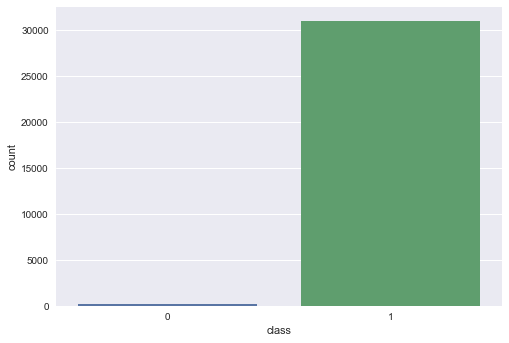

In [150]:
# see the class proportion after cleaing
print(df['class'].value_counts())
sns.countplot(df['class'], label="count")

### Outlier Detection

In [24]:
#Split features and class for analysis
features = df.drop('class', axis = 1)
target = df['class']

In [25]:
#Convert to numeric
features = features.apply(pd.to_numeric)

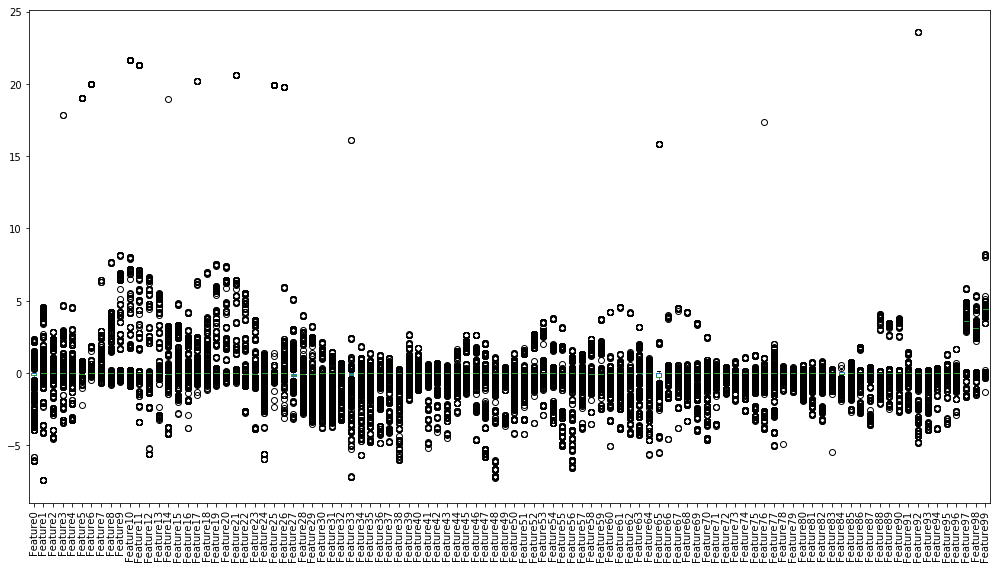

In [26]:
# feature visualization (columns 0:100)
features.iloc[:,0:100].plot(kind='box', rot=90, figsize=(14, 8))
plt.tight_layout()
plt.show()

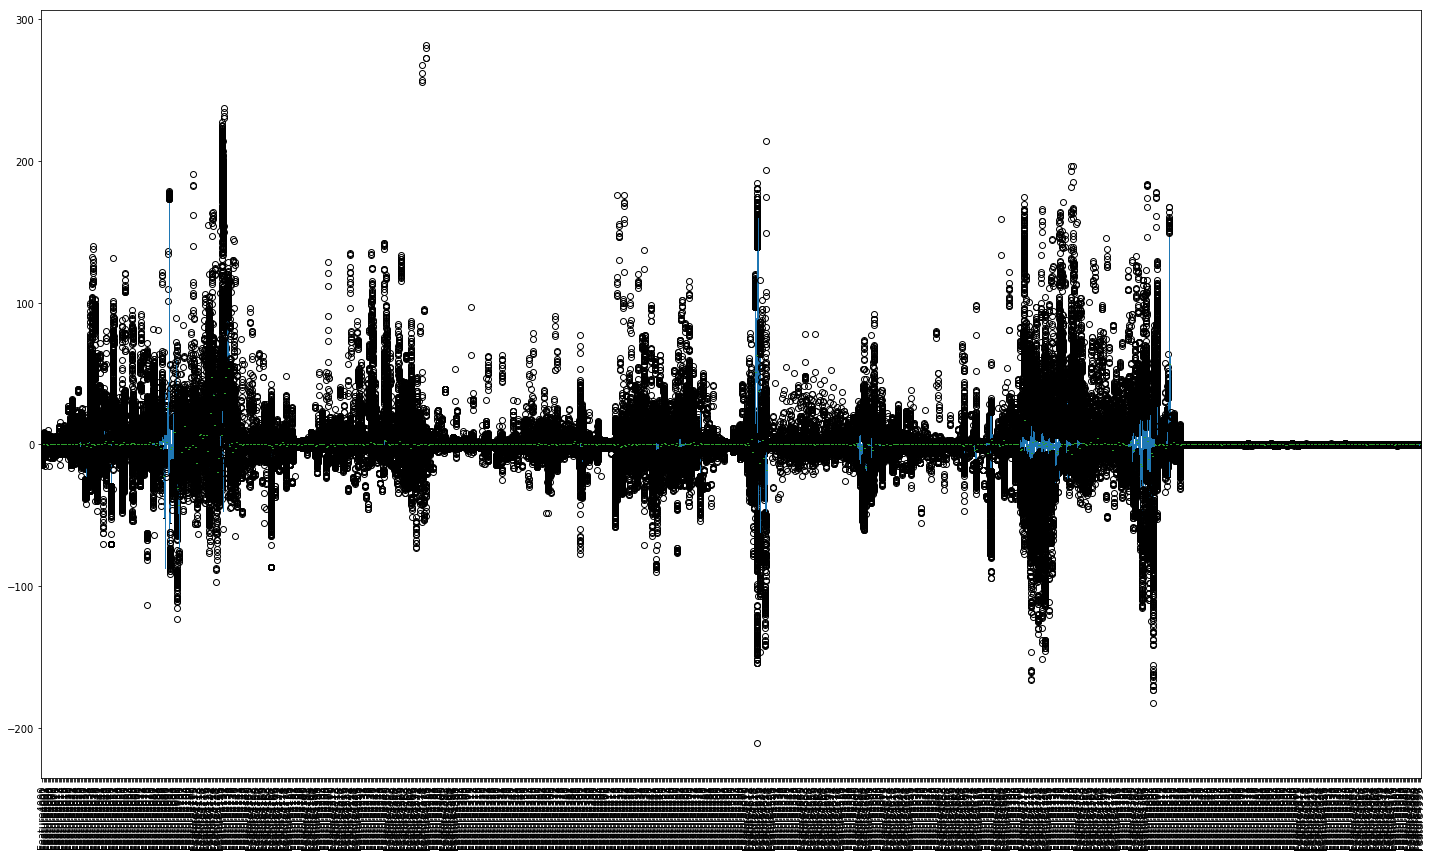

In [27]:
# feature visualization (columns 100:200)
features.iloc[:,4000:5000].plot(kind='box', rot=90, figsize=(20, 12))
plt.tight_layout()
plt.show()

0.05893715754715602


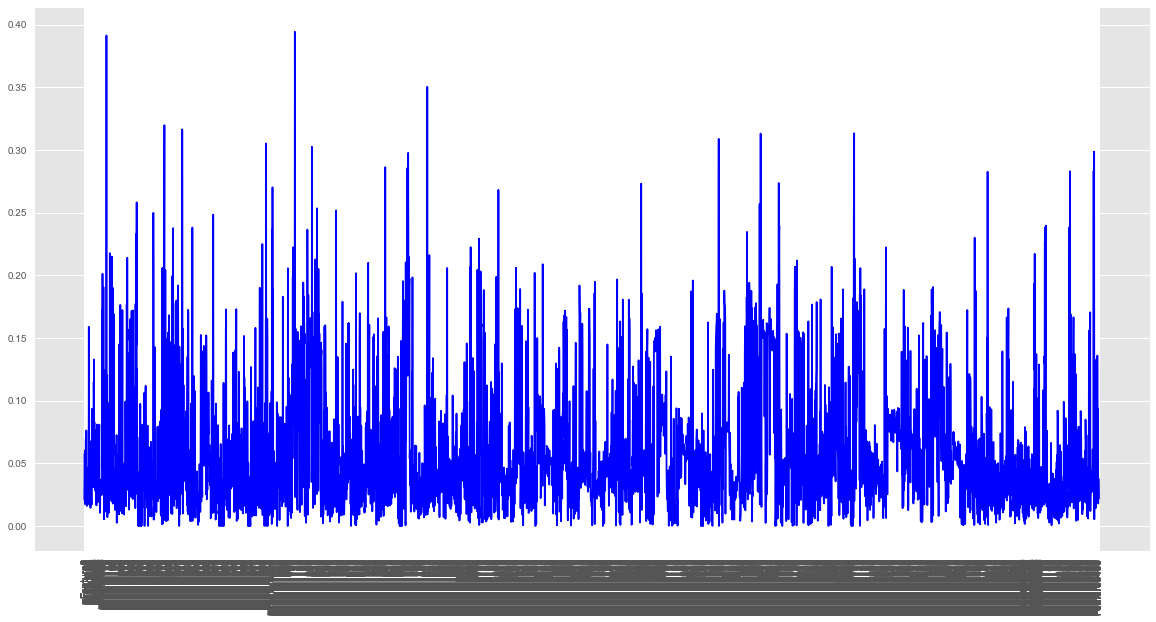

In [132]:
# outlier analysis 

Q1 = features.iloc[:,0:5408].quantile(0.25)
Q3 = features.iloc[:,0:5408].quantile(0.75)
IQR = Q3 - Q1

out = ((features.iloc[:,0:5408] < (Q1 - 1.5 * IQR)) | (features.iloc[:,0:5408] > (Q3 + 1.5 * IQR))).sum()

print(st.mean(out/31159))

figure(figsize=(20,10))
plt.style.use('ggplot')
plt.xticks(rotation=90)
plt.plot(out/31159, color = 'blue')

## Data Expolaration

### k-Means

In [94]:
x_kmns = df.drop('class', axis = 1)
y_kmns = df['class']

In [95]:
#Scaling 
scaler = StandardScaler()
scaler.fit(x_kmns)
x_kmns_scd = scaler.transform(x_kmns)

In [96]:
#Convert to dataframe for usability in the algorithms
x_kmns_scd= pd.DataFrame(x_kmns_scd)

In [101]:
#Define the method and transform the dataset
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(x_kmns_scd)
y_kmeans2 = kmeans2.predict(x_kmns_scd)

Text(0, 0.5, 'Feature 1')

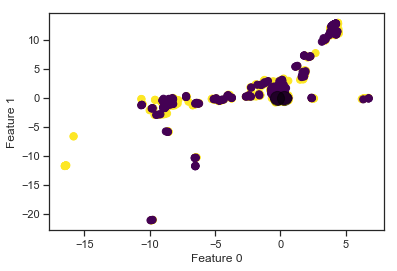

In [110]:
#K-Means Feature 0-1
plt.scatter(x_kmns_scd.iloc[:, 0], x_kmns_scd.iloc[:, 1], c=y_kmeans2, s=50, cmap='viridis')

centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

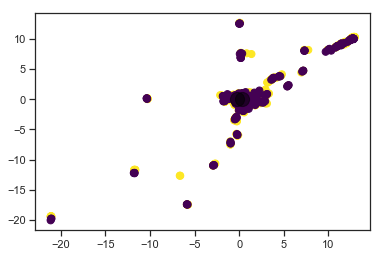

In [103]:
#K-Means Feature 1-2
plt.scatter(x_kmns_scd.iloc[:, 1], x_kmns_scd.iloc[:, 2], c=y_kmeans2, s=50, cmap='viridis')

centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=200, alpha=0.5)

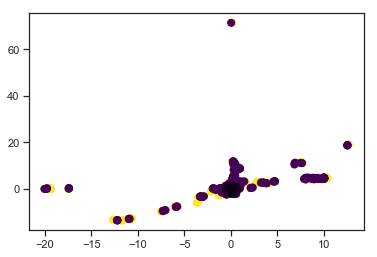

In [105]:
#K-Means Feature 2-3
plt.scatter(x_kmns_scd.iloc[:, 2], x_kmns_scd.iloc[:, 3], c=y_kmeans2, s=50, cmap='viridis')
centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=200, alpha=0.5)


### PCA

In [15]:
x_pcax= df.drop('class', axis = 1)
y_pcax = df['class']

#Scaling 
scaler = StandardScaler()
scaler.fit(x_pcax)
x_scaled = scaler.transform(x_pcax)

[0.0812858  0.14904052 0.20187725 0.23781094 0.26543038 0.28338622
 0.29621596 0.30765447 0.31872915 0.32779364 0.3363394  0.34441681
 0.35231954 0.35988616 0.3671483  0.37408601 0.38083086 0.38699839
 0.39312068 0.39918191 0.40511299 0.41094251 0.41666733 0.42225187
 0.42779923 0.43323938 0.438449   0.44360153 0.44863951 0.45350784
 0.45835473 0.46310868 0.46780764 0.4724239  0.47690266 0.48126195
 0.4855895  0.48987137 0.49406122 0.49817783 0.50222575 0.50624011
 0.51013494 0.51397034 0.51777048 0.52147675 0.52512725 0.52870971
 0.53223707 0.53565713 0.53900356 0.54231346 0.54555441 0.54875741
 0.55193097 0.55500813 0.55804259 0.56106043 0.56406759 0.56695159
 0.56980205 0.57260818 0.57537912 0.57811572 0.58083595 0.58353754
 0.58620549 0.58883495 0.59144226 0.59402268 0.59654849 0.59904719
 0.60152655 0.6039293  0.60631097 0.60866447 0.61097602 0.61326065
 0.61550939 0.61774247 0.61994945 0.62209271 0.62422265 0.62631631
 0.62837667 0.63038565 0.63237025 0.63428925 0.63618389 0.6380

(0, 1)

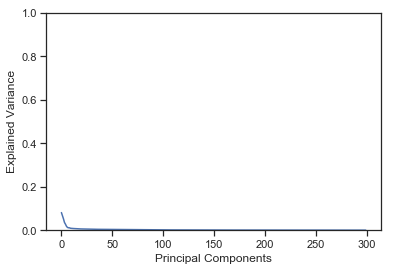

In [182]:
#PCA : components = 300, %80 of the variance explained with 300 dimensions.
# define the method and transform the dataset

pca1 = PCA(n_components = 300)
xpcax =  pca1.fit_transform(x_scaled)

pca1.explained_variance_ratio_

print(pca1.explained_variance_ratio_.cumsum())

plt.plot(pca1.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.ylim(0,1)

[0.0812858  0.14904052 0.20187725 0.23781094 0.26543038 0.28338622
 0.29621585 0.30765408 0.31872703 0.32778887]


Text(0, 0.5, 'Explained Variance')

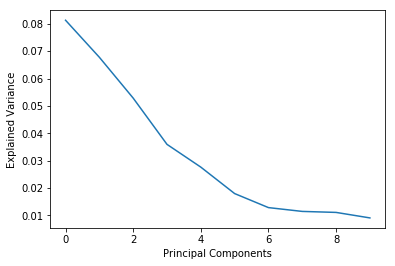

In [20]:
#PCA : components = 10
# define the method and transform the dataset

pca = PCA(n_components = 10)
x_pca =  pca.fit_transform(x_scaled)

pca.explained_variance_ratio_

print(pca.explained_variance_ratio_.cumsum())

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

In [21]:
#Convert to dataframe for usability in the algorithms
x_scaled = pd.DataFrame(x_scaled)
y_pcax = pd.DataFrame(y_pcax)

In [22]:
#Help codes for scatter plot
n_components=10
pca_columns = []
for i in range(1,n_components+1):
    pca_columns.append('principal_component'+str(i))

In [23]:
#Convert to dataframe for usability in the algorithms
pca_data = pd.DataFrame(x_pca,index=x_scaled.index,columns=pca_columns)

In [25]:
#Add class variable into pca_data set
pca_data['class'] = y_pcax['class'].values

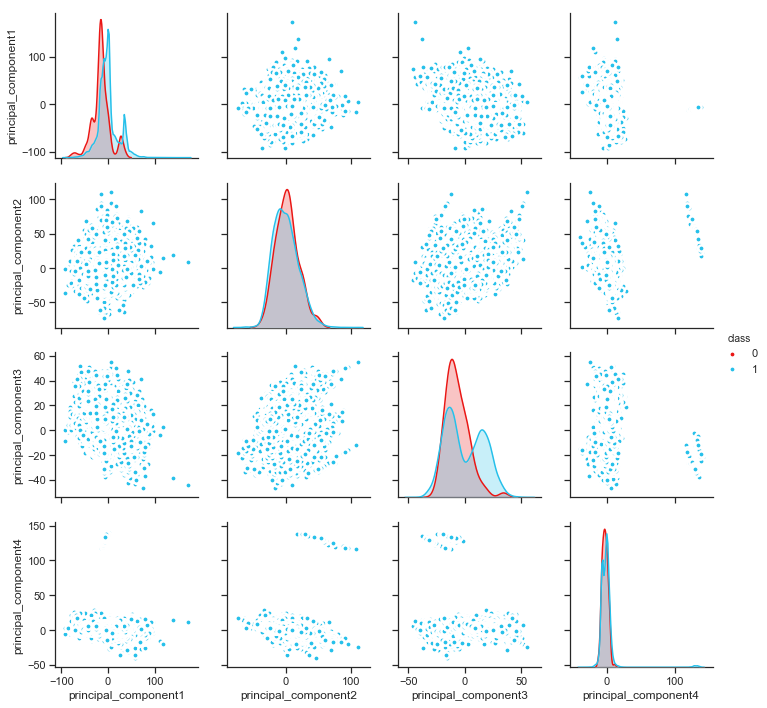

In [27]:
#Pairwise scatter plot of the continous features
sns.set(style="ticks")
flatui = ["#EA1715", "#26C0EA"]
#sns.palplot(sns.color_palette(flatui))
sns.pairplot(pca_data, hue="class",palette = flatui,vars = pca_columns[0:4],
             plot_kws=dict(s=40, #edgecolor="white", 
                           linewidth=2.5))

Text(0, 0.5, 'component 2')

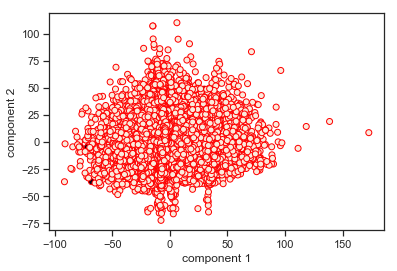

In [30]:
#PC1 & PC2
plt.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 1], 
            c = pca_data["class"],edgecolor='red')
plt.xlabel('component 1')
plt.ylabel('component 2')

Text(0, 0.5, 'component 3')

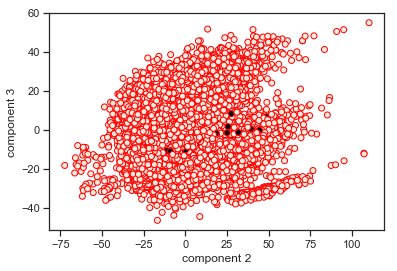

In [90]:
#PC2 & PC3
plt.scatter(pca_data.iloc[:, 1], pca_data.iloc[:, 2], 
            c = pca_data["class"],edgecolor='red')
plt.xlabel('component 2')
plt.ylabel('component 3')

Text(0, 0.5, 'component 3')

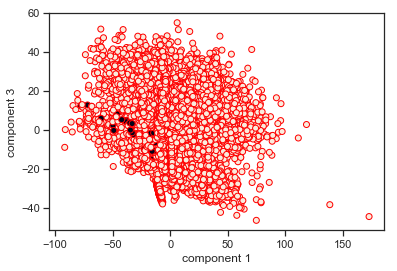

In [92]:
#PC3 & PC4
plt.scatter(pca_data.iloc[:, 0], pca_data.iloc[:, 2], 
            c = pca_data["class"],edgecolor='red')
plt.xlabel('component 1')
plt.ylabel('component 3')

### Oversampling

In [17]:
# define the method and transform the dataset
smote=SMOTE()
x_over, y_over = smote.fit_sample(x_scaled,y_pcax)

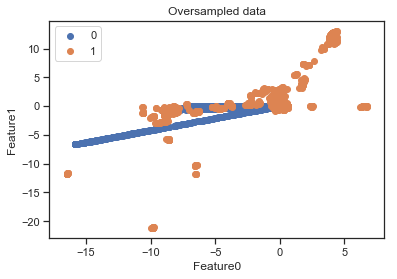

In [86]:
# Plot helper function
def draw_plot(X, y, label):
   for l in np.unique(y):
      plt.scatter(
         X[y==l, 0],
         X[y==l, 1],
         label=l
      )
   plt.title(label)
   plt.xlabel("Feature0")
   plt.ylabel("Feature1")  
   plt.legend()
   plt.show()

# plot the examples by class label
draw_plot(x_over, y_over, "Oversampled data")

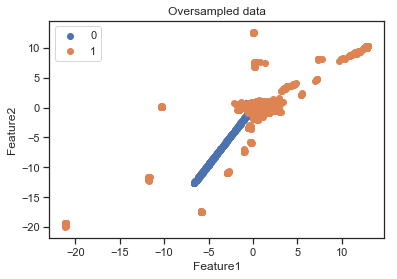

In [109]:
# Plot helper function
def draw_plot(X, y, label):
   for l in np.unique(y):
      plt.scatter(
         X[y==l, 1],
         X[y==l, 2],
         label=l
      )
   plt.title(label)
   plt.xlabel("Feature1")
   plt.ylabel("Feature2")  
   plt.legend()
   plt.show()

# plot the examples by class label
draw_plot(x_over, y_over, "Oversampled data")

### Undersampling

Counter({0: 151, 1: 151})


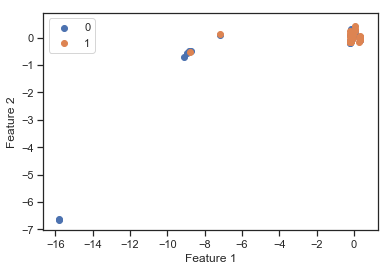

In [108]:
# Define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
x_under, y_under = undersample.fit_resample(x_scaled, y_pcax)
# summarize the new class distribution
counter = Counter(y_under)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_under == label)[0] 
    plt.scatter(x_under[row_ix, 1], x_under[row_ix, 2], label=str(label))
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### t-SNE

In [17]:
# Sample the data for computation time
seed = 0
df_samp3 = df.sample(frac = 0.5, random_state=seed)

In [18]:
X_df3 = df_samp3.drop('class', axis = 1)
y_df3 = df_samp3['class']

In [20]:
#Scaling 
scaler = StandardScaler()
scaler.fit(X_df3)
X_sc3= scaler.transform(X_df3)

In [21]:
# Define the method and transform the dataset
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results3 = tsne.fit_transform(X_sc3)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 15576 samples in 9.011s...
[t-SNE] Computed neighbors for 15576 samples in 2692.590s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15576
[t-SNE] Computed conditional probabilities for sample 2000 / 15576
[t-SNE] Computed conditional probabilities for sample 3000 / 15576
[t-SNE] Computed conditional probabilities for sample 4000 / 15576
[t-SNE] Computed conditional probabilities for sample 5000 / 15576
[t-SNE] Computed conditional probabilities for sample 6000 / 15576
[t-SNE] Computed conditional probabilities for sample 7000 / 15576
[t-SNE] Computed conditional probabilities for sample 8000 / 15576
[t-SNE] Computed conditional probabilities for sample 9000 / 15576
[t-SNE] Computed conditional probabilities for sample 10000 / 15576
[t-SNE] Computed conditional probabilities for sample 11000 / 15576
[t-SNE] Computed conditional probabilities for sample 12000 / 15576
[t-SNE] Computed conditional probabilities for

In [22]:
tsne_results3

array([[-5.982344 , -2.9064362],
       [-6.45733  , -3.5632448],
       [-2.7801442,  0.6086009],
       ...,
       [-5.6336417,  5.350884 ],
       [ 2.0571628,  1.460801 ],
       [-7.205516 , -1.1605235]], dtype=float32)

In [37]:
#Convert to dataframe for usability in the algorithms
y_df3 = pd.DataFrame(y_df3)
X_sc3 = pd.DataFrame(X_sc3)

In [38]:
#Add class variable into pca_data set
X_sc3["y"] = y_df3["class"].values

In [23]:

kmeans_sne = KMeans(n_clusters=2)
kmeans_sne.fit(tsne_results3)
y_kmeans_sne = kmeans_sne.predict(tsne_results3)

In [25]:
tsne_results3_k = pd.DataFrame(tsne_results3)

Text(0, 0.5, 'tsne2')

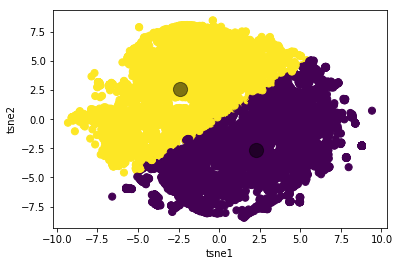

In [26]:

plt.scatter(tsne_results3_k.iloc[:, 0], tsne_results3_k.iloc[:, 1], c=y_kmeans_sne, s=50, cmap='viridis')

centers_sne = kmeans_sne.cluster_centers_
plt.scatter(centers_sne[:, 0], centers_sne[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel("tsne1")
plt.ylabel("tsne2")

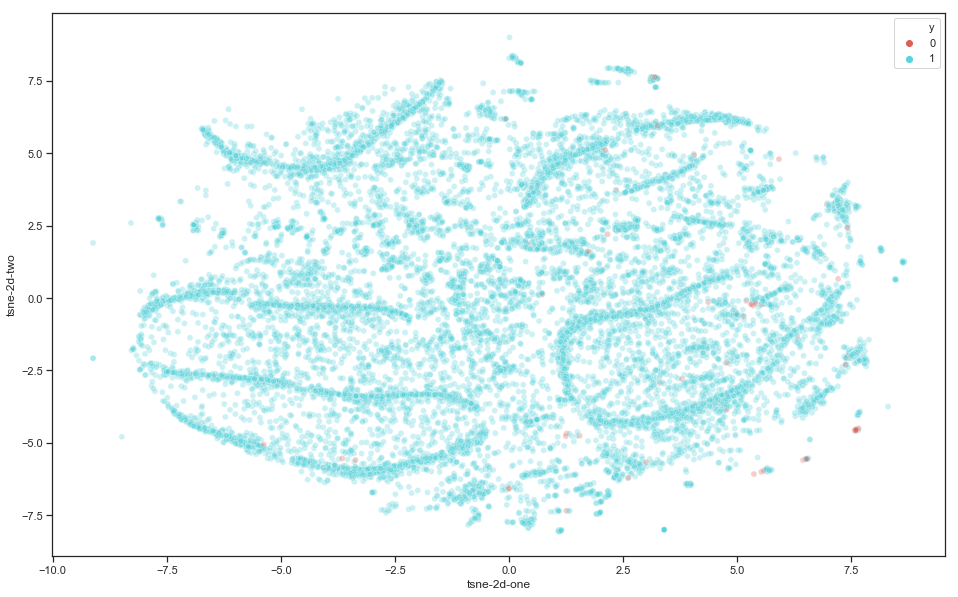

In [39]:
#Scatter plot of examples by class label

X_sc3['tsne-2d-one'] = tsne_results3[:,0]
X_sc3['tsne-2d-two'] = tsne_results3[:,1]
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 2),
    hue= "y",
    data=X_sc3,
    legend="full",
    alpha=0.3
)

### PCA & t-SNE

In [27]:
# Define the method and transform the dataset
pca = PCA(n_components = 300)
df_pca =  pca.fit_transform(X_sc3)

In [29]:
kmeans_pca = KMeans(n_clusters=2)
kmeans_pca.fit(df_pca)
y_kmeans_pca = kmeans_pca.predict(df_pca)

In [31]:
df_pca2 = pd.DataFrame(df_pca)

Text(0, 0.5, 'pc2')

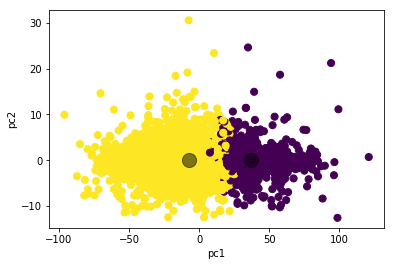

In [44]:
plt.scatter(df_pca2.iloc[:, 0], df_pca2.iloc[:, 200], c=y_kmeans_pca, s=50, cmap='viridis')

centers_pca = kmeans_pca.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 200], c='black', s=200, alpha=0.5)
plt.xlabel("pc1")
plt.ylabel("pc2")

In [82]:
# Define the method and transform the dataset

tsne_pca = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
pca_tsne_results = tsne_pca.fit_transform(df_pca)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 15576 samples in 0.257s...
[t-SNE] Computed neighbors for 15576 samples in 148.168s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15576
[t-SNE] Computed conditional probabilities for sample 2000 / 15576
[t-SNE] Computed conditional probabilities for sample 3000 / 15576
[t-SNE] Computed conditional probabilities for sample 4000 / 15576
[t-SNE] Computed conditional probabilities for sample 5000 / 15576
[t-SNE] Computed conditional probabilities for sample 6000 / 15576
[t-SNE] Computed conditional probabilities for sample 7000 / 15576
[t-SNE] Computed conditional probabilities for sample 8000 / 15576
[t-SNE] Computed conditional probabilities for sample 9000 / 15576
[t-SNE] Computed conditional probabilities for sample 10000 / 15576
[t-SNE] Computed conditional probabilities for sample 11000 / 15576
[t-SNE] Computed conditional probabilities for sample 12000 / 15576
[t-SNE] Computed conditional probabilities for 

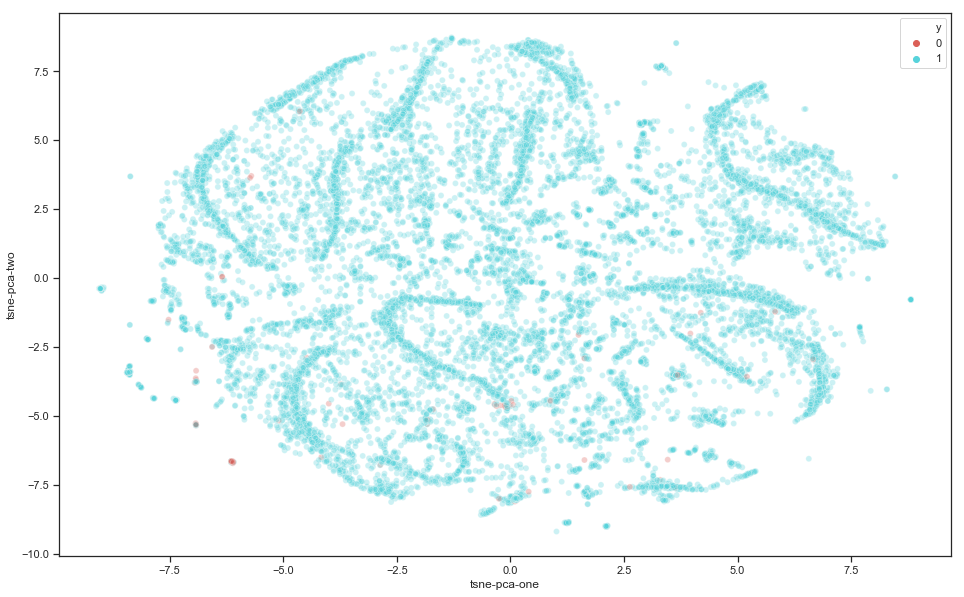

In [83]:
# Scatter plot of examples by class label

X_sc3['tsne-pca-one'] = pca_tsne_results[:,0]
X_sc3['tsne-pca-two'] = pca_tsne_results[:,1]
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="tsne-pca-one", y="tsne-pca-two",
    palette=sns.color_palette("hls", 2),
    hue= "y",
    data=X_sc3,
    legend="full",
    alpha=0.3
)

# SELECTION OF METHODS

In [107]:
# get a random sample from the main data to reduce the computation time
seed = 3
df_s = df.sample(frac = 0.40, random_state=seed)

In [108]:
# see the dimensions of sample data
print(df_s.shape)

(12461, 5409)


In [104]:
X = df_s.drop('class', axis = 1)
y = df_s['class']

In [176]:
#Scaling Methods - LogisticRegression

random_state = 0
skf = KFold(n_splits=5, shuffle=True, random_state=random_state) 
fold_idxs = list(skf.split(X))

clf = LogisticRegression() 

for name, scaler in [
('no scaling', None), ('min_max', MinMaxScaler()), ('robust', RobustScaler()), ('standard', StandardScaler())]:

    scores = []

    for i, (train_idx, test_idx) in enumerate(fold_idxs): 
        X_train = X.values[train_idx]
        y_train = y.values[train_idx]
        X_val = X.values[test_idx]
        y_val = y.values[test_idx]

        if scaler:
            scaler.fit(X_train)
            X_train = scaler.transform(X_train) 
            X_val = scaler.transform(X_val)

        clf.fit(X_train, y_train)
        y_pred = clf.predict_proba(X_val)
        scores.append(roc_auc_score(y_val, y_pred[:, 1]))

    print(name, 'AUROC:', np.mean(scores))

no scaling AUROC: 0.8933980395021415
min_max AUROC: 0.946132272020008
robust AUROC: 0.8240585895259127
standard AUROC: 0.9072349592860547


In [105]:
#Scaling Methods - KNN

random_state = 0
skf = KFold(n_splits=5, shuffle=True, random_state=random_state) 
fold_idxs = list(skf.split(X))

clf = KNeighborsClassifier(n_neighbors=5) 

for name, scaler in [
('no scaling', None), ('min_max', MinMaxScaler()), ('robust', RobustScaler()), ('standard', StandardScaler())]:

    scores = []

    for i, (train_idx, test_idx) in enumerate(fold_idxs): 
        X_train = X.values[train_idx]
        y_train = y.values[train_idx]
        X_val = X.values[test_idx]
        y_val = y.values[test_idx]

        if scaler:
            scaler.fit(X_train)
            X_train = scaler.transform(X_train) 
            X_val = scaler.transform(X_val)

        clf.fit(X_train, y_train)
        y_pred = clf.predict_proba(X_val)
        scores.append(roc_auc_score(y_val, y_pred[:, 1]))

    print(name, 'AUROC:', np.mean(scores))

no scaling AUROC: 0.6994198290248086
min_max AUROC: 0.688726778369271
robust AUROC: 0.6734240768613328
standard AUROC: 0.7397526356245064


In [180]:
#Scaling Methods - RandomForest

random_state = 0
skf = KFold(n_splits=5, shuffle=True, random_state=random_state) 
fold_idxs = list(skf.split(X))

clf = RandomForestClassifier(random_state = random_state)

for name, scaler in [
('no scaling', None), ('min_max', MinMaxScaler()), ('robust', RobustScaler()), ('standard', StandardScaler())]:

    scores = []

    for i, (train_idx, test_idx) in enumerate(fold_idxs): 
        X_train = X.values[train_idx]
        y_train = y.values[train_idx]
        X_val = X.values[test_idx]
        y_val = y.values[test_idx]

        if scaler:
            scaler.fit(X_train)
            X_train = scaler.transform(X_train) 
            X_val = scaler.transform(X_val)

        clf.fit(X_train, y_train)
        y_pred = clf.predict_proba(X_val)
        scores.append(roc_auc_score(y_val, y_pred[:, 1]))

    print(name, 'AUROC:', np.mean(scores))

no scaling AUROC: 0.8020450234362968
min_max AUROC: 0.8144752240565396
robust AUROC: 0.802075978453162
standard AUROC: 0.802032361950064


In [181]:
#Scaling Method - NaiveBayes

random_state = 0
skf = KFold(n_splits=5, shuffle=True, random_state=random_state) 
fold_idxs = list(skf.split(X))

clf = GaussianNB()

for name, scaler in [
('no scaling', None), ('min_max', MinMaxScaler()), ('robust', RobustScaler()), ('standard', StandardScaler())]:

    scores = []

    for i, (train_idx, test_idx) in enumerate(fold_idxs): 
        X_train = X.values[train_idx]
        y_train = y.values[train_idx]
        X_val = X.values[test_idx]
        y_val = y.values[test_idx]

        if scaler:
            scaler.fit(X_train)
            X_train = scaler.transform(X_train) 
            X_val = scaler.transform(X_val)

        clf.fit(X_train, y_train)
        y_pred = clf.predict_proba(X_val)
        scores.append(roc_auc_score(y_val, y_pred[:, 1]))

    print(name, 'AUROC:', np.mean(scores))

no scaling AUROC: 0.7085763432101666
min_max AUROC: 0.7093532741348947
robust AUROC: 0.7099392652998029
standard AUROC: 0.7088427538228197


###### At the end of this phase, Min-MaxScaler was selected as scaling method.

# MODEL BUILDING

## Prepare data

In [16]:
# Prepare main data 
X1 = df.drop('class', axis = 1)
y1 = df['class']

In [17]:
# Normalization
scaler = MinMaxScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)

In [18]:
#Left a part of the data apart as a test data set
x_m, x_test, y_m, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [19]:
#To be able to split in the cross-validation
x_m = pd.DataFrame(x_m)

## Models without oversampling and dimension reduction

Models are trained with original imbalance data.

LR :
 AUROC: 0.959 Balanced ACC: 0.883 ACC: 0.988 Precision: 0.999 Recall: 0.989 

NB :
 AUROC: 0.774 Balanced ACC: 0.755 ACC: 0.732 Precision: 0.998 Recall: 0.732 



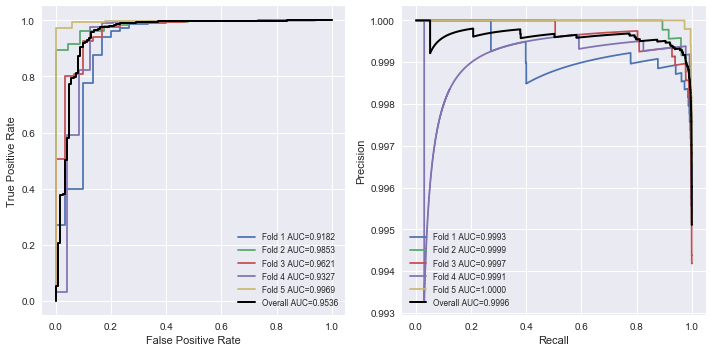

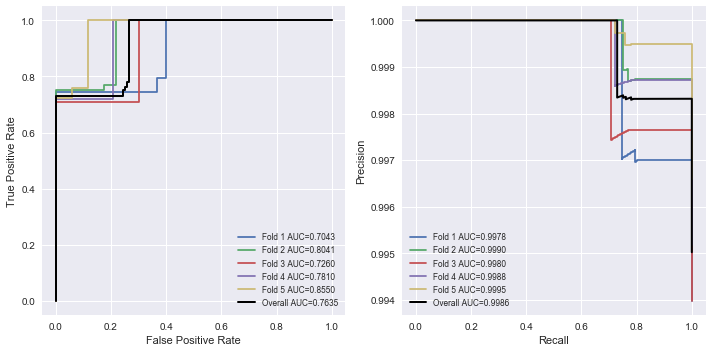

In [95]:
#LOGISTIC REGRESSION & NAIVE BAYES 

random_state = 0 
skf = KFold(n_splits=5, shuffle=True, random_state=random_state) 
fold_idxs = list(skf.split(x_m))


for name, model in [ ('LR' ,LogisticRegression(class_weight="balanced")) ,('NB', GaussianNB())]:

        acc_scores = []
        auc_scores = []
        precision_scores = []
        recall_scores = []
        balanced_acc = []
        names = []
        y_probs = []
        y_vals = []
        
        
        f, axes = plt.subplots(1, 2, figsize=(10, 5))

        for i, (train_idx, test_idx) in enumerate(fold_idxs): 
            X_train = x_m.values[train_idx]
            y_train = y_m.values[train_idx]
            X_val = x_m.values[test_idx]
            y_val = y_m.values[test_idx]
            
            model.fit(X_train, y_train)
            y_prob = model.predict_proba(X_val)
            y_pred = model.predict(X_val)
            y_probs.append(y_prob[:,1])
            y_vals.append(y_val)

            auc_scores.append(roc_auc_score(y_val, y_prob[:,1]))
            acc_scores.append(accuracy_score(y_val,y_pred))
            precision_scores.append(precision_score(y_val, y_pred))
            recall_scores.append(recall_score(y_val,y_pred))
            balanced_acc.append(balanced_accuracy_score(y_val,y_pred))
            names.append(name)
            
            precision, recall, _ = precision_recall_curve(y_val, y_prob[:,1])
            fpr, tpr, _ = roc_curve(y_val, y_prob[:,1])
            
            lab1 = 'Fold %d AUC=%.4f' % (i+1, auc(fpr, tpr))
            lab2 = 'Fold %d AUC=%.4f' % (i+1, auc(recall, precision))
            axes[0].step(fpr,tpr,label = lab1)
            axes[1].step(recall, precision, label=lab2)
            y_vals.append(y_val)
            y_probs.append(y_prob[:,1])
               
            
        print(name, ':\n', 'AUROC:', round(np.mean(auc_scores),3), 'Balanced ACC:', round(np.mean(balanced_acc),3), 'ACC:', round(np.mean(acc_scores),3), 'Precision:', round(np.mean(precision_scores),3), 
                 'Recall:', round(np.mean(recall_scores),3), '\n')
        
        y_vals = numpy.concatenate(y_vals)
        y_probs = numpy.concatenate(y_probs)
        precision, recall, _ = precision_recall_curve(y_vals, y_probs)
        fpr, tpr, _ = roc_curve(y_vals, y_probs)
        lab1 = 'Overall AUC=%.4f' % (auc(fpr,tpr))
        lab2 = 'Overall AUC=%.4f' % (auc(recall, precision))
        axes[0].step(fpr,tpr, label = lab1, lw=2, color = 'black')
        axes[0].set_xlabel('False Positive Rate')
        axes[0].set_ylabel('True Positive Rate')
        axes[0].legend(loc='lower right', fontsize='small')
        axes[1].step(recall, precision, label=lab2, lw=2, color='black')
        axes[1].set_xlabel('Recall')
        axes[1].set_ylabel('Precision')
        axes[1].legend(loc='lower left', fontsize='small')
        f.tight_layout()

RF :
 AUROC: 0.87 Balanced ACC: 0.59 ACC: 0.995 Precision: 0.996 Recall: 1.0 

KNN :
 AUROC: 0.788 Balanced ACC: 0.589 ACC: 0.995 Precision: 0.996 Recall: 0.999 



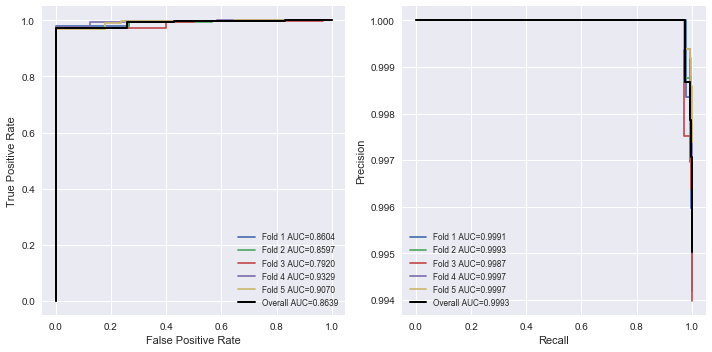

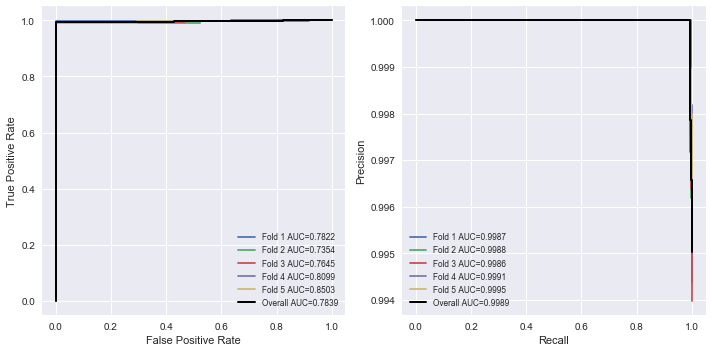

In [97]:
#RANDOM FOREST & KNN

random_state = 0 
skf = KFold(n_splits=5, shuffle=True, random_state=random_state) 
fold_idxs = list(skf.split(x_m))


for name, model in [ ('RF', RandomForestClassifier(random_state = 0, class_weight="balanced")), ('KNN', KNeighborsClassifier())]:

        acc_scores = []
        auc_scores = []
        precision_scores = []
        recall_scores = []
        balanced_acc = []
        names = []
        y_probs = []
        y_vals = []
        
        f, axes = plt.subplots(1, 2, figsize=(10, 5))

        for i, (train_idx, test_idx) in enumerate(fold_idxs): 
            X_train = x_m.values[train_idx]
            y_train = y_m.values[train_idx]
            X_val = x_m.values[test_idx]
            y_val = y_m.values[test_idx]
            
            model.fit(X_train, y_train)
            y_prob = model.predict_proba(X_val)
            y_pred = model.predict(X_val)
            y_probs.append(y_prob[:,1])
            y_vals.append(y_val)

            auc_scores.append(roc_auc_score(y_val, y_prob[:,1]))
            acc_scores.append(accuracy_score(y_val,y_pred))
            precision_scores.append(precision_score(y_val, y_pred))
            recall_scores.append(recall_score(y_val,y_pred))
            balanced_acc.append(balanced_accuracy_score(y_val,y_pred))
            names.append(name)
            
            precision, recall, _ = precision_recall_curve(y_val, y_prob[:,1])
            fpr, tpr, _ = roc_curve(y_val, y_prob[:,1])
            
            lab1 = 'Fold %d AUC=%.4f' % (i+1, auc(fpr, tpr))
            lab2 = 'Fold %d AUC=%.4f' % (i+1, auc(recall, precision))
            axes[0].step(fpr,tpr,label = lab1)
            axes[1].step(recall, precision, label=lab2)
            y_vals.append(y_val)
            y_probs.append(y_prob[:,1])
               
            
        print(name, ':\n', 'AUROC:', round(np.mean(auc_scores),3),'Balanced ACC:', round(np.mean(balanced_acc),3), 'ACC:', round(np.mean(acc_scores),3), 'Precision:', round(np.mean(precision_scores),3), 
                 'Recall:', round(np.mean(recall_scores),3), '\n')
        
        y_vals = numpy.concatenate(y_vals)
        y_probs = numpy.concatenate(y_probs)
        precision, recall, _ = precision_recall_curve(y_vals, y_probs)
        fpr, tpr, _ = roc_curve(y_vals, y_probs)
        lab1 = 'Overall AUC=%.4f' % (auc(fpr,tpr))
        lab2 = 'Overall AUC=%.4f' % (auc(recall, precision))
        axes[0].step(fpr,tpr, label = lab1, lw=2, color = 'black')
        axes[0].set_xlabel('False Positive Rate')
        axes[0].set_ylabel('True Positive Rate')
        axes[0].legend(loc='lower right', fontsize='small')
        axes[1].step(recall, precision, label=lab2, lw=2, color='black')
        axes[1].set_xlabel('Recall')
        axes[1].set_ylabel('Precision')
        axes[1].legend(loc='lower left', fontsize='small')
        f.tight_layout()


## Models with oversampled data

Models are trained with oversampled and balanced data.

LR :
 AUROC: 0.964 ACC: 0.99 Precision: 0.999 Recall: 0.992 

NB :
 AUROC: 0.781 ACC: 0.781 Precision: 0.998 Recall: 0.781 



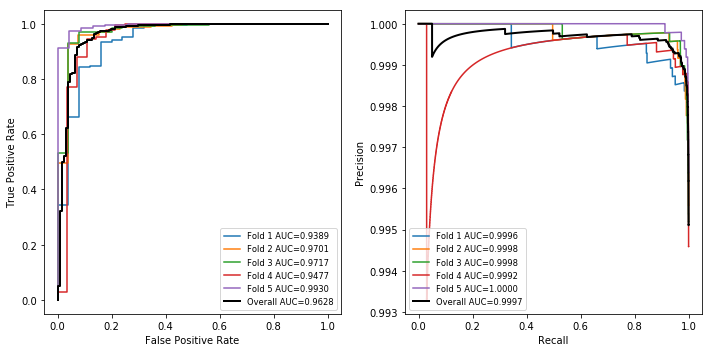

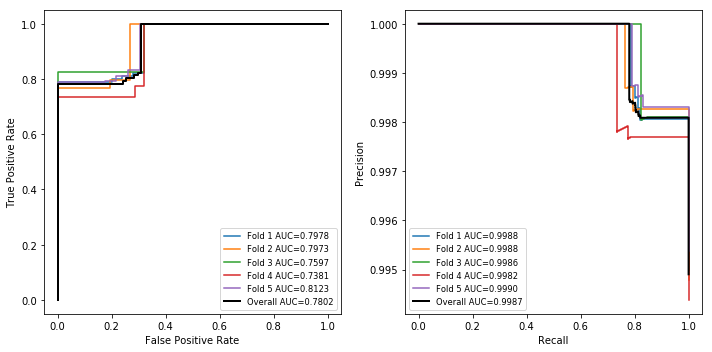

In [42]:
#Logistic Regression & Naive Bayes

random_state = 0 
skf = KFold(n_splits=5, shuffle=True, random_state=random_state) 
fold_idxs = list(skf.split(x_m))


for name, model in [ ('LR' ,LogisticRegression()) ,('NB', GaussianNB())]:

        acc_scores = []
        auc_scores = []
        precision_scores = []
        recall_scores = []
        names = []
        y_probs = []
        y_vals = []
        
        f, axes = plt.subplots(1, 2, figsize=(10, 5))

        for i, (train_idx, test_idx) in enumerate(fold_idxs): 
            X_train = x_m.values[train_idx]
            y_train = y_m.values[train_idx]
            X_val = x_m.values[test_idx]
            y_val = y_m.values[test_idx]

            #OverSampling
            smote= SMOTE()
            x_resamp, y_resamp = smote.fit_resample(X_train, y_train)
            
            model.fit(x_resamp, y_resamp)
            y_prob = model.predict_proba(X_val)
            y_pred = model.predict(X_val)
            y_probs.append(y_prob[:,1])
            y_vals.append(y_val)

            auc_scores.append(roc_auc_score(y_val, y_prob[:,1]))
            acc_scores.append(accuracy_score(y_val,y_pred))
            precision_scores.append(precision_score(y_val, y_pred))
            recall_scores.append(recall_score(y_val,y_pred))
            names.append(name)
            
            precision, recall, _ = precision_recall_curve(y_val, y_prob[:,1])
            fpr, tpr, _ = roc_curve(y_val, y_prob[:,1])
            
            lab1 = 'Fold %d AUC=%.4f' % (i+1, auc(fpr, tpr))
            lab2 = 'Fold %d AUC=%.4f' % (i+1, auc(recall, precision))
            axes[0].step(fpr,tpr,label = lab1)
            axes[1].step(recall, precision, label=lab2)
            y_vals.append(y_val)
            y_probs.append(y_prob[:,1])
               
            
        print(name, ':\n', 'AUROC:', round(np.mean(auc_scores),3), 'ACC:', round(np.mean(acc_scores),3), 'Precision:', round(np.mean(precision_scores),3), 
                 'Recall:', round(np.mean(recall_scores),3), '\n')
        
        y_vals = numpy.concatenate(y_vals)
        y_probs = numpy.concatenate(y_probs)
        precision, recall, _ = precision_recall_curve(y_vals, y_probs)
        fpr, tpr, _ = roc_curve(y_vals, y_probs)
        lab1 = 'Overall AUC=%.4f' % (auc(fpr,tpr))
        lab2 = 'Overall AUC=%.4f' % (auc(recall, precision))
        axes[0].step(fpr,tpr, label = lab1, lw=2, color = 'black')
        axes[0].set_xlabel('False Positive Rate')
        axes[0].set_ylabel('True Positive Rate')
        axes[0].legend(loc='lower right', fontsize='small')
        axes[1].step(recall, precision, label=lab2, lw=2, color='black')
        axes[1].set_xlabel('Recall')
        axes[1].set_ylabel('Precision')
        axes[1].legend(loc='lower left', fontsize='small')
        f.tight_layout()
        

RF :
 AUROC: 0.924 ACC: 0.996 Precision: 0.997 Recall: 0.998 

KNN :
 AUROC: 0.875 ACC: 0.989 Precision: 0.998 Recall: 0.991 



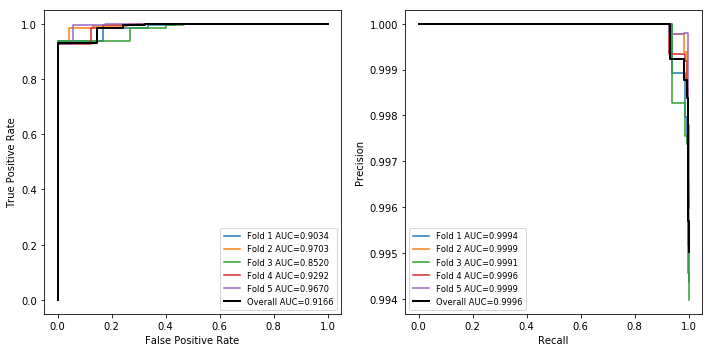

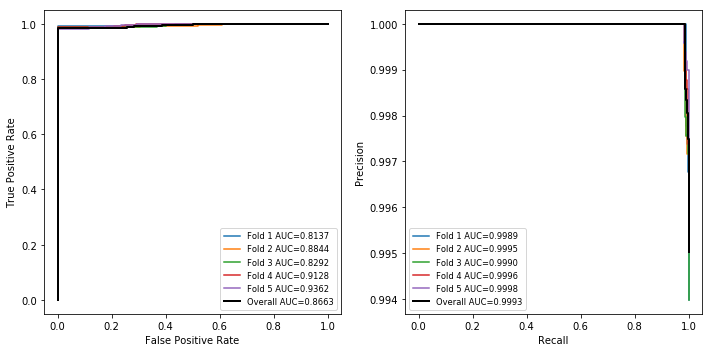

In [37]:
#Random Forest & KNN

random_state = 0 
skf = KFold(n_splits=5, shuffle=True, random_state=random_state) 
fold_idxs = list(skf.split(x_m))


for name, model in [('RF', RandomForestClassifier(random_state = 0)), ('KNN', KNeighborsClassifier())]:

        acc_scores = []
        auc_scores = []
        precision_scores = []
        recall_scores = []
        names = []
        y_probs = []
        y_vals = []
        
        f, axes = plt.subplots(1, 2, figsize=(10, 5))

        for i, (train_idx, test_idx) in enumerate(fold_idxs): 
            X_train = x_m.values[train_idx]
            y_train = y_m.values[train_idx]
            X_val = x_m.values[test_idx]
            y_val = y_m.values[test_idx]

            #OverSampling
            smote= SMOTE()
            x_resamp, y_resamp = smote.fit_resample(X_train, y_train)
            
            model.fit(x_resamp, y_resamp)
            y_prob = model.predict_proba(X_val)
            y_pred = model.predict(X_val)
            y_probs.append(y_prob[:,1])
            y_vals.append(y_val)

            auc_scores.append(roc_auc_score(y_val, y_prob[:,1]))
            acc_scores.append(accuracy_score(y_val,y_pred))
            precision_scores.append(precision_score(y_val, y_pred))
            recall_scores.append(recall_score(y_val,y_pred))
            names.append(name)
            
            precision, recall, _ = precision_recall_curve(y_val, y_prob[:,1])
            fpr, tpr, _ = roc_curve(y_val, y_prob[:,1])
            
            lab1 = 'Fold %d AUC=%.4f' % (i+1, auc(fpr, tpr))
            lab2 = 'Fold %d AUC=%.4f' % (i+1, auc(recall, precision))
            axes[0].step(fpr,tpr,label = lab1)
            axes[1].step(recall, precision, label=lab2)
            y_vals.append(y_val)
            y_probs.append(y_prob[:,1])
               
            
        print(name, ':\n', 'AUROC:', round(np.mean(auc_scores),3), 'ACC:', round(np.mean(acc_scores),3), 'Precision:', round(np.mean(precision_scores),3), 
                 'Recall:', round(np.mean(recall_scores),3), '\n')
        
        y_vals = numpy.concatenate(y_vals)
        y_probs = numpy.concatenate(y_probs)
        precision, recall, _ = precision_recall_curve(y_vals, y_probs)
        fpr, tpr, _ = roc_curve(y_vals, y_probs)
        lab1 = 'Overall AUC=%.4f' % (auc(fpr,tpr))
        lab2 = 'Overall AUC=%.4f' % (auc(recall, precision))
        axes[0].step(fpr,tpr, label = lab1, lw=2, color = 'black')
        axes[0].set_xlabel('False Positive Rate')
        axes[0].set_ylabel('True Positive Rate')
        axes[0].legend(loc='lower right', fontsize='small')
        axes[1].step(recall, precision, label=lab2, lw=2, color='black')
        axes[1].set_xlabel('Recall')
        axes[1].set_ylabel('Precision')
        axes[1].legend(loc='lower left', fontsize='small')
        f.tight_layout()

##### Learning Curves

In [ ]:
#Oversampling for Learning Curves
x_m_samp,y_m_samp = SMOTE().fit_resample(x_m,y_m)

In [156]:
print(x_m_samp.shape)

(49596, 5408)


training accuracy: 0.950 test accuracy: 0.840 subset size: 20.000
training accuracy: 0.978 test accuracy: 0.913 subset size: 91.000
training accuracy: 0.976 test accuracy: 0.954 subset size: 417.000
training accuracy: 0.990 test accuracy: 0.976 subset size: 1906.000
training accuracy: 0.996 test accuracy: 0.990 subset size: 8697.000
training accuracy: 0.997 test accuracy: 0.996 subset size: 39675.000


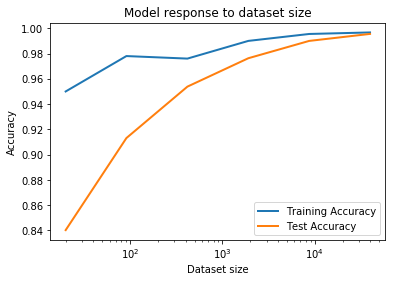

In [30]:
#Learning Curves

def data_size_response(model,trX,teX,trY,teY,score_func,prob=True,n_subsets=6):

    train_accs,test_accs = [],[]
    subset_sizes = np.exp(np.linspace(3,np.log(trX.shape[0]),n_subsets)).astype(int)

    for m in subset_sizes:
        model.fit(trX[:m],trY[:m])
        if prob:
            train_acc = score_func(trY[:m],model.predict_proba(trX[:m]))
            test_acc = score_func(teY,model.predict_proba(teX))
        else:
            train_acc = score_func(trY[:m],model.predict(trX[:m]))
            test_acc = score_func(teY,model.predict(teX))
        print('training accuracy: %.3f test accuracy: %.3f subset size: %.3f' % (train_acc,test_acc,m))
        train_accs.append(train_acc)
        test_accs.append(test_acc)

    return subset_sizes,train_accs,test_accs

def plot_response(subset_sizes,train_accs,test_accs):

    plt.plot(subset_sizes,train_accs,lw=2)
    plt.plot(subset_sizes,test_accs,lw=2)
    plt.legend(['Training Accuracy','Test Accuracy'])
    plt.xscale('log')
    plt.xlabel('Dataset size')
    plt.ylabel('Accuracy')
    plt.title('Model response to dataset size')
    plt.show()
    
#Train-val split
x_tr, x_val, y_tr, y_val = train_test_split(x_m_samp, y_m_samp, test_size=0.2, random_state=0)

training accuracy: 1.000 test accuracy: 0.810 subset size: 20.000
training accuracy: 0.966 test accuracy: 0.814 subset size: 59.000
training accuracy: 0.994 test accuracy: 0.929 subset size: 175.000
training accuracy: 0.985 test accuracy: 0.958 subset size: 519.000
training accuracy: 0.989 test accuracy: 0.974 subset size: 1535.000
training accuracy: 0.993 test accuracy: 0.985 subset size: 4538.000
training accuracy: 0.994 test accuracy: 0.993 subset size: 13419.000
training accuracy: 0.997 test accuracy: 0.996 subset size: 39675.000


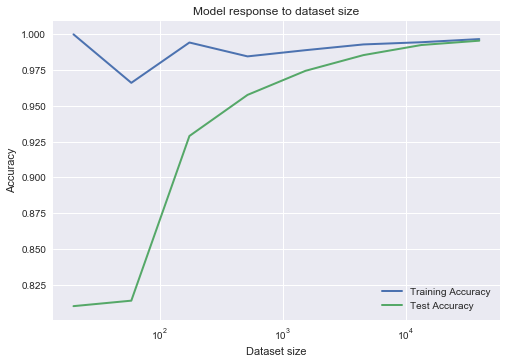

In [40]:
#LogisticRegression - Learning Curve

model = LogisticRegression()
score_func = accuracy_score
response = data_size_response(model,x_tr,x_val,y_tr,y_val,score_func,prob=False)
plot_response(*response)

training accuracy: 1.000 test accuracy: 0.698 subset size: 20.000
training accuracy: 0.983 test accuracy: 0.822 subset size: 59.000
training accuracy: 0.994 test accuracy: 0.899 subset size: 175.000
training accuracy: 0.998 test accuracy: 0.961 subset size: 519.000
training accuracy: 0.999 test accuracy: 0.974 subset size: 1535.000
training accuracy: 0.999 test accuracy: 0.991 subset size: 4538.000
training accuracy: 1.000 test accuracy: 0.998 subset size: 13419.000
training accuracy: 1.000 test accuracy: 0.999 subset size: 39675.000


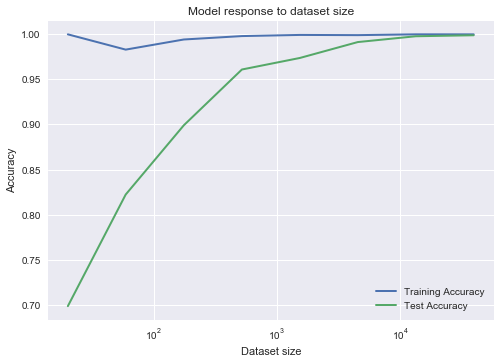

In [39]:
#Random Forest - Learning Curve

model = RandomForestClassifier(random_state = 0)
score_func = accuracy_score
response = data_size_response(model,x_tr,x_val,y_tr,y_val,score_func,prob=False)
plot_response(*response)

training accuracy: 0.750 test accuracy: 0.725 subset size: 20.000
training accuracy: 0.898 test accuracy: 0.767 subset size: 59.000
training accuracy: 0.886 test accuracy: 0.827 subset size: 175.000
training accuracy: 0.929 test accuracy: 0.920 subset size: 519.000
training accuracy: 0.967 test accuracy: 0.951 subset size: 1535.000
training accuracy: 0.985 test accuracy: 0.973 subset size: 4538.000
training accuracy: 0.992 test accuracy: 0.986 subset size: 13419.000
training accuracy: 0.996 test accuracy: 0.995 subset size: 39675.000


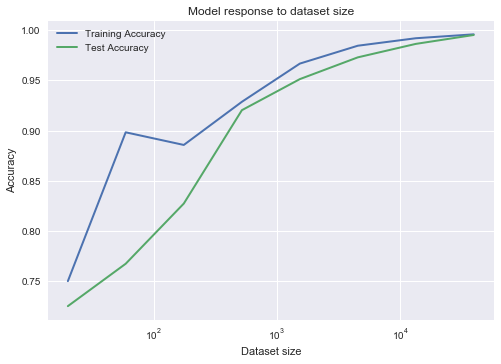

In [41]:
#KNN -  Learning Curve

model = KNeighborsClassifier()
score_func = accuracy_score
response = data_size_response(model,x_tr,x_val,y_tr,y_val,score_func,prob=False)
plot_response(*response)

training accuracy: 0.950 test accuracy: 0.720 subset size: 20.000
training accuracy: 0.983 test accuracy: 0.804 subset size: 59.000
training accuracy: 0.943 test accuracy: 0.839 subset size: 175.000
training accuracy: 0.904 test accuracy: 0.871 subset size: 519.000
training accuracy: 0.898 test accuracy: 0.884 subset size: 1535.000
training accuracy: 0.883 test accuracy: 0.879 subset size: 4538.000
training accuracy: 0.876 test accuracy: 0.870 subset size: 13419.000
training accuracy: 0.872 test accuracy: 0.869 subset size: 39675.000


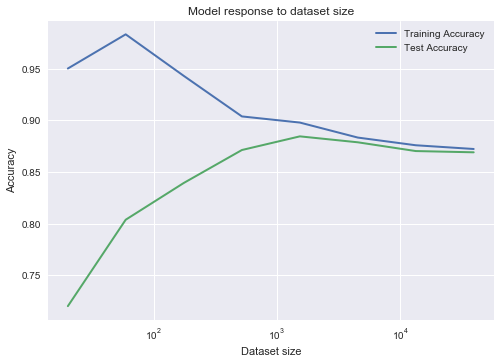

In [42]:
#NaiveBayes - Learning Curve

model = GaussianNB()
score_func = accuracy_score
response = data_size_response(model,x_tr,x_val,y_tr,y_val,score_func,prob=False)
plot_response(*response)

##### At the end of model building phase, LogisticRegression was selected as the best model.

## Selection of Dimension Reduction Method for LogisticRegression

In [45]:
#Selection Dim Reduction Method for Logistic Regression : PCA & Feature Agglomeration

random_state=0
skf = KFold(n_splits=5, shuffle=True, random_state=random_state) 
fold_idxs = list(skf.split(x_m))

clf = LogisticRegression()

for name, feature_reducer in [
    ('pca', PCA(n_components=10)),
    ('clustering single', FeatureAgglomeration(n_clusters=10, linkage='single')), 
    ('clustering complete', FeatureAgglomeration(n_clusters=10, linkage='complete')), 
    ('clustering averag', FeatureAgglomeration(n_clusters=10, linkage='average')), 
    ('clustering ward', FeatureAgglomeration(n_clusters=10, linkage='ward')), ]:


    acc_scores = []
    auc_scores = []
    precision_scores = []
    recall_scores = []
    names = []

    for i, (train_idx, test_idx) in enumerate(fold_idxs): 
        X_train = x_m.values[train_idx]
        y_train = y_m.values[train_idx]
        X_val = x_m.values[test_idx]
        y_val = y_m.values[test_idx]
        
        #OverSampling
        smote= SMOTE()
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
        
        feature_reducer.fit(X_resampled)
        X_resampled = feature_reducer.transform(X_resampled)
        X_val = feature_reducer.transform(X_val)
        
        clf.fit(X_resampled, y_resampled)
        y_prob = clf.predict_proba(X_val)
        y_pred = clf.predict(X_val)
        auc_scores.append(roc_auc_score(y_val, y_prob[:,1]))
        acc_scores.append(accuracy_score(y_val,y_pred))
        precision_scores.append(precision_score(y_val, y_pred))
        recall_scores.append(recall_score(y_val,y_pred))
        names.append(name)
               
    print(name, ':\n', 'AUROC:', round(np.mean(auc_scores),3), 'ACC:', round(np.mean(acc_scores),3), 'Precision:', round(np.mean(precision_scores),3), 
                 'Recall:', round(np.mean(recall_scores),3), '\n')
        

pca :
 AUROC: 0.891 ACC: 0.913 Precision: 0.999 Recall: 0.914 

clustering single :
 AUROC: 0.716 ACC: 0.66 Precision: 0.998 Recall: 0.66 

clustering complete :
 AUROC: 0.775 ACC: 0.689 Precision: 0.998 Recall: 0.688 

clustering averag :
 AUROC: 0.766 ACC: 0.685 Precision: 0.998 Recall: 0.684 

clustering ward :
 AUROC: 0.798 ACC: 0.641 Precision: 0.998 Recall: 0.641 



AUROC: 0.967 ACC: 0.974 Precision: 0.999 Recall: 0.975 



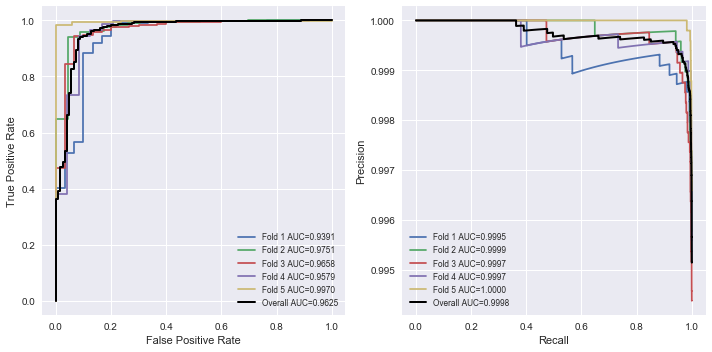

In [47]:
#Selection Dim Reduction Method for Logistic Regression2 : Random Forest based Importance Features

random_state = 0 
skf = KFold(n_splits=5, shuffle=True, random_state=random_state) 
fold_idxs = list(skf.split(x_m))

acc_scores = []
auc_scores = []
precision_scores = []
recall_scores = []
y_probs = []
y_vals = []
        
f, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, (train_idx, test_idx) in enumerate(fold_idxs): 
        X_train = x_m.values[train_idx]
        y_train = y_m.values[train_idx]
        X_val = x_m.values[test_idx]
        y_val = y_m.values[test_idx]

        #OverSampling
        smote= SMOTE()
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
            
        sel = SelectFromModel(RandomForestClassifier(random_state = 0, n_jobs = -1))
        sel.fit(X_resampled,y_resampled)
        X_train_rfc = sel.transform(X_resampled)
        X_val_rfc = sel.transform(X_val)
            
        model = LogisticRegression()
        model.fit(X_train_rfc, y_resampled)
        y_prob = model.predict_proba(X_val_rfc)
        y_pred = model.predict(X_val_rfc)
        y_probs.append(y_prob[:,1])
        y_vals.append(y_val)

        auc_scores.append(roc_auc_score(y_val, y_prob[:,1]))
        acc_scores.append(accuracy_score(y_val,y_pred))
        precision_scores.append(precision_score(y_val, y_pred))
        recall_scores.append(recall_score(y_val,y_pred))
            
        precision, recall, _ = precision_recall_curve(y_val, y_prob[:,1])
        fpr, tpr, _ = roc_curve(y_val, y_prob[:,1])
            
        lab1 = 'Fold %d AUC=%.4f' % (i+1, auc(fpr, tpr))
        lab2 = 'Fold %d AUC=%.4f' % (i+1, auc(recall, precision))
        axes[0].step(fpr,tpr,label = lab1)
        axes[1].step(recall, precision, label=lab2)
        y_vals.append(y_val)
        y_probs.append(y_prob[:,1])
               
            
print('AUROC:', round(np.mean(auc_scores),3), 'ACC:', round(np.mean(acc_scores),3), 'Precision:', round(np.mean(precision_scores),3), 
                 'Recall:', round(np.mean(recall_scores),3), '\n')

y_vals = numpy.concatenate(y_vals)
y_probs = numpy.concatenate(y_probs)
precision, recall, _ = precision_recall_curve(y_vals, y_probs)
fpr, tpr, _ = roc_curve(y_vals, y_probs)
lab1 = 'Overall AUC=%.4f' % (auc(fpr,tpr))
lab2 = 'Overall AUC=%.4f' % (auc(recall, precision))
axes[0].step(fpr,tpr, label = lab1, lw=2, color = 'black')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend(loc='lower right', fontsize='small')
axes[1].step(recall, precision, label=lab2, lw=2, color='black')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend(loc='lower left', fontsize='small')
f.tight_layout()

RandomForest based Importance Features method was the best for dimension reduction. 

training accuracy: 0.900 test accuracy: 0.825 subset size: 20.000
training accuracy: 0.932 test accuracy: 0.859 subset size: 59.000
training accuracy: 0.937 test accuracy: 0.914 subset size: 175.000
training accuracy: 0.944 test accuracy: 0.930 subset size: 519.000
training accuracy: 0.957 test accuracy: 0.953 subset size: 1535.000
training accuracy: 0.971 test accuracy: 0.968 subset size: 4538.000
training accuracy: 0.978 test accuracy: 0.976 subset size: 13419.000
training accuracy: 0.984 test accuracy: 0.983 subset size: 39675.000


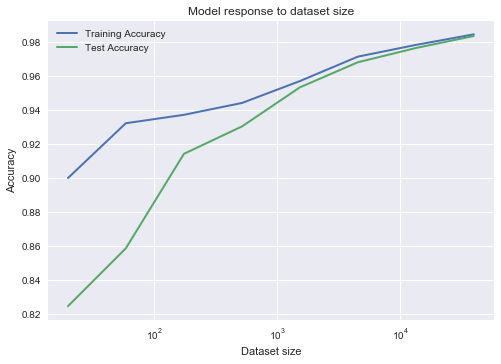

In [49]:
#Learning Curve with reduced data,LogisticRegression

x_tr, x_val, y_tr, y_val = train_test_split(x_m_samp, y_m_samp, test_size=0.2, random_state=0)

sel = SelectFromModel(RandomForestClassifier(random_state = 0, n_jobs = -1))
sel.fit(x_tr,y_tr)
x_train_rfc = sel.transform(x_tr)
x_val_rfc = sel.transform(x_val)

model = LogisticRegression()
score_func = accuracy_score
response = data_size_response(model,x_train_rfc,x_val_rfc,y_tr,y_val,score_func,prob=False)
plot_response(*response)

LogisticRegression(C=1.0, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
AUROC: 0.929 ACC: 0.978 Precision: 0.999 Recall: 0.979


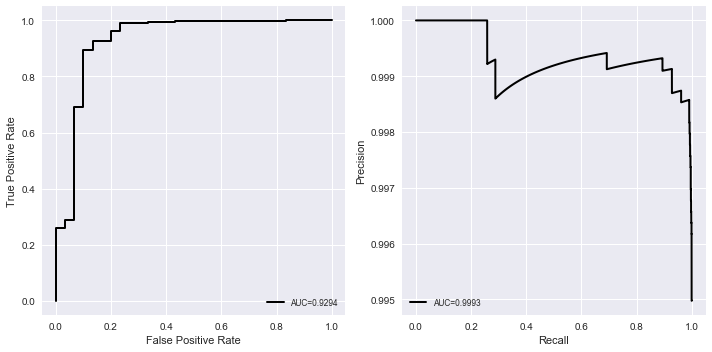

In [99]:
#See best hyperparameters for logistic regression on reduced data (to have convergence on Learning Curve)

f, axes = plt.subplots(1, 2, figsize=(10, 5))

#Splitting
x_m_tr, x_val, y_m_tr, y_val =train_test_split(x_m, y_m,test_size = 0.2, random_state=0)

#OverSampling
smote= SMOTE()
x_resampled, y_resampled = smote.fit_resample(x_m_tr, y_m_tr)
            
sel = SelectFromModel(RandomForestClassifier(random_state = 0, n_jobs = -1))
sel.fit(x_resampled,y_resampled)
X_train_rfc = sel.transform(x_resampled)
X_val_rfc = sel.transform(x_val)
            
model = LogisticRegression()
grid = {"solver" :["sag", "saga", "lbfgs", "newton-cg"], "class_weight": ["None", "balanced"]}
gscv = GridSearchCV(estimator=model,param_grid=grid,scoring="accuracy",cv=5,verbose=0,n_jobs=-1,return_train_score=True)
gscv.fit(X_train_rfc,y_resampled)
lropt = gscv.best_estimator_
print(lropt)

y_pred = lropt.predict(X_val_rfc)
y_prob = lropt.predict_proba(X_val_rfc)

auc_score = roc_auc_score(y_val, y_prob[:,1])
acc_score = accuracy_score(y_val,y_pred)
precision_score = precision_score(y_val, y_pred)
recall_score = recall_score(y_val,y_pred)
            
precision, recall, _ = precision_recall_curve(y_val, y_prob[:,1])
fpr, tpr, _ = roc_curve(y_val, y_prob[:,1])

print('AUROC:', round(auc_score,3), 'ACC:', round(acc_score,3), 'Precision:', round(precision_score,3), 'Recall:', round(recall_score,3))          
lab1 = 'AUC=%.4f' % (auc(fpr, tpr))
lab2 = 'AUC=%.4f' % (auc(recall, precision))
axes[0].step(fpr,tpr,label = lab1, lw=2 , color = "black")
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend(loc='lower right', fontsize='small')
axes[1].step(recall, precision, label=lab2, lw=2, color="black")
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend(loc='lower left', fontsize='small')
f.tight_layout()
            

AUROC: 0.959 ACC: 0.974 Recall: nan 



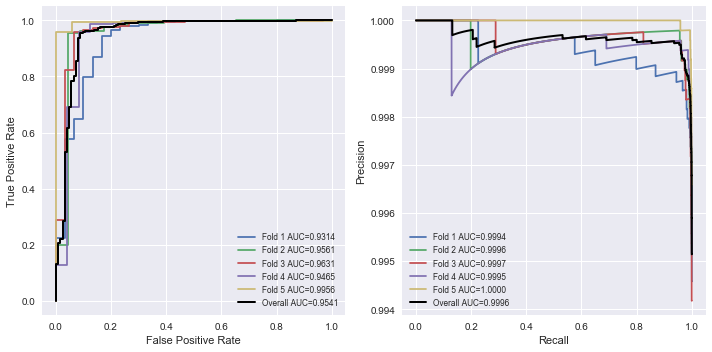

In [104]:
#Selection Dim Reduction Method for Logistic Regression with selected hyperparameters

random_state = 0 
skf = KFold(n_splits=5, shuffle=True, random_state=random_state) 
fold_idxs = list(skf.split(x_m))

acc_scores = []
auc_scores = []
y_probs = []
y_vals = []
        
f, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, (train_idx, test_idx) in enumerate(fold_idxs): 
        X_train = x_m.values[train_idx]
        y_train = y_m.values[train_idx]
        X_val = x_m.values[test_idx]
        y_val = y_m.values[test_idx]

        #OverSampling
        smote= SMOTE()
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
            
        sel = SelectFromModel(RandomForestClassifier(random_state = 0, n_jobs = -1))
        sel.fit(X_resampled,y_resampled)
        X_train_rfc = sel.transform(X_resampled)
        X_val_rfc = sel.transform(X_val)
            
        model = LogisticRegression(C=1.0, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
        model.fit(X_train_rfc, y_resampled)
        y_prob = model.predict_proba(X_val_rfc)
        y_pred = model.predict(X_val_rfc)
        y_probs.append(y_prob[:,1])
        y_vals.append(y_val)

        auc_scores.append(roc_auc_score(y_val, y_prob[:,1]))
        acc_scores.append(accuracy_score(y_val,y_pred))
            
        precision, recall, _ = precision_recall_curve(y_val, y_prob[:,1])
        fpr, tpr, _ = roc_curve(y_val, y_prob[:,1])
            
        lab1 = 'Fold %d AUC=%.4f' % (i+1, auc(fpr, tpr))
        lab2 = 'Fold %d AUC=%.4f' % (i+1, auc(recall, precision))
        axes[0].step(fpr,tpr,label = lab1)
        axes[1].step(recall, precision, label=lab2)
        y_vals.append(y_val)
        y_probs.append(y_prob[:,1])
               
            
print('AUROC:', round(np.mean(auc_scores),3), 'ACC:', round(np.mean(acc_scores),3), 
                 'Recall:', round(np.mean(recall_scores),3), '\n')

y_vals = numpy.concatenate(y_vals)
y_probs = numpy.concatenate(y_probs)
precision, recall, _ = precision_recall_curve(y_vals, y_probs)
fpr, tpr, _ = roc_curve(y_vals, y_probs)
lab1 = 'Overall AUC=%.4f' % (auc(fpr,tpr))
lab2 = 'Overall AUC=%.4f' % (auc(recall, precision))
axes[0].step(fpr,tpr, label = lab1, lw=2, color = 'black')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend(loc='lower right', fontsize='small')
axes[1].step(recall, precision, label=lab2, lw=2, color='black')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend(loc='lower left', fontsize='small')
f.tight_layout()

training accuracy: 0.900 test accuracy: 0.829 subset size: 20.000
training accuracy: 0.949 test accuracy: 0.874 subset size: 59.000
training accuracy: 0.937 test accuracy: 0.915 subset size: 175.000
training accuracy: 0.944 test accuracy: 0.931 subset size: 519.000
training accuracy: 0.956 test accuracy: 0.952 subset size: 1535.000
training accuracy: 0.971 test accuracy: 0.968 subset size: 4538.000
training accuracy: 0.978 test accuracy: 0.977 subset size: 13419.000
training accuracy: 0.984 test accuracy: 0.983 subset size: 39675.000


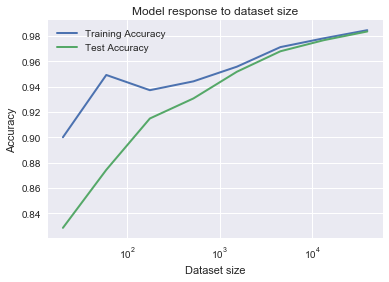

In [105]:
#Learning Curve with reduced data and selected parameters,LogisticRegression

x_tr, x_val, y_tr, y_val = train_test_split(x_m_samp, y_m_samp, test_size=0.2, random_state=0)

sel = SelectFromModel(RandomForestClassifier(random_state = 0, n_jobs = -1))
sel.fit(x_tr,y_tr)
x_train_rfc = sel.transform(x_tr)
x_val_rfc = sel.transform(x_val)

model = LogisticRegression(C=1.0, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
score_func = accuracy_score
response = data_size_response(model,x_train_rfc,x_val_rfc,y_tr,y_val,score_func,prob=False)
plot_response(*response)

Since convergence was not obtained with hyperparameter tuning, we decided to not applying dimension reduction.

## FİNAL EVALUATION

Based on the results above, Logistic Regression is the best model. We will get results for the test data.

In [51]:
#Check size of the test data

print(x_test.shape)
print(y_test.shape)

(6231, 5408)
(6231,)


1    6204
0      27
Name: class, dtype: int64


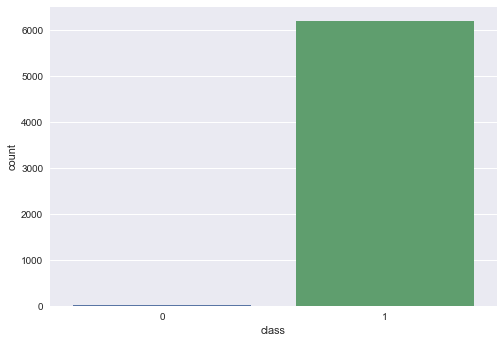

In [52]:
#Check the proportion of classes in test data

y_test_df = y_test.to_frame()

print(y_test_df['class'].value_counts())
sns.countplot(y_test_df['class'], label="count")

In [70]:
# Make predictions on test dataset

model = LogisticRegression()
model.fit(x_m_samp, y_m_samp)
pred = model.predict(x_test)
prob = model.predict_proba(x_test)

#Evaluate predictions - Logistic Regression
print('AUROC:', round(roc_auc_score(y_test, prob[:,1]), 3),'\n',
      'Balanced Accuracy:', round(balanced_accuracy_score(y_test, pred),3),'\n',
      'Accuracy:', round(accuracy_score(y_test, pred),3),'\n',
      'Precision:', round(precision_score(y_test,pred), 3),'\n',
      'recall:' , round(recall_score(y_test, pred),3),'\n')


print(classification_report(y_test, pred))

AUROC: 0.943 
 Balanced Accuracy: 0.885 
 Accuracy: 0.99 
 Precision: 0.999 
 recall: 0.991 

              precision    recall  f1-score   support

           0       0.28      0.78      0.41        27
           1       1.00      0.99      1.00      6204

    accuracy                           0.99      6231
   macro avg       0.64      0.88      0.70      6231
weighted avg       1.00      0.99      0.99      6231



[[  21    6]
 [  54 6150]]


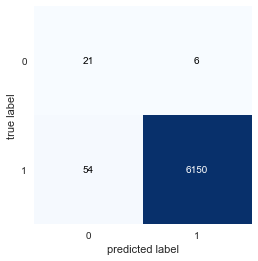

In [66]:
#Confusion Matrix

labels = [0, 1]
cm = confusion_matrix(y_test,pred, labels)
print(cm)


fig, ax = plot_confusion_matrix(cm)
plt.show()

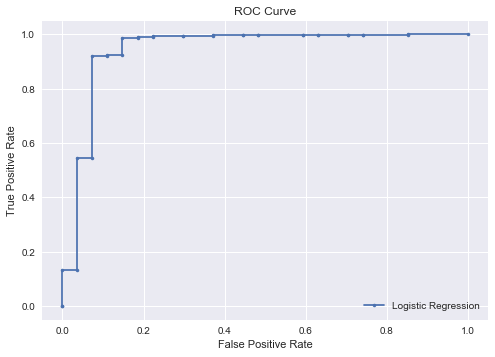

In [57]:
#Roc Curve

# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, prob[:,1])
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

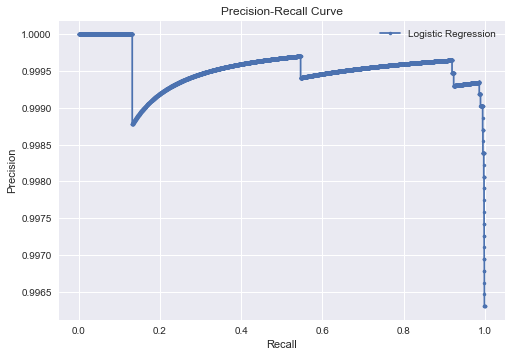

(0, 1)

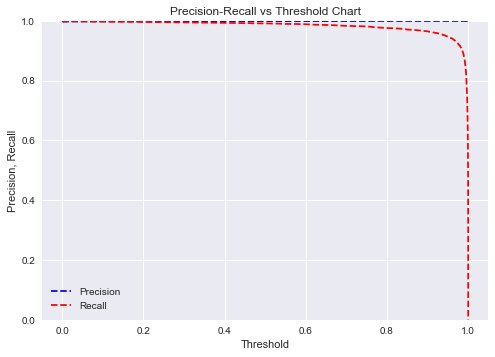

In [56]:
#Precision-Recall Curve

precision, recall, thresholds = precision_recall_curve(y_test, prob[:,1])
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Precision-Recall Curve')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#Check different thresholds
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])